In [1]:
import pandas as pd 
import sklearn.model_selection as skm
import sklearn.preprocessing as skp
import sklearn.metrics as met
import sklearn.feature_selection as skf
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow.keras as tfk

In [26]:
data = pd.read_csv("bank-additional-full.csv",sep=";")

data.head(5)

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

In [27]:
data.shape

(41188, 21)

In [28]:
data.describe()

age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198      1.734447     72.251528  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [30]:
data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [31]:
data.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [32]:
for col in data.select_dtypes(exclude='object').columns :
    print("\n")
    print("\n")

    print(data.pivot_table(values=col,index='y',aggfunc=['mean','std','max','min']))
    





          mean        std max min
           age        age age age
y                                
no   39.911185   9.898132  95  17
yes  40.913147  13.837476  98  17




           mean         std      max      min
       duration    duration duration duration
y                                            
no   220.844807  207.096293     4918        0
yes  553.191164  401.171871     4199       37




         mean       std      max      min
     campaign  campaign campaign campaign
y                                        
no   2.633085  2.873438       56        1
yes  2.051724  1.666245       23        1




           mean         std   max   min
          pdays       pdays pdays pdays
y                                      
no   984.113878  120.656868   999     0
yes  792.035560  403.407181   999     0




         mean       std      max      min
     previous  previous previous previous
y                                        
no   0.132374  0.409199        7        0
ye

# Convert to numerical data

In [46]:
data2= data.copy()
obj = data.select_dtypes(include = "object")
obj.columns,data2.head(4)

(Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
        'month', 'day_of_week', 'poutcome', 'y'],
       dtype='object'),
    age        job  marital    education  default housing loan    contact  \
 0   56  housemaid  married     basic.4y       no      no   no  telephone   
 1   57   services  married  high.school  unknown      no   no  telephone   
 2   37   services  married  high.school       no     yes   no  telephone   
 3   40     admin.  married     basic.6y       no      no   no  telephone   
 
   month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
 0   may         mon  ...         1    999         0  nonexistent          1.1   
 1   may         mon  ...         1    999         0  nonexistent          1.1   
 2   may         mon  ...         1    999         0  nonexistent          1.1   
 3   may         mon  ...         1    999         0  nonexistent          1.1   
 
    cons.price.idx  cons.conf.idx  euribor3m  n

In [47]:
Encoder = skp.LabelEncoder()
for col in obj.columns:
    data2[col] = Encoder.fit_transform(data2[col])



In [48]:
data2.dtypes

age                 int64
job                 int32
marital             int32
education           int32
default             int32
housing             int32
loan                int32
contact             int32
month               int32
day_of_week         int32
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome            int32
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                   int32
dtype: object

In [49]:
data2.head(4)

age  job  marital  education  default  housing  loan  contact  month  \
0   56    3        1          0        0        0     0        1      6   
1   57    7        1          3        1        0     0        1      6   
2   37    7        1          3        0        2     0        1      6   
3   40    0        1          1        0        0     0        1      6   

   day_of_week  ...  campaign  pdays  previous  poutcome  emp.var.rate  \
0            1  ...         1    999         0         1           1.1   
1            1  ...         1    999         0         1           1.1   
2            1  ...         1    999         0         1           1.1   
3            1  ...         1    999         0         1           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  y  
0          93.994          -36.4      4.857       5191.0  0  
1          93.994          -36.4      4.857       5191.0  0  
2          93.994          -36.4      4.857       5191.0  0  
3          93.994          -36.4      4.857       5191.0  0  

[4 rows x 21 columns]

# Visualize

C:\Users\iT\AppData\Local\Temp\ipykernel_17192\897805238.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(20,16))


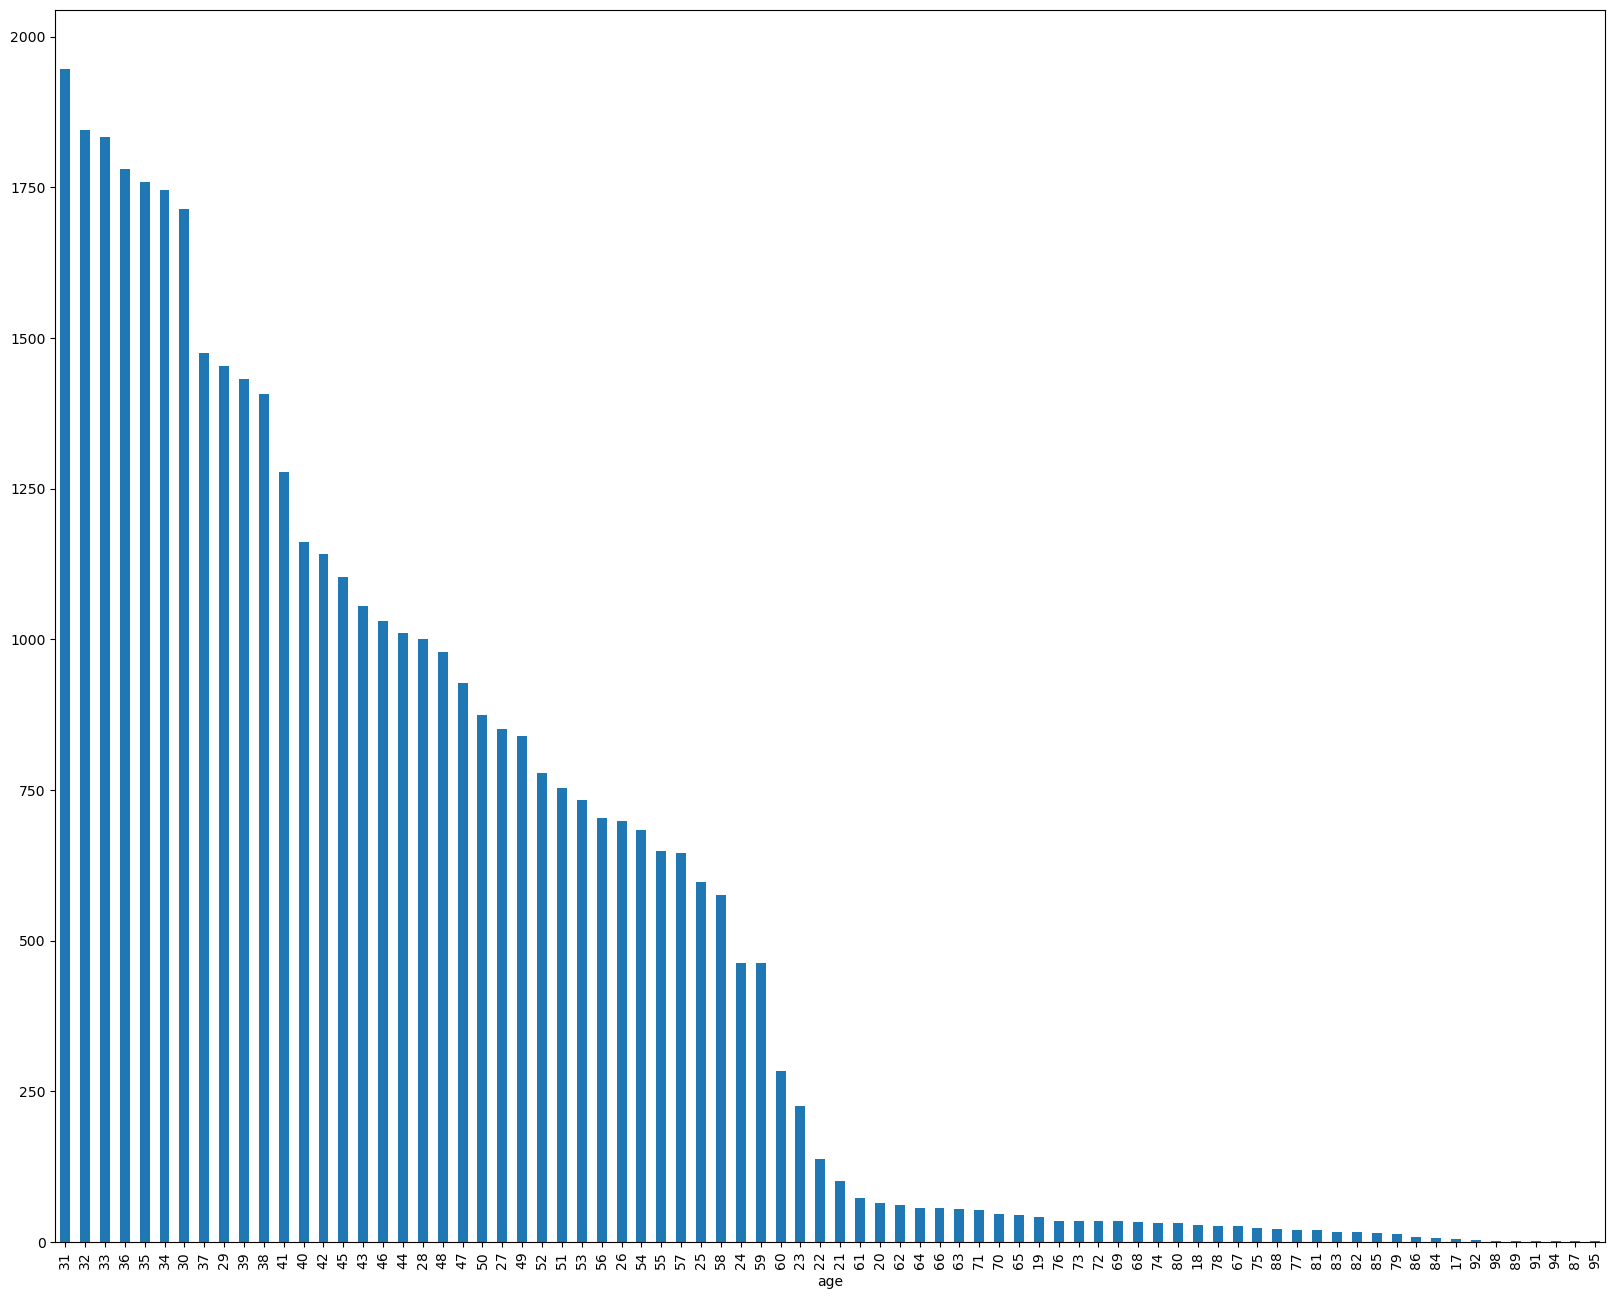

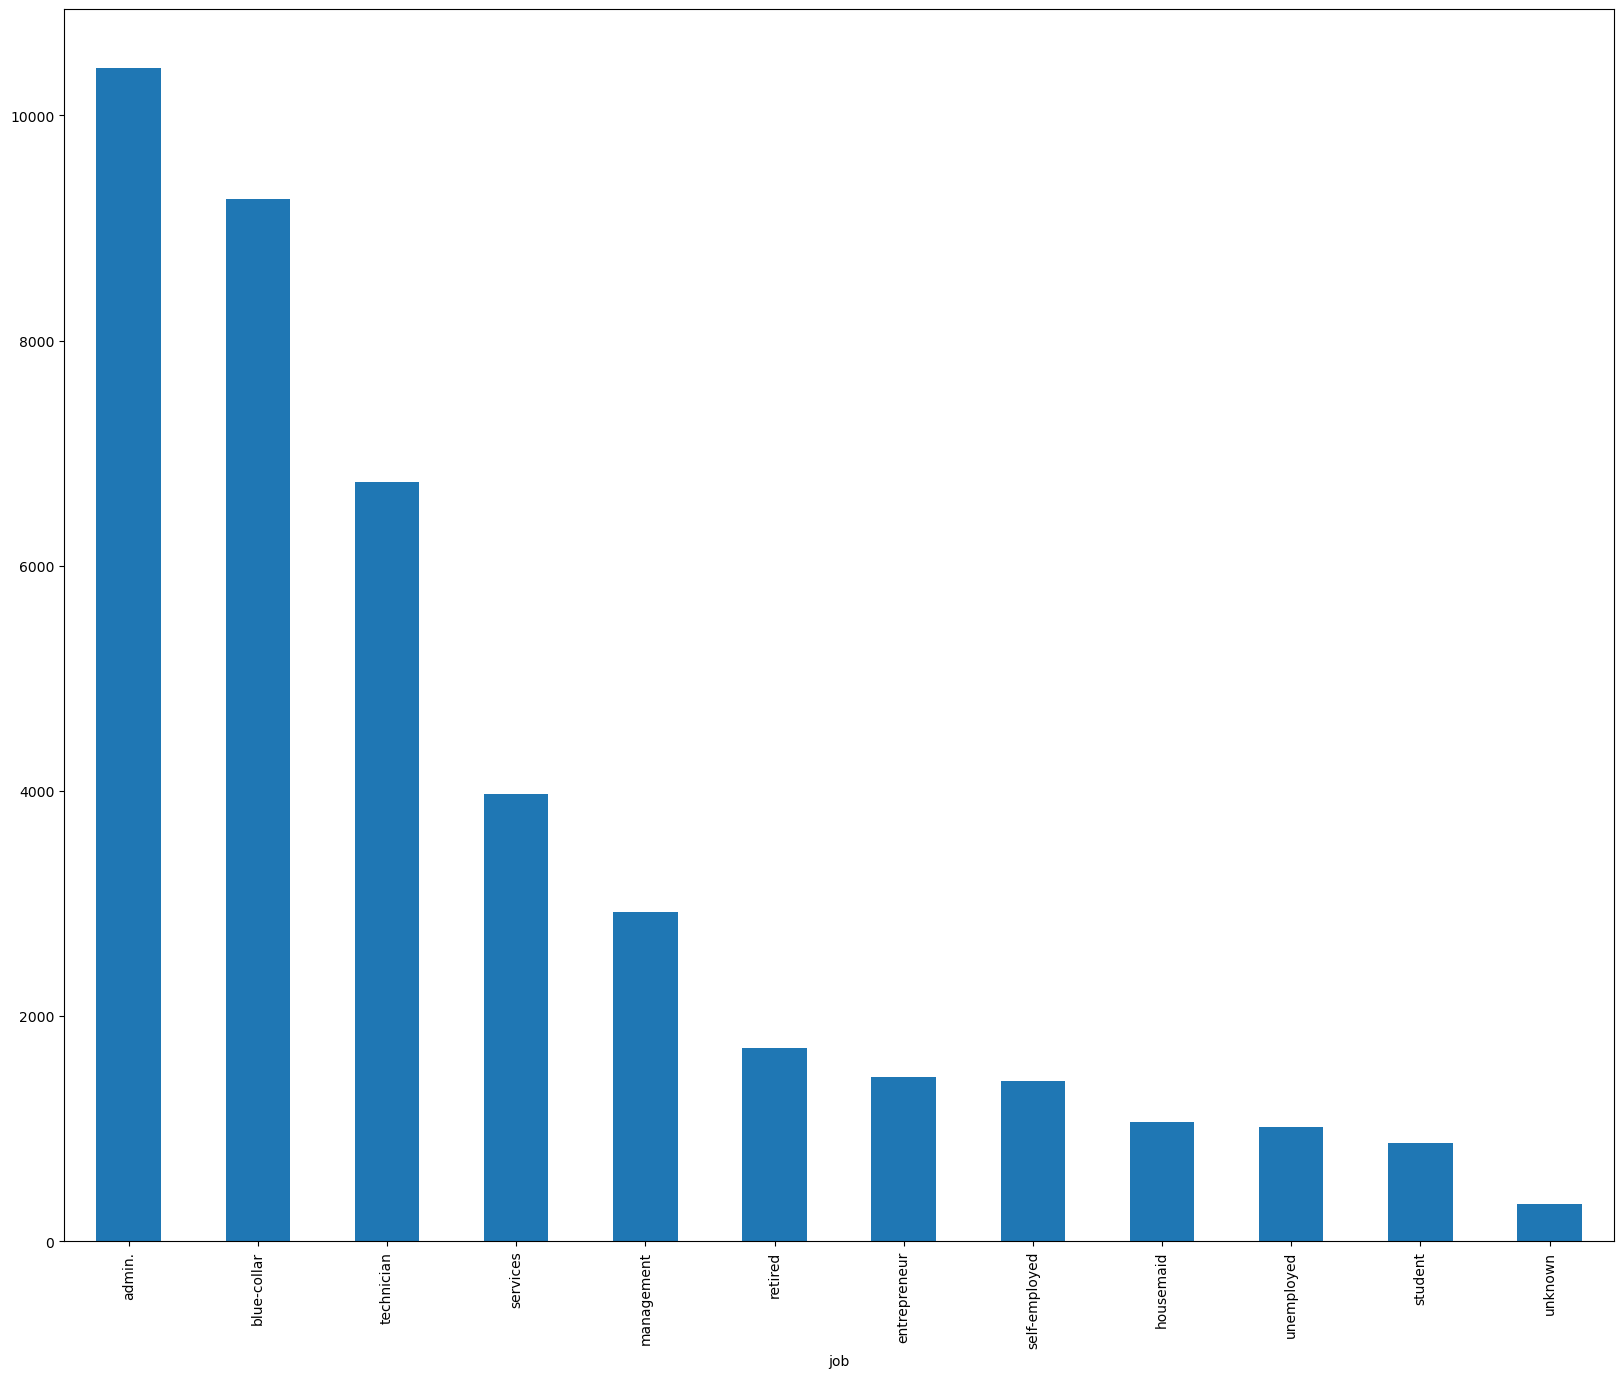

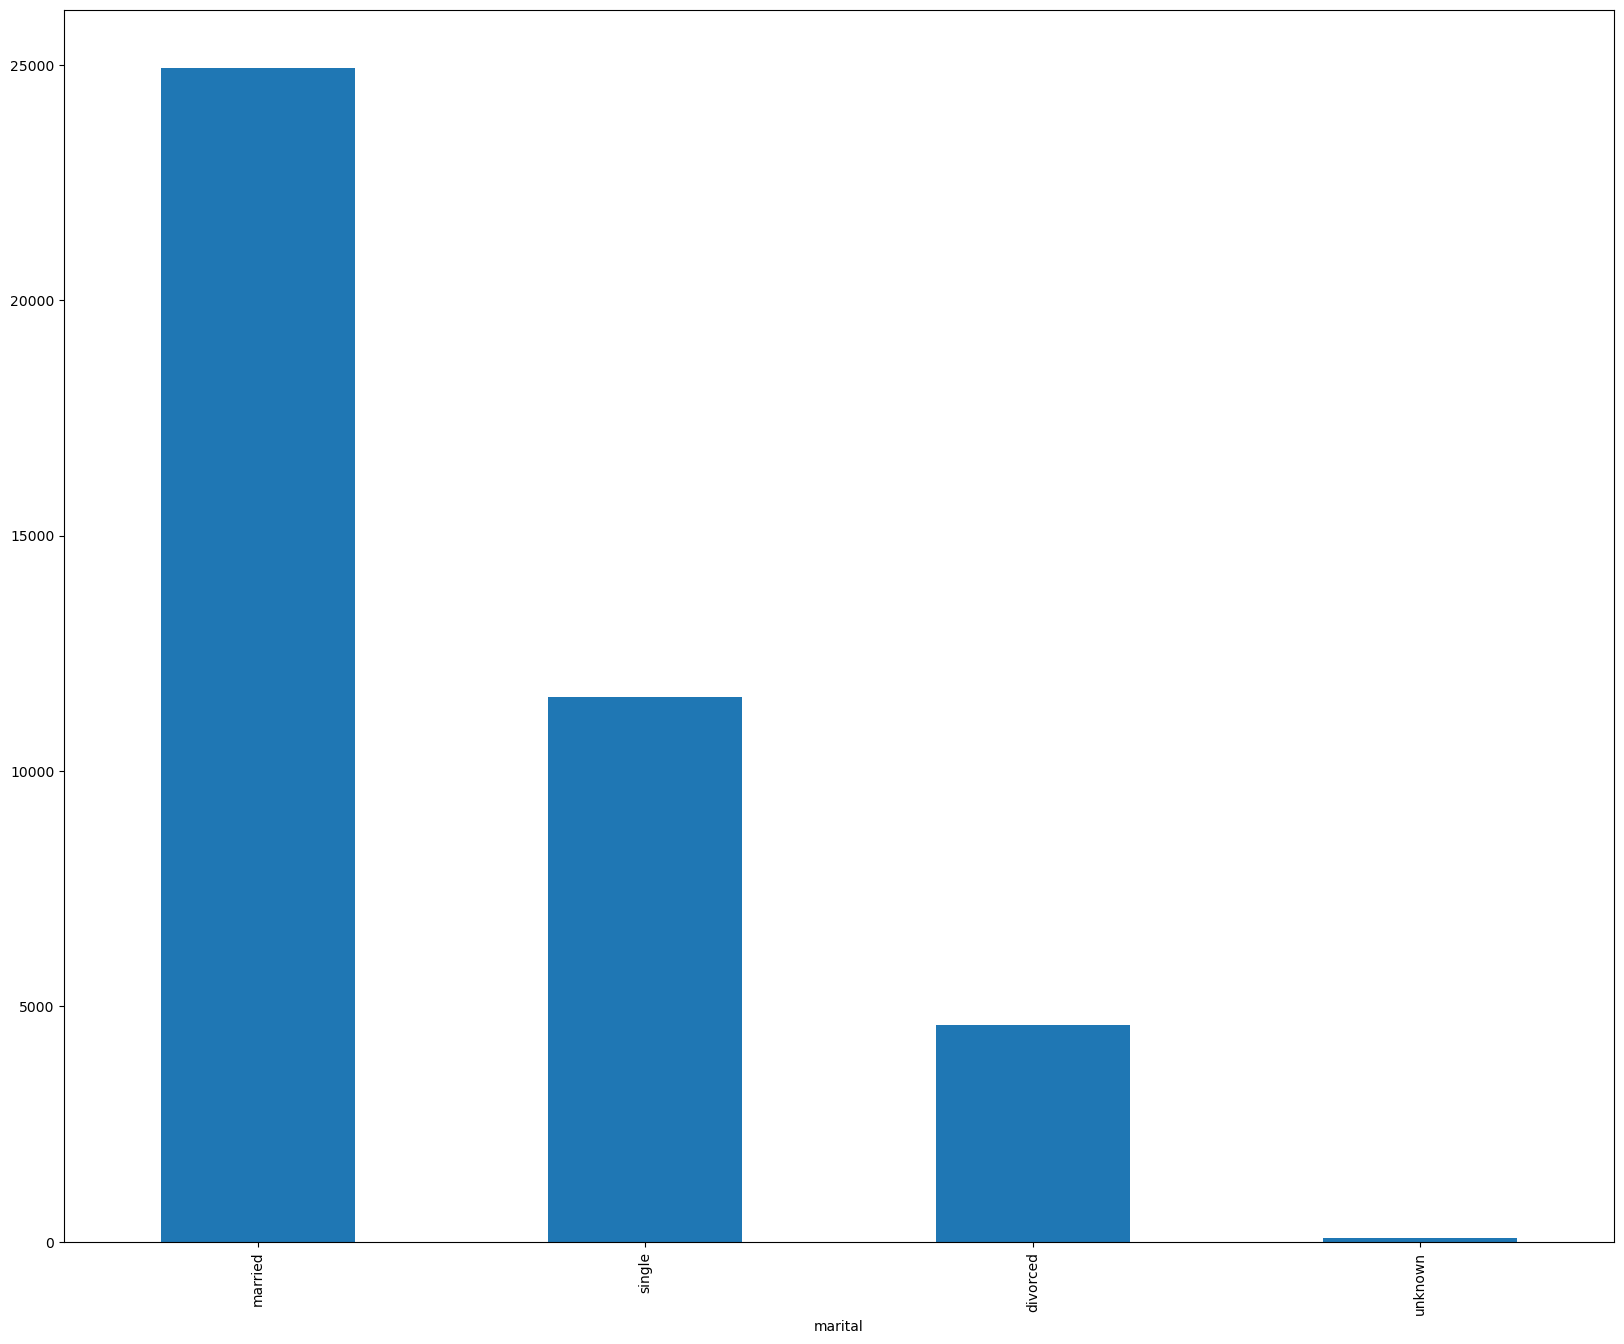

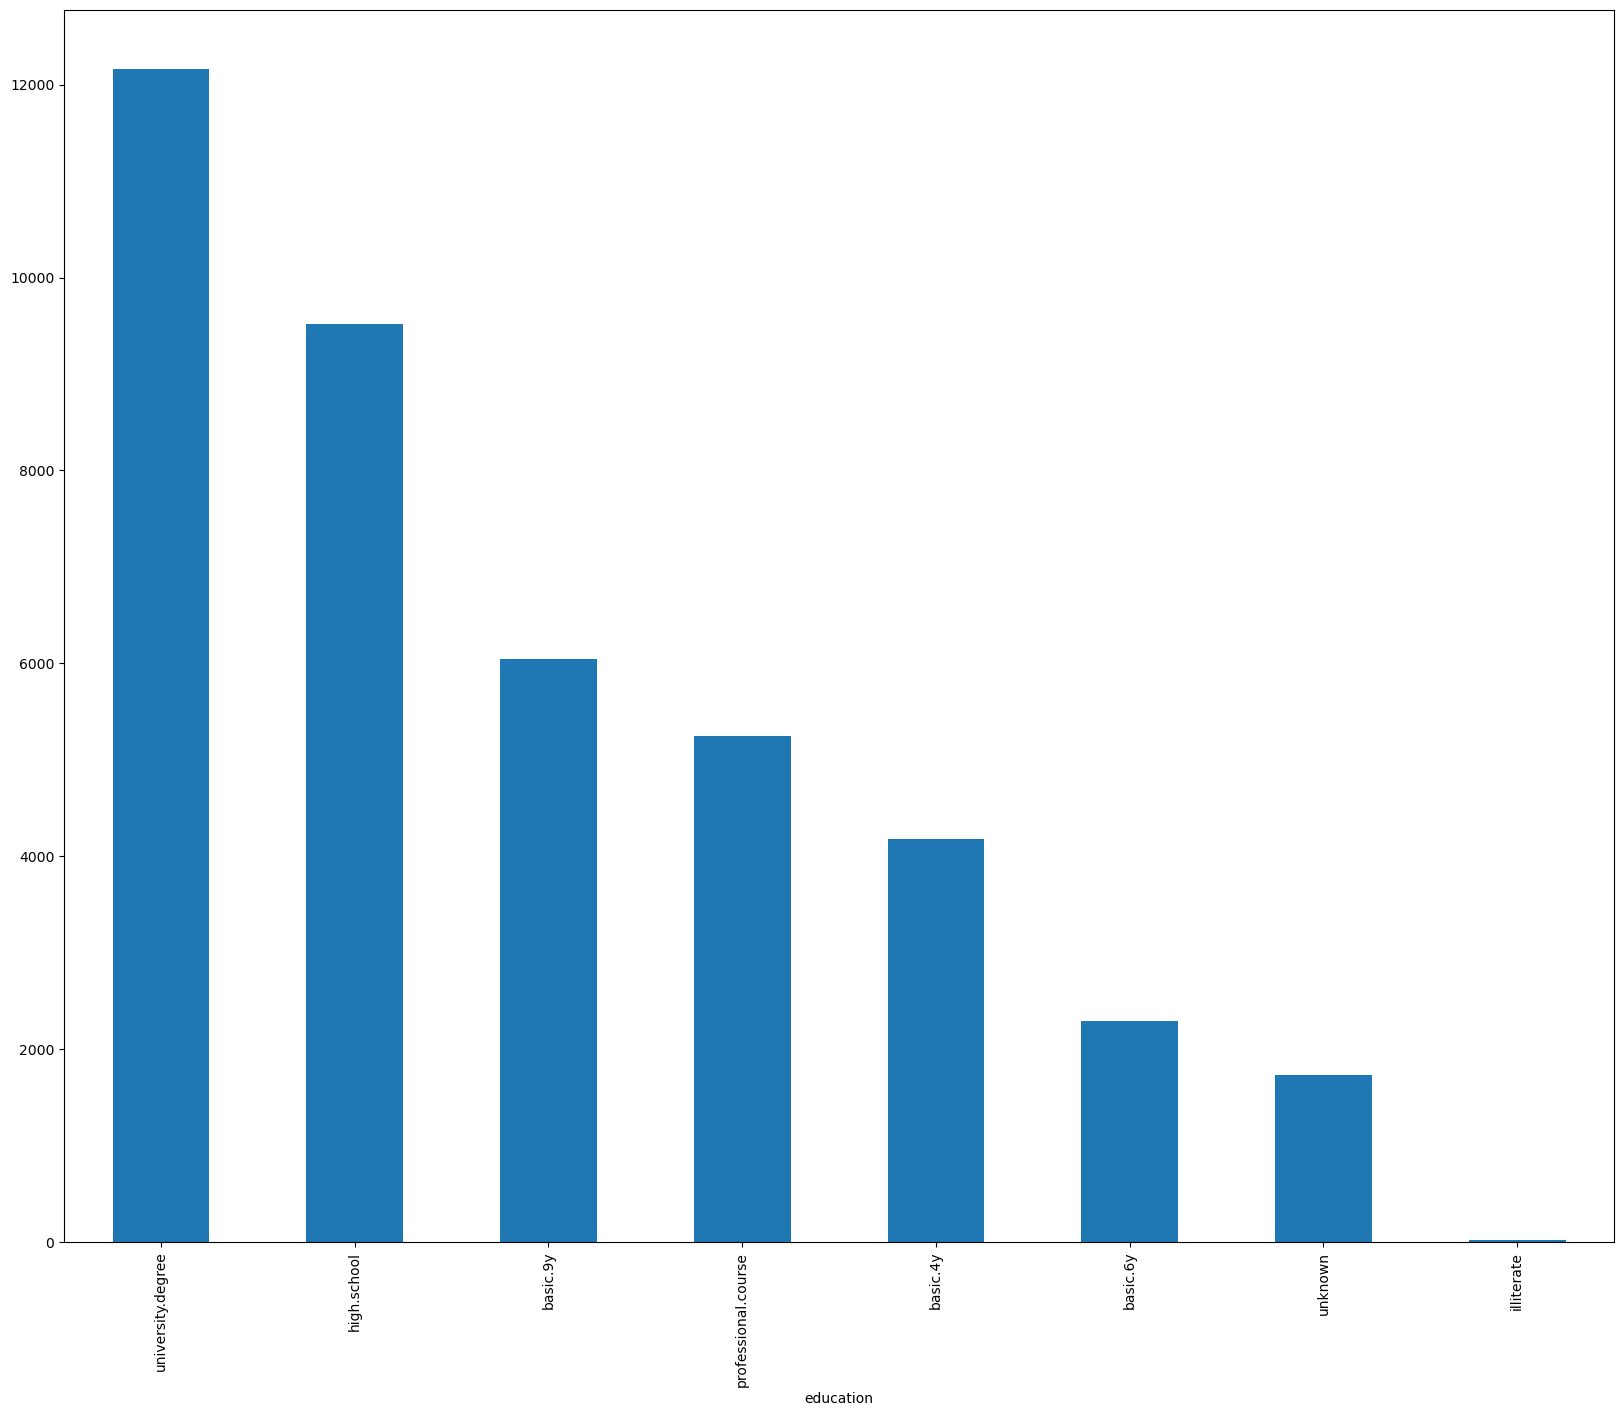

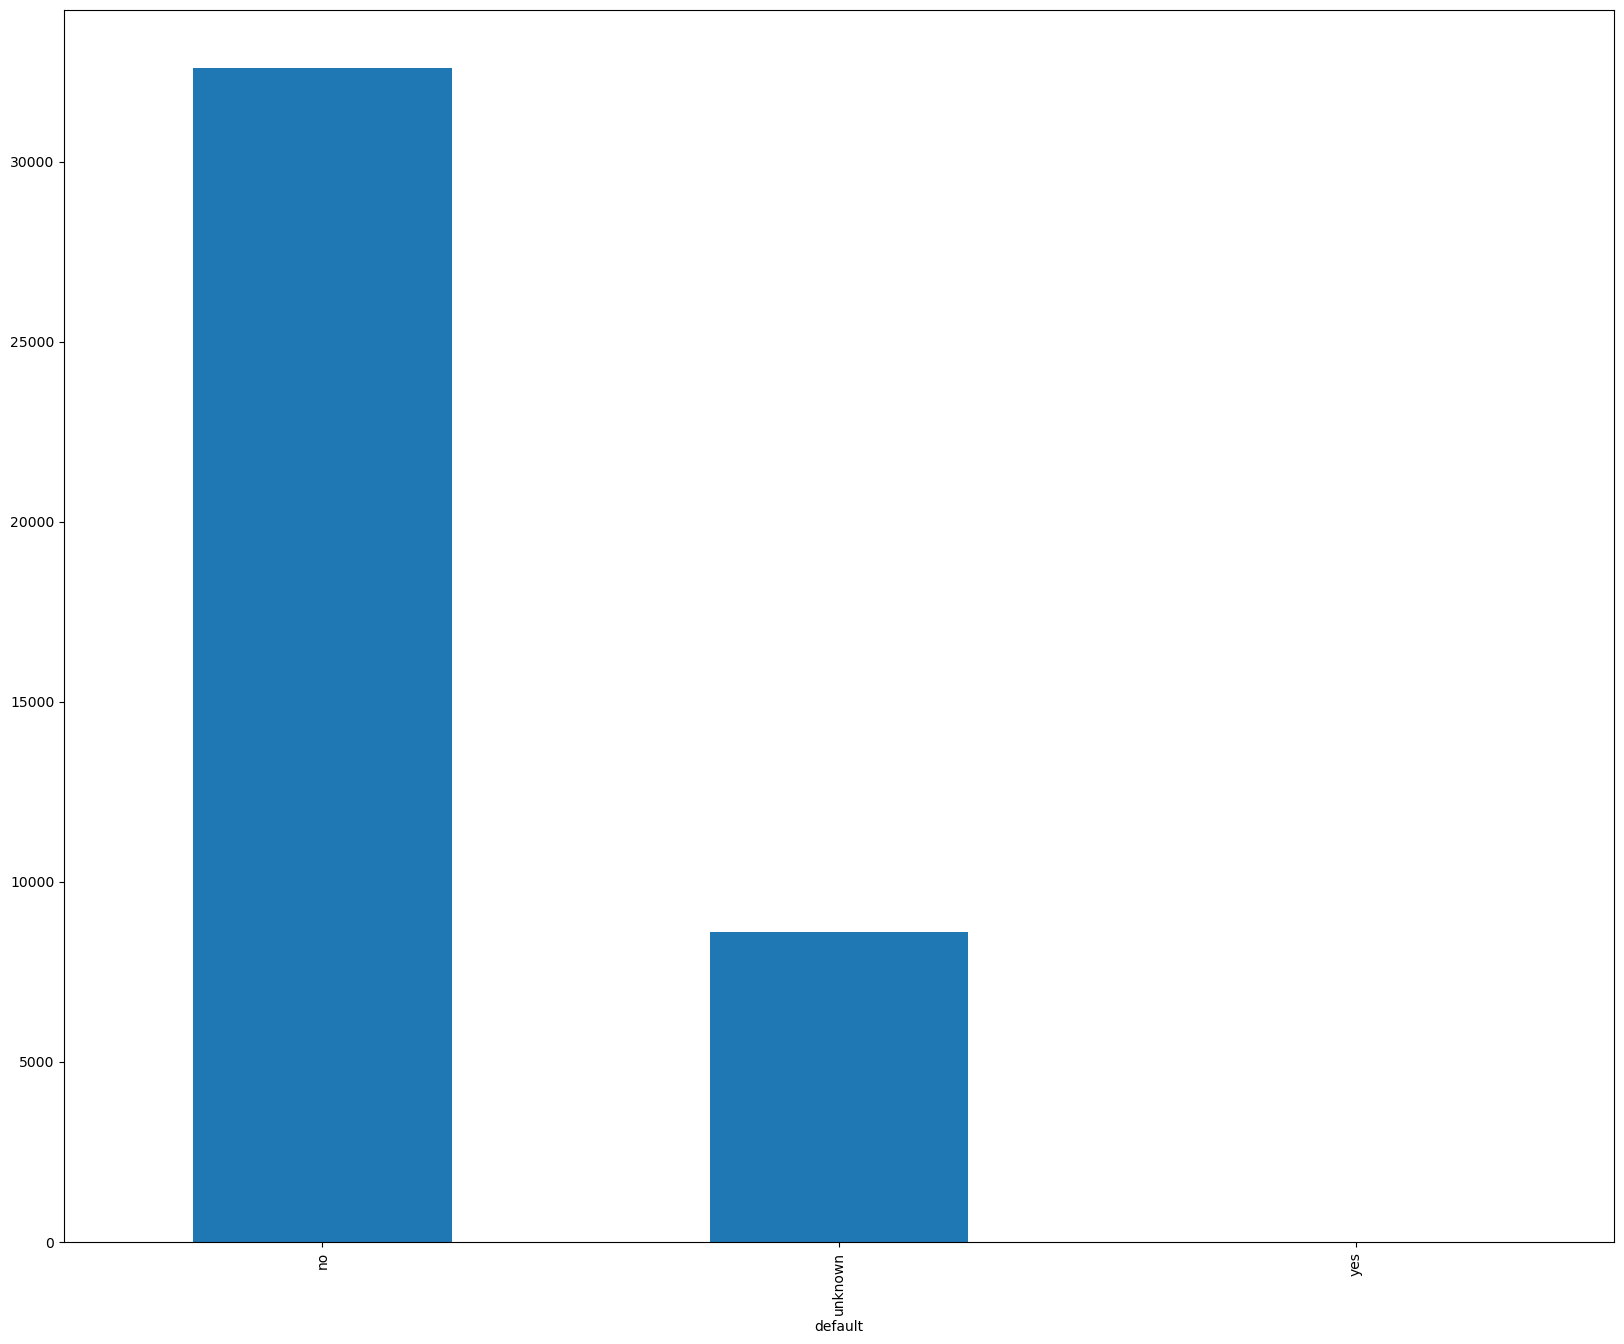

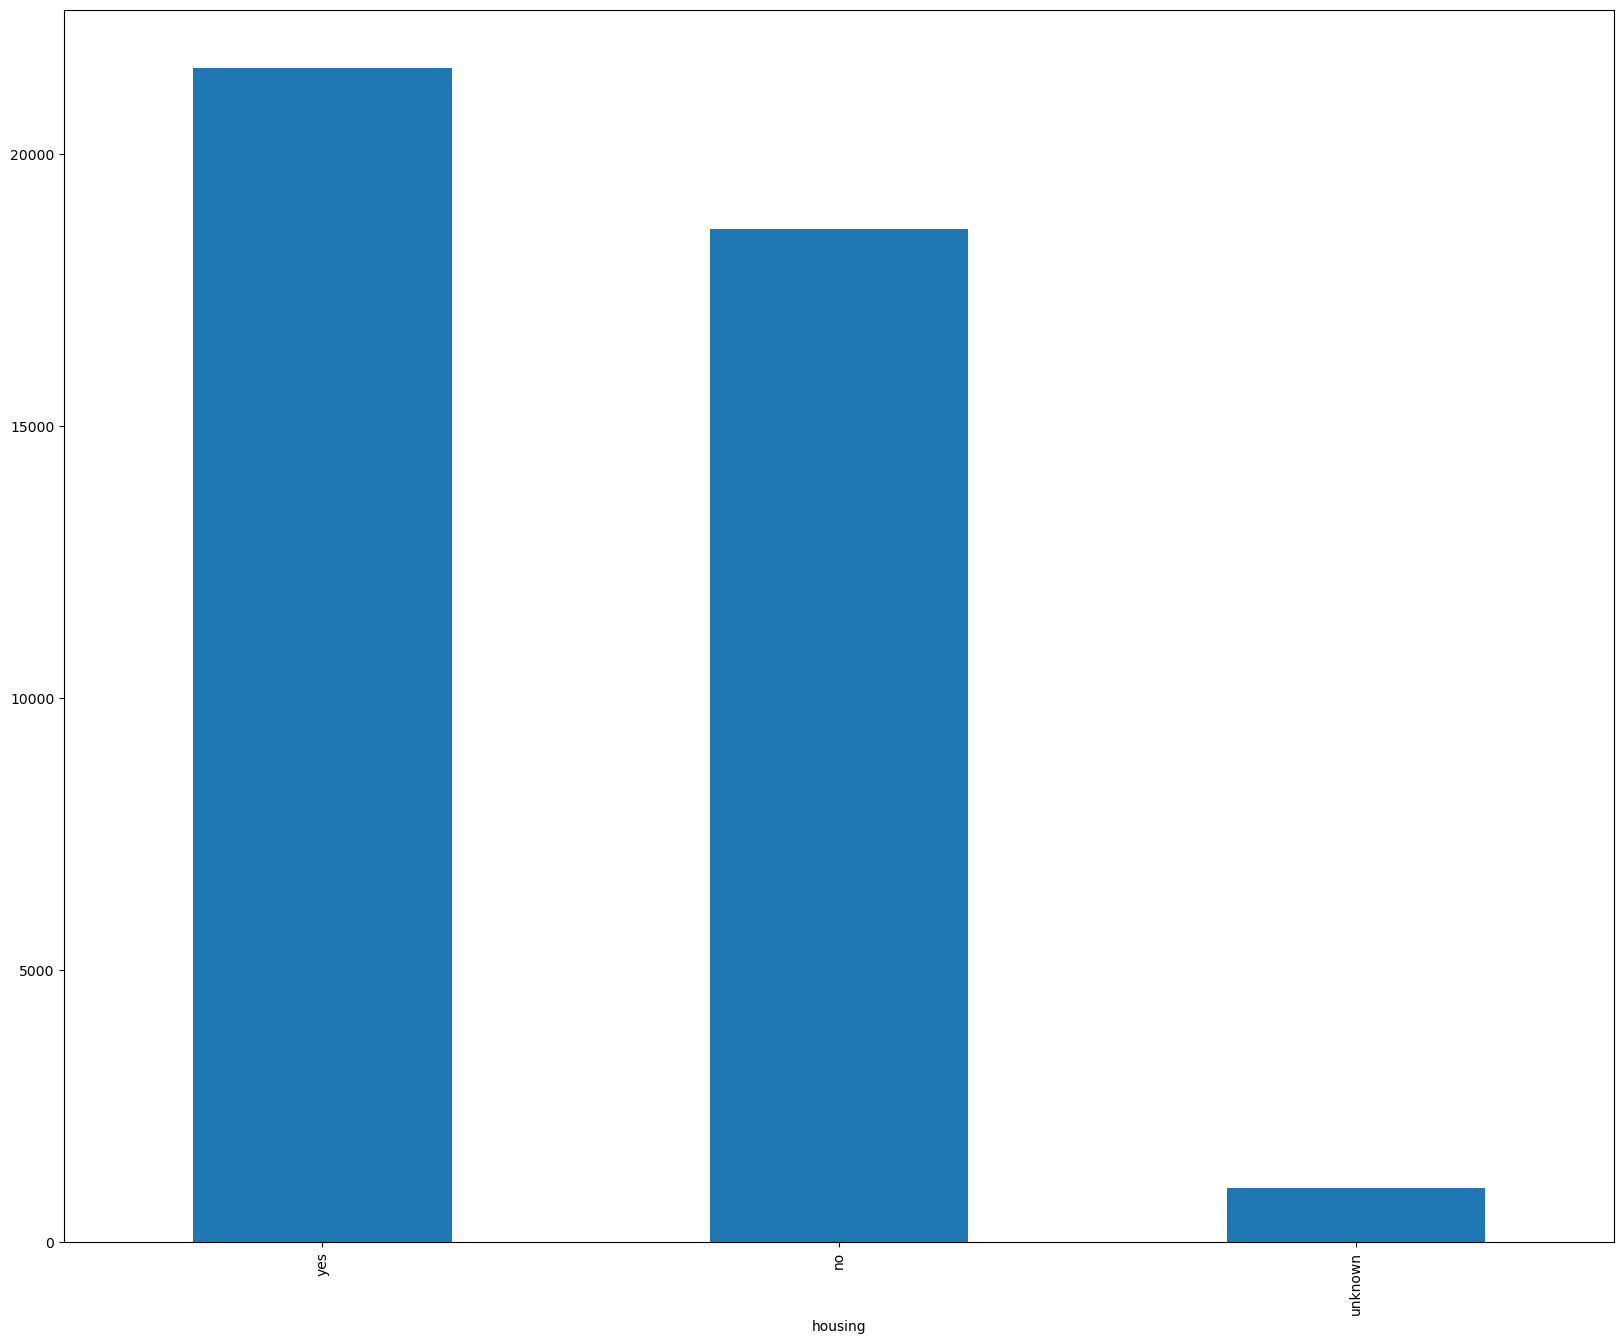

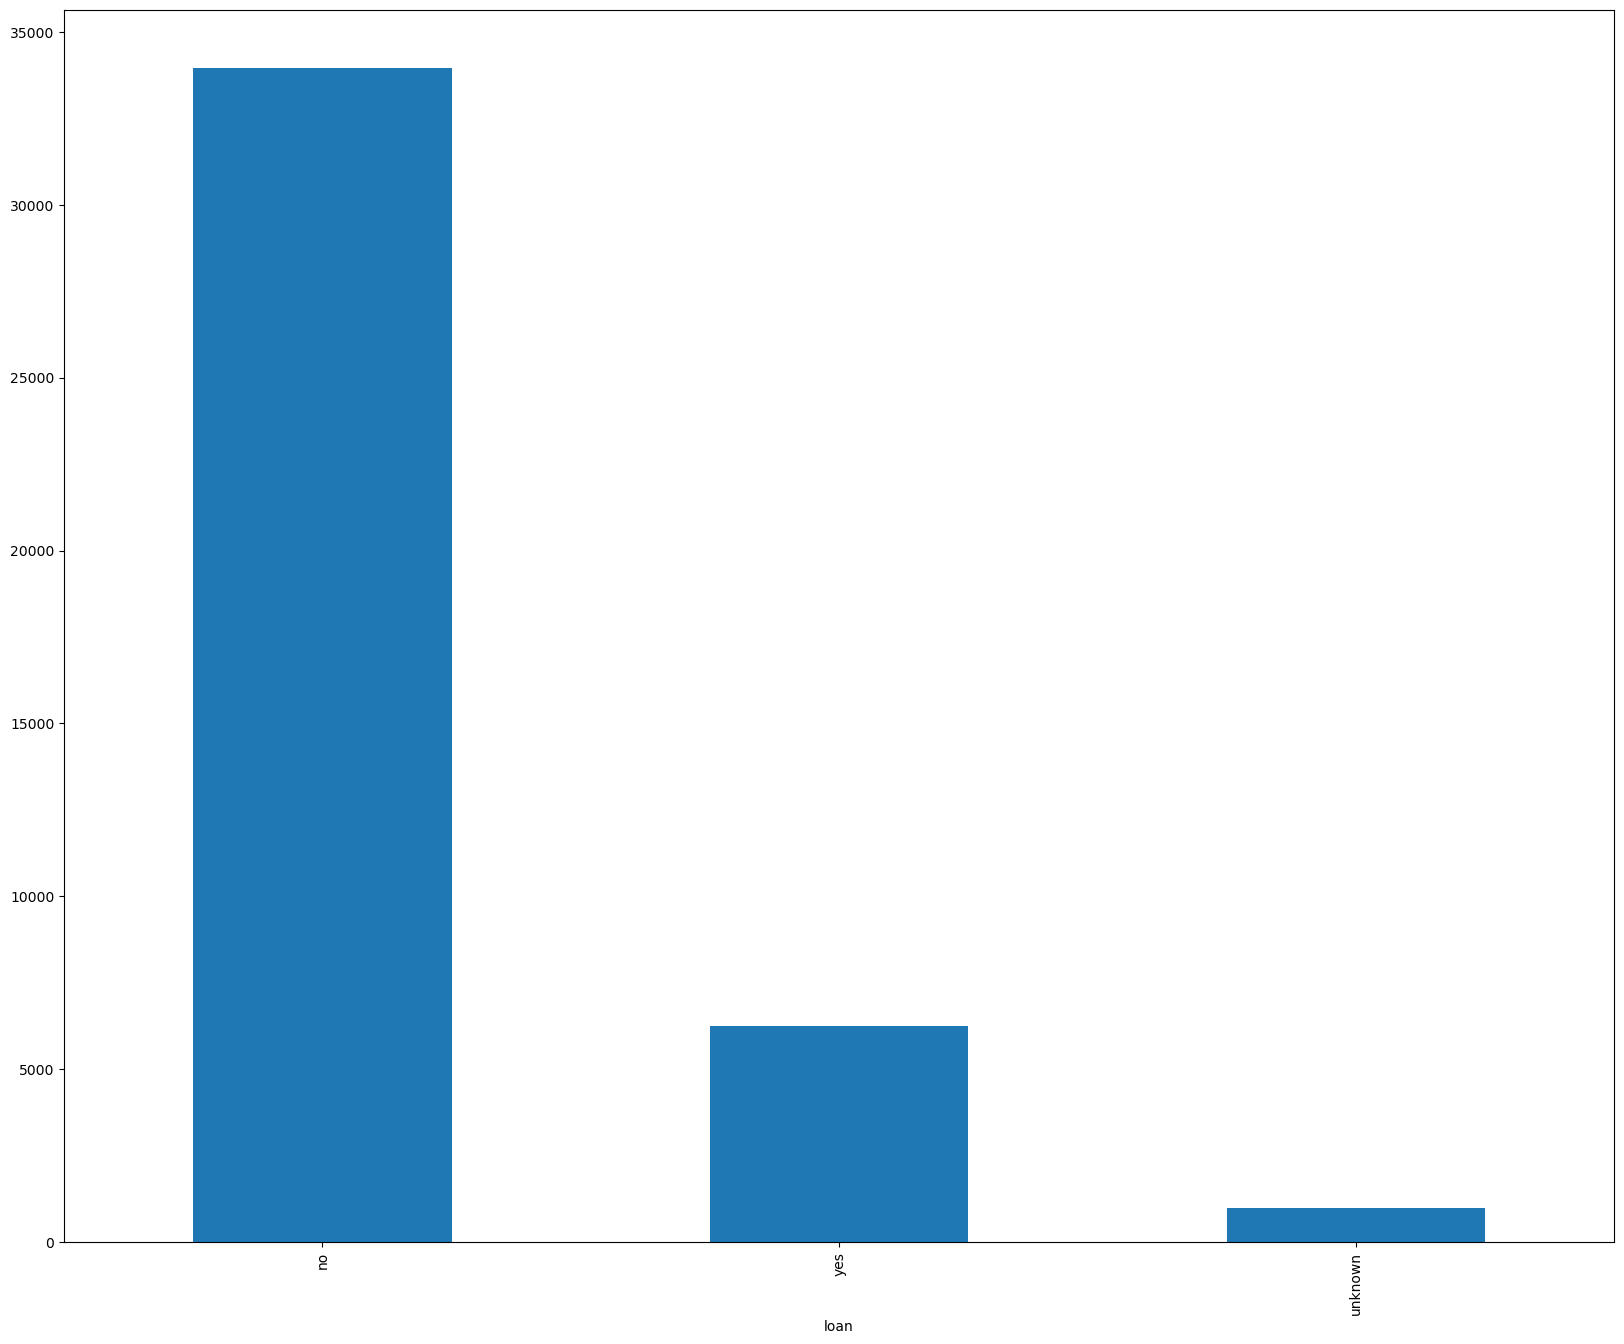

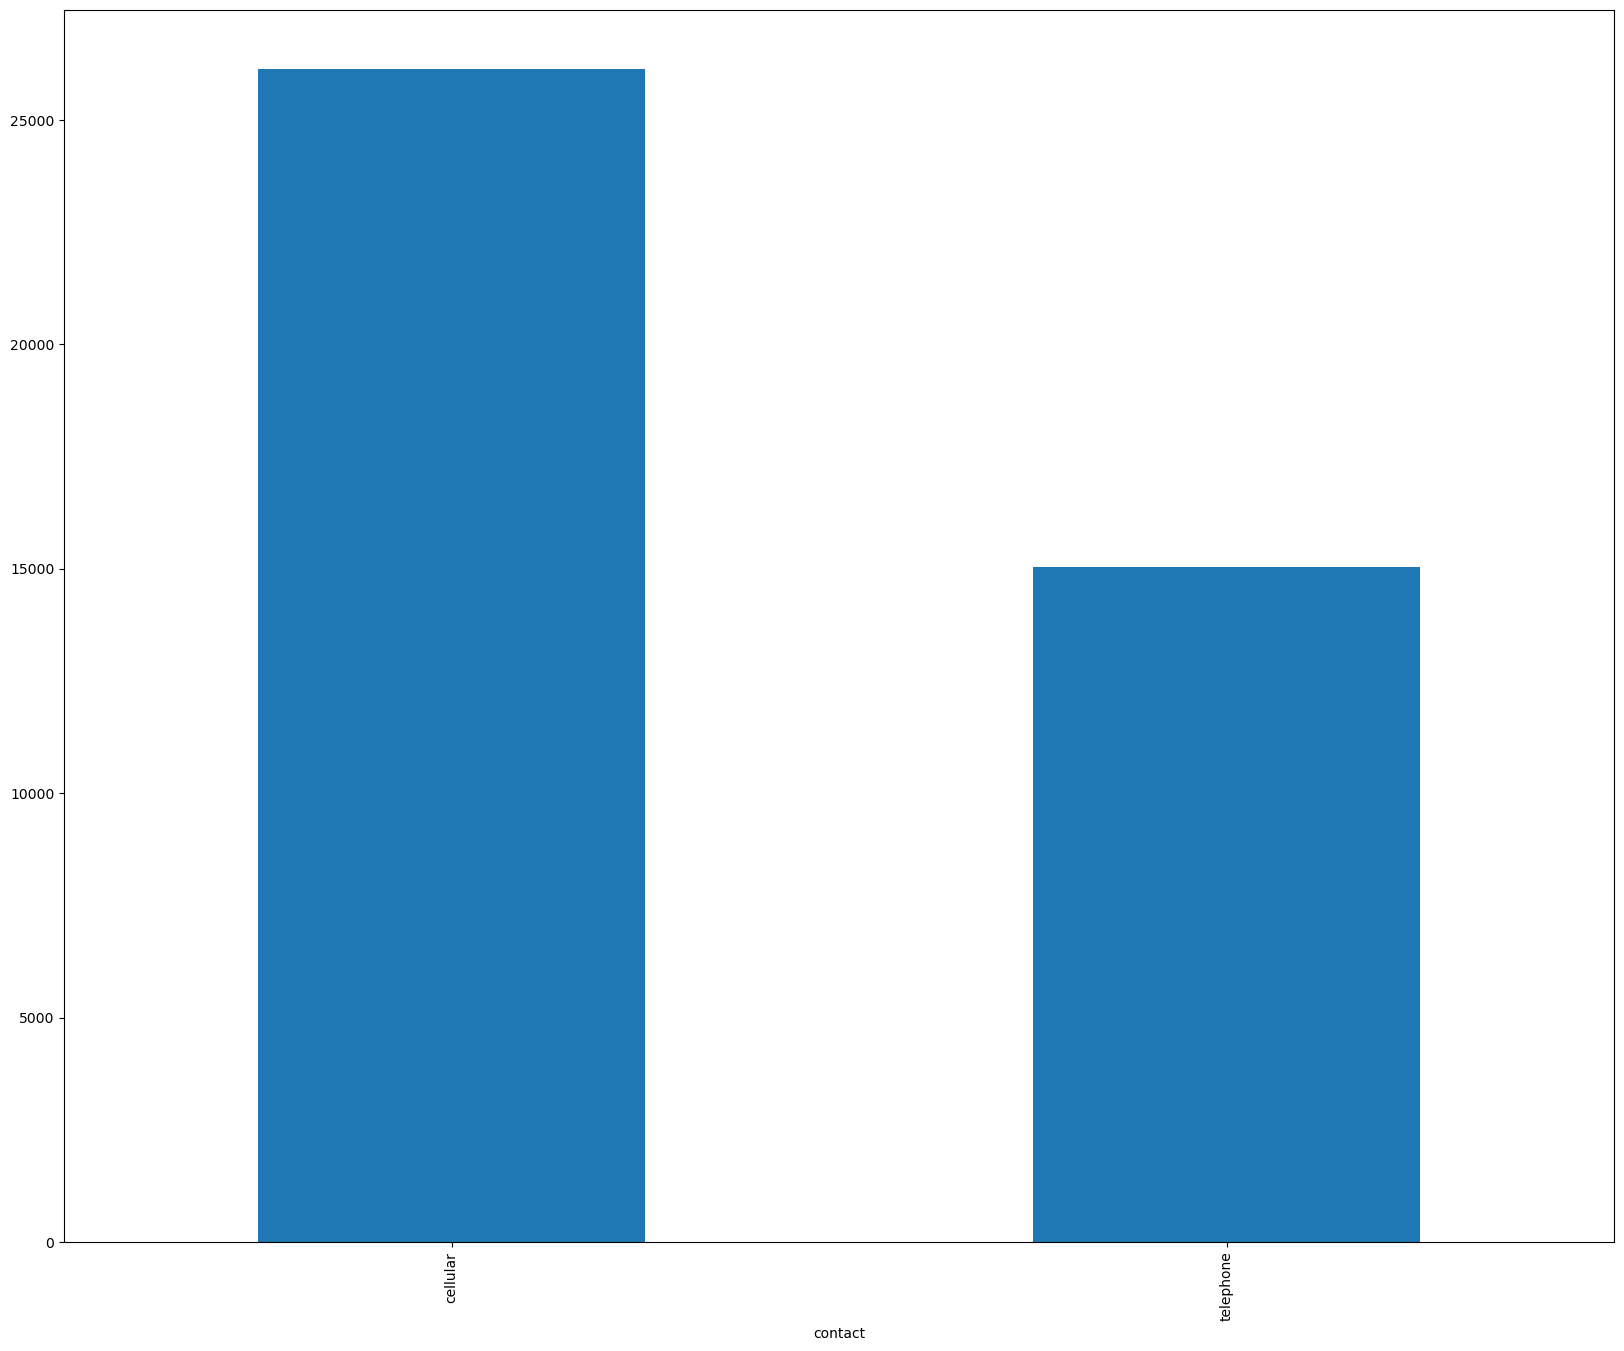

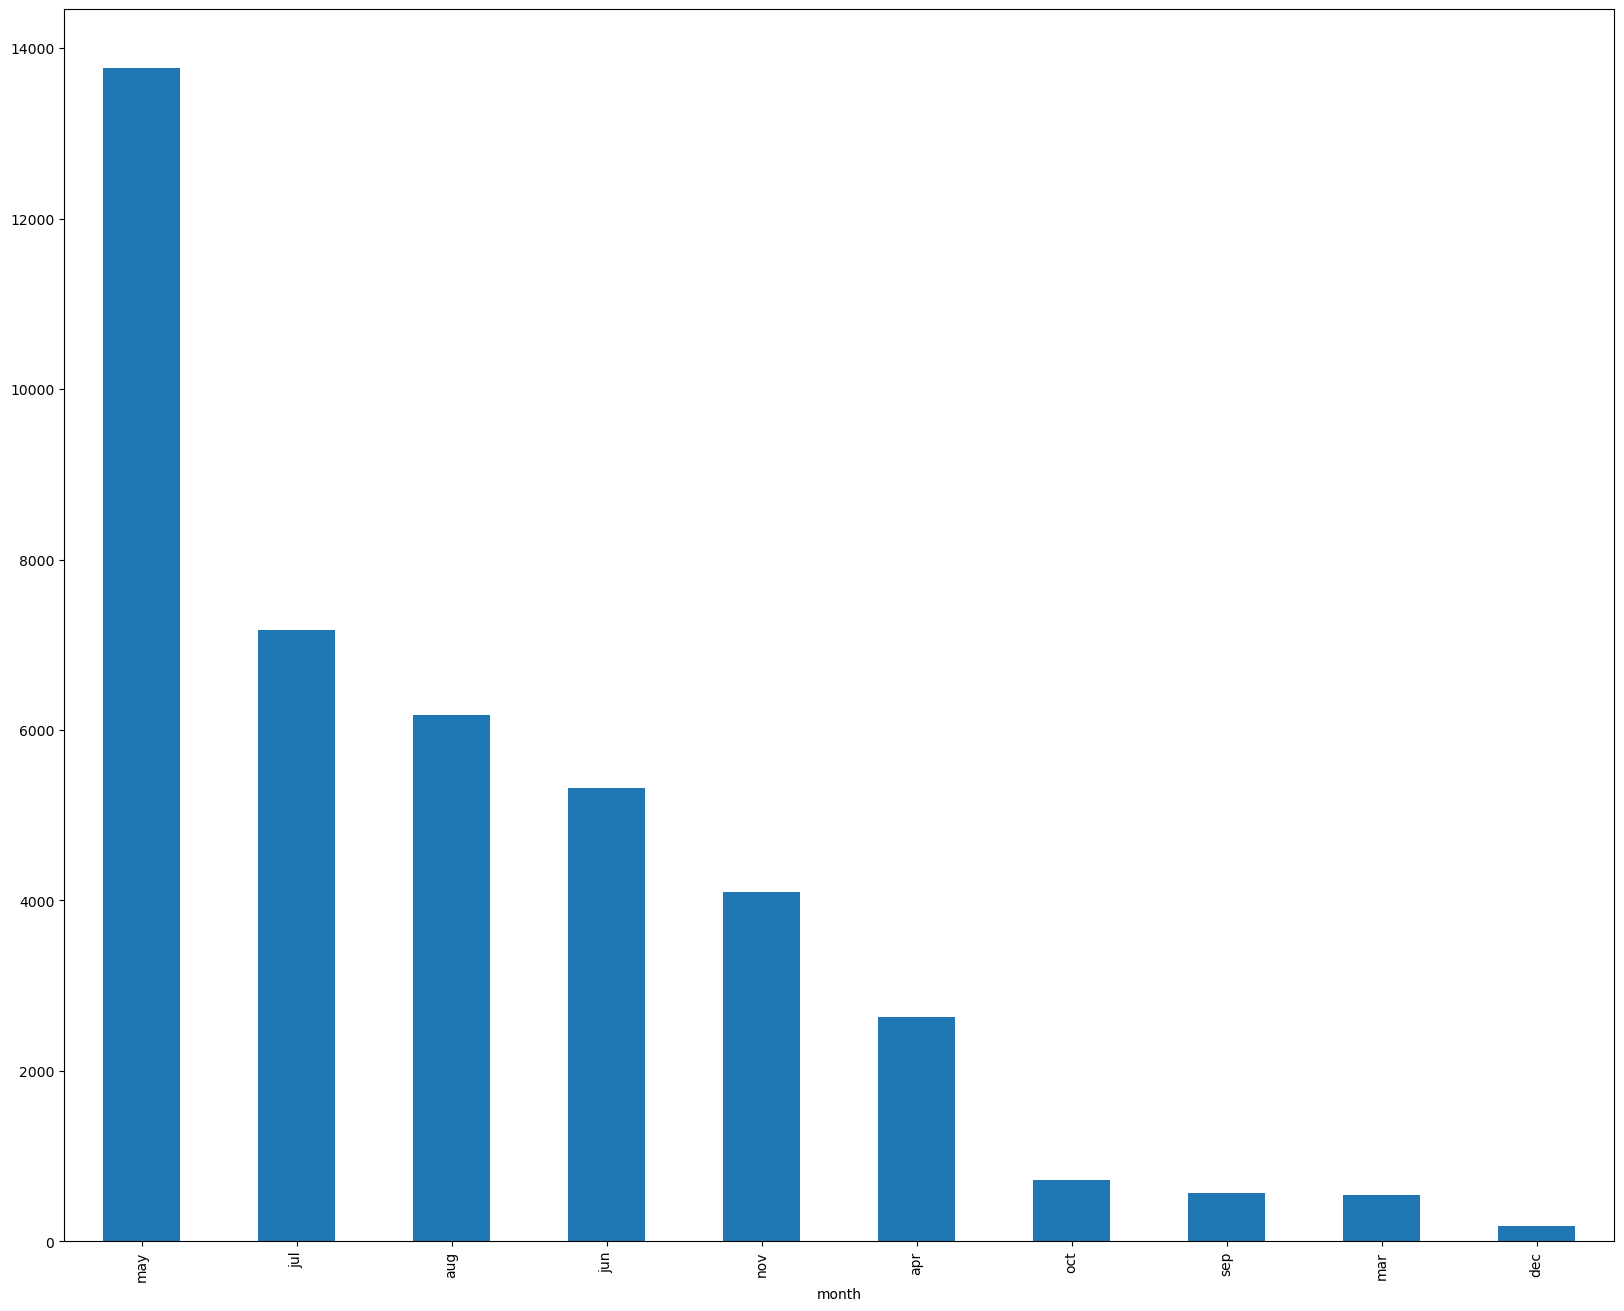

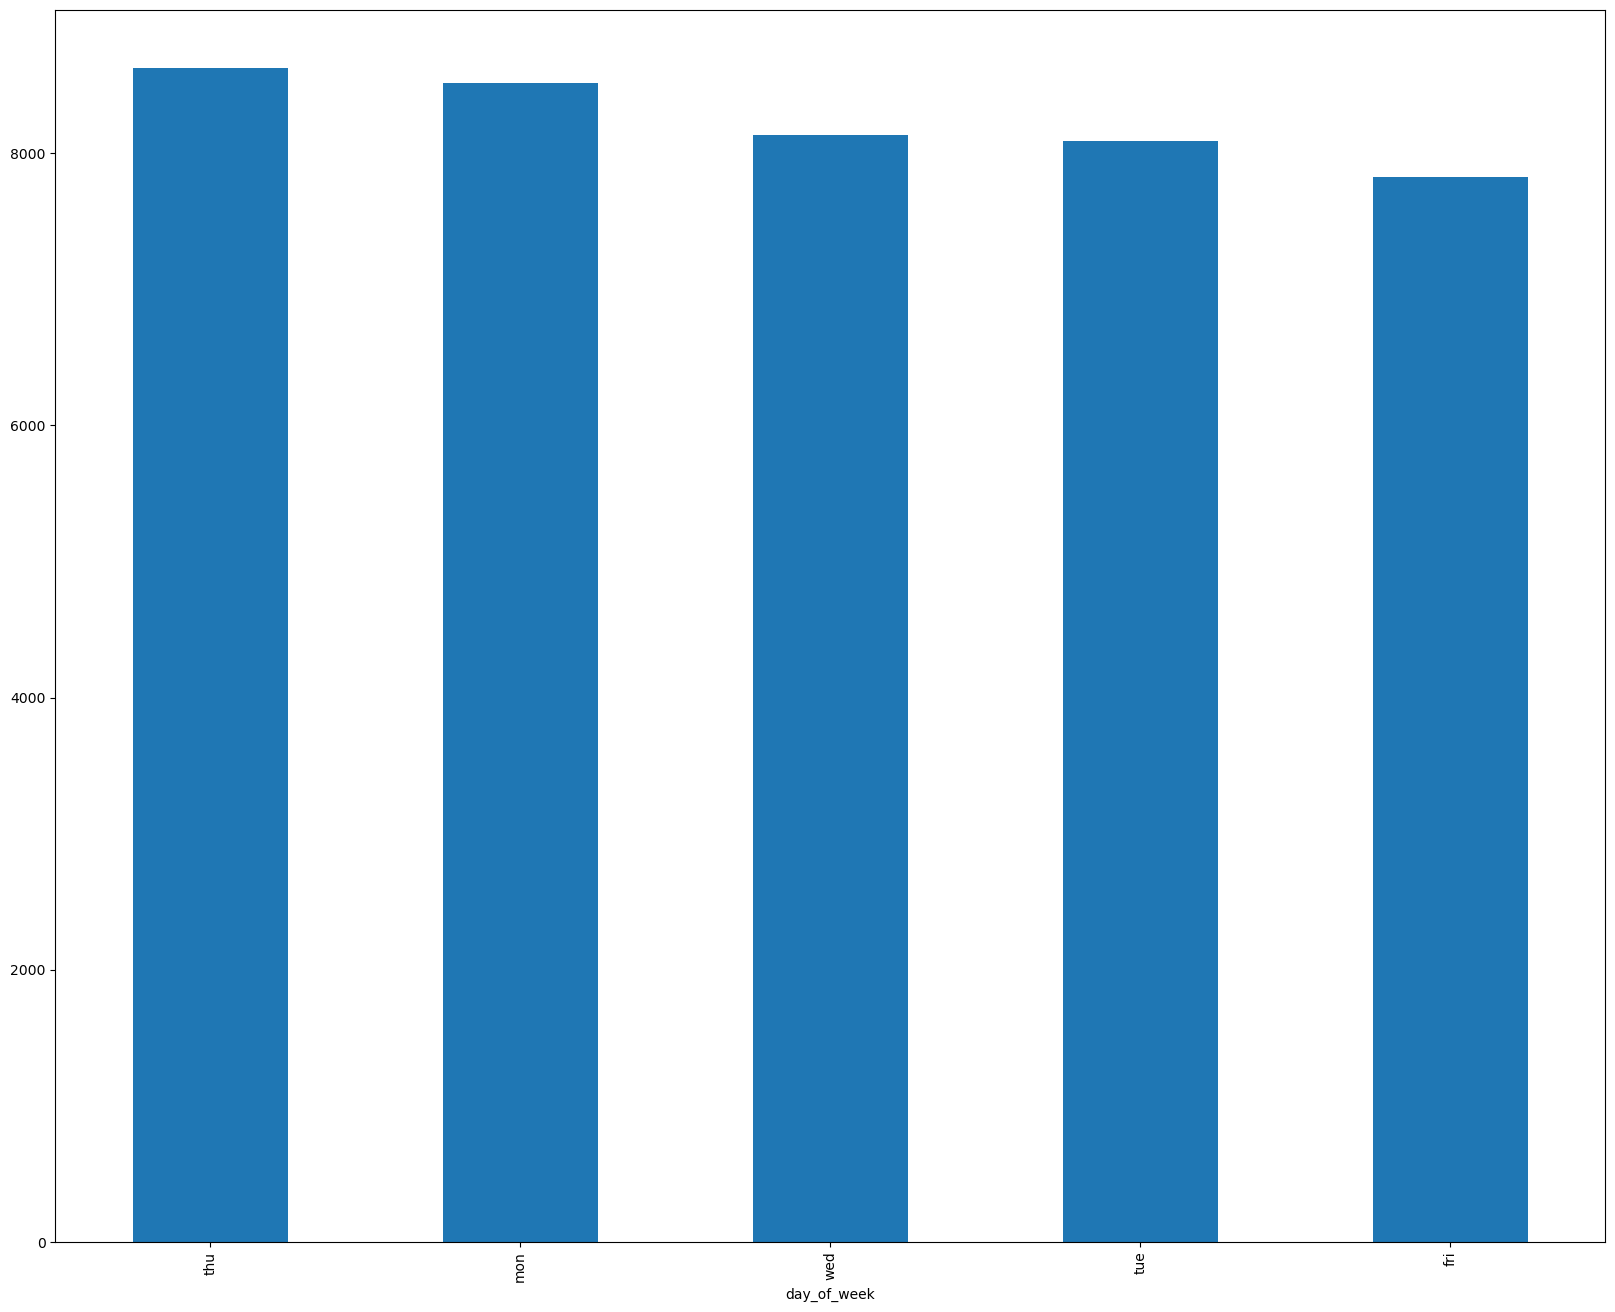

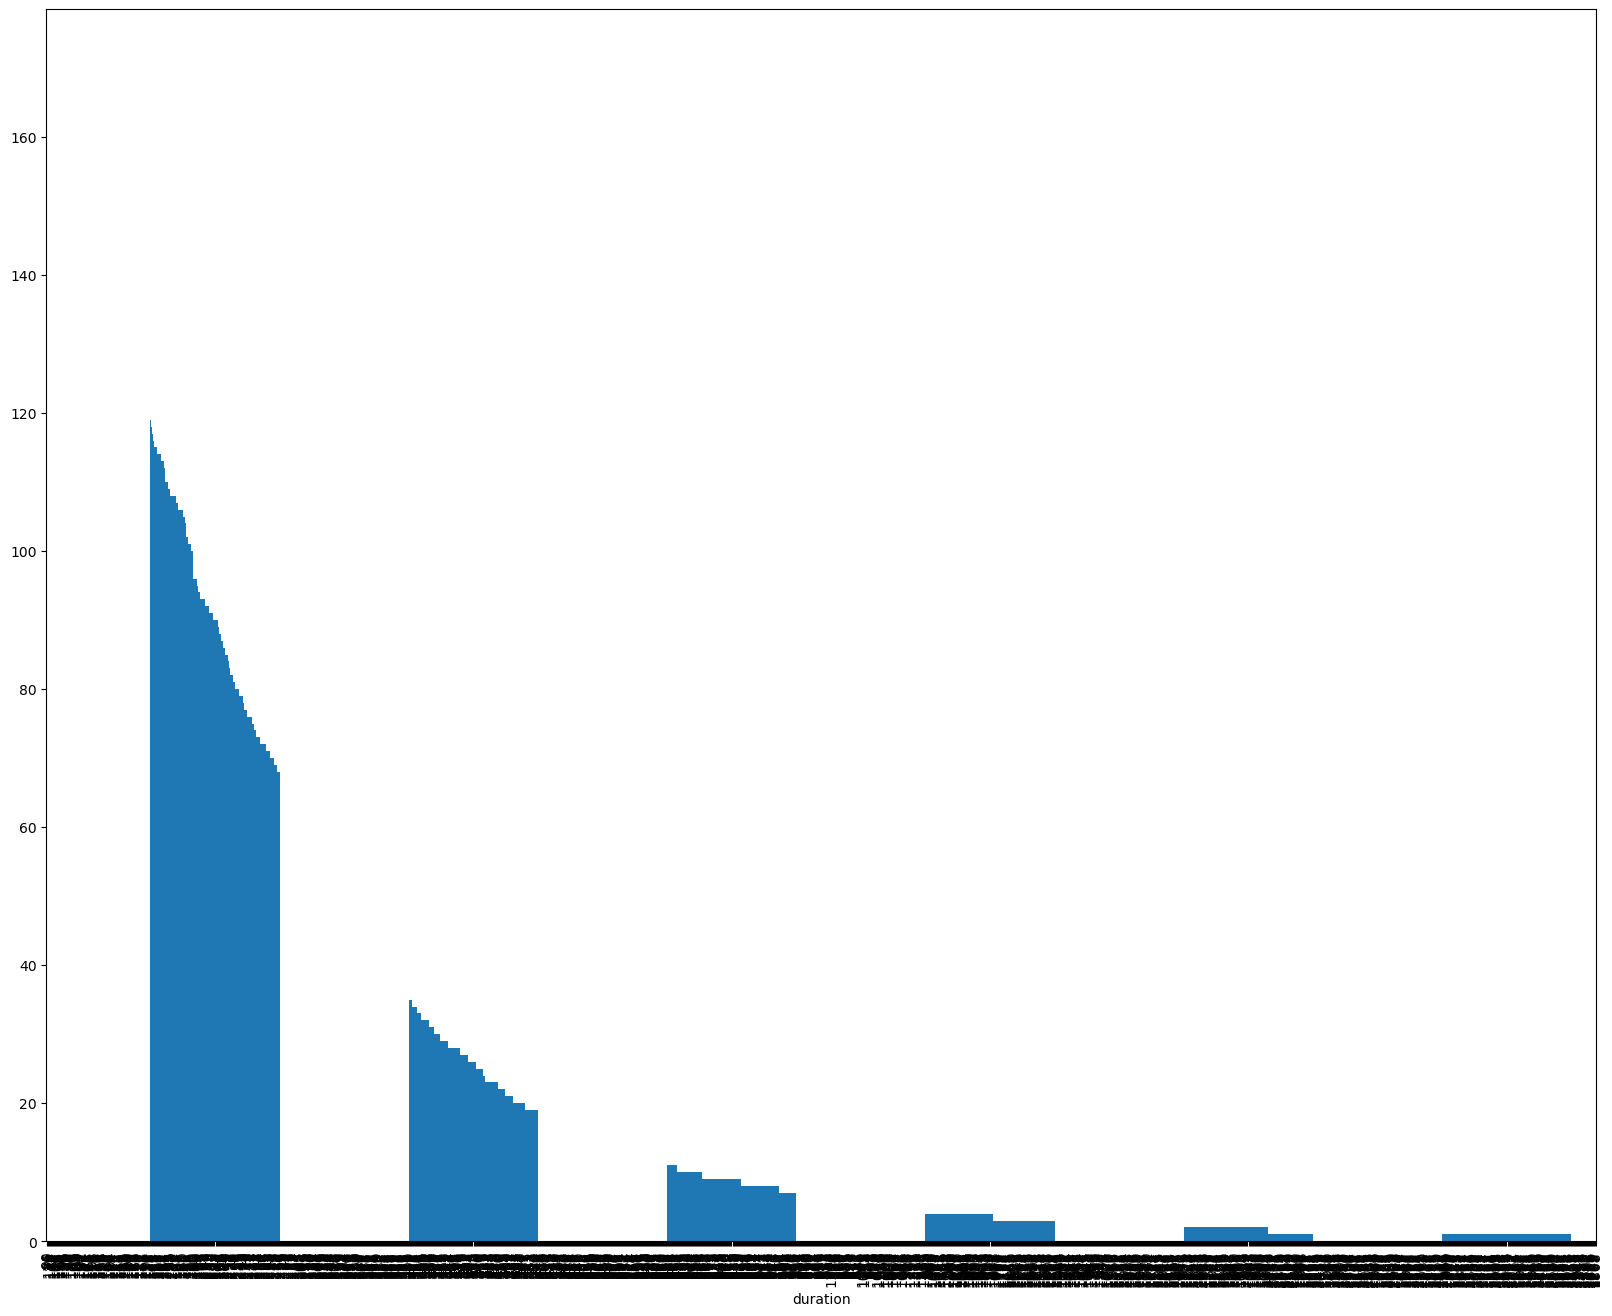

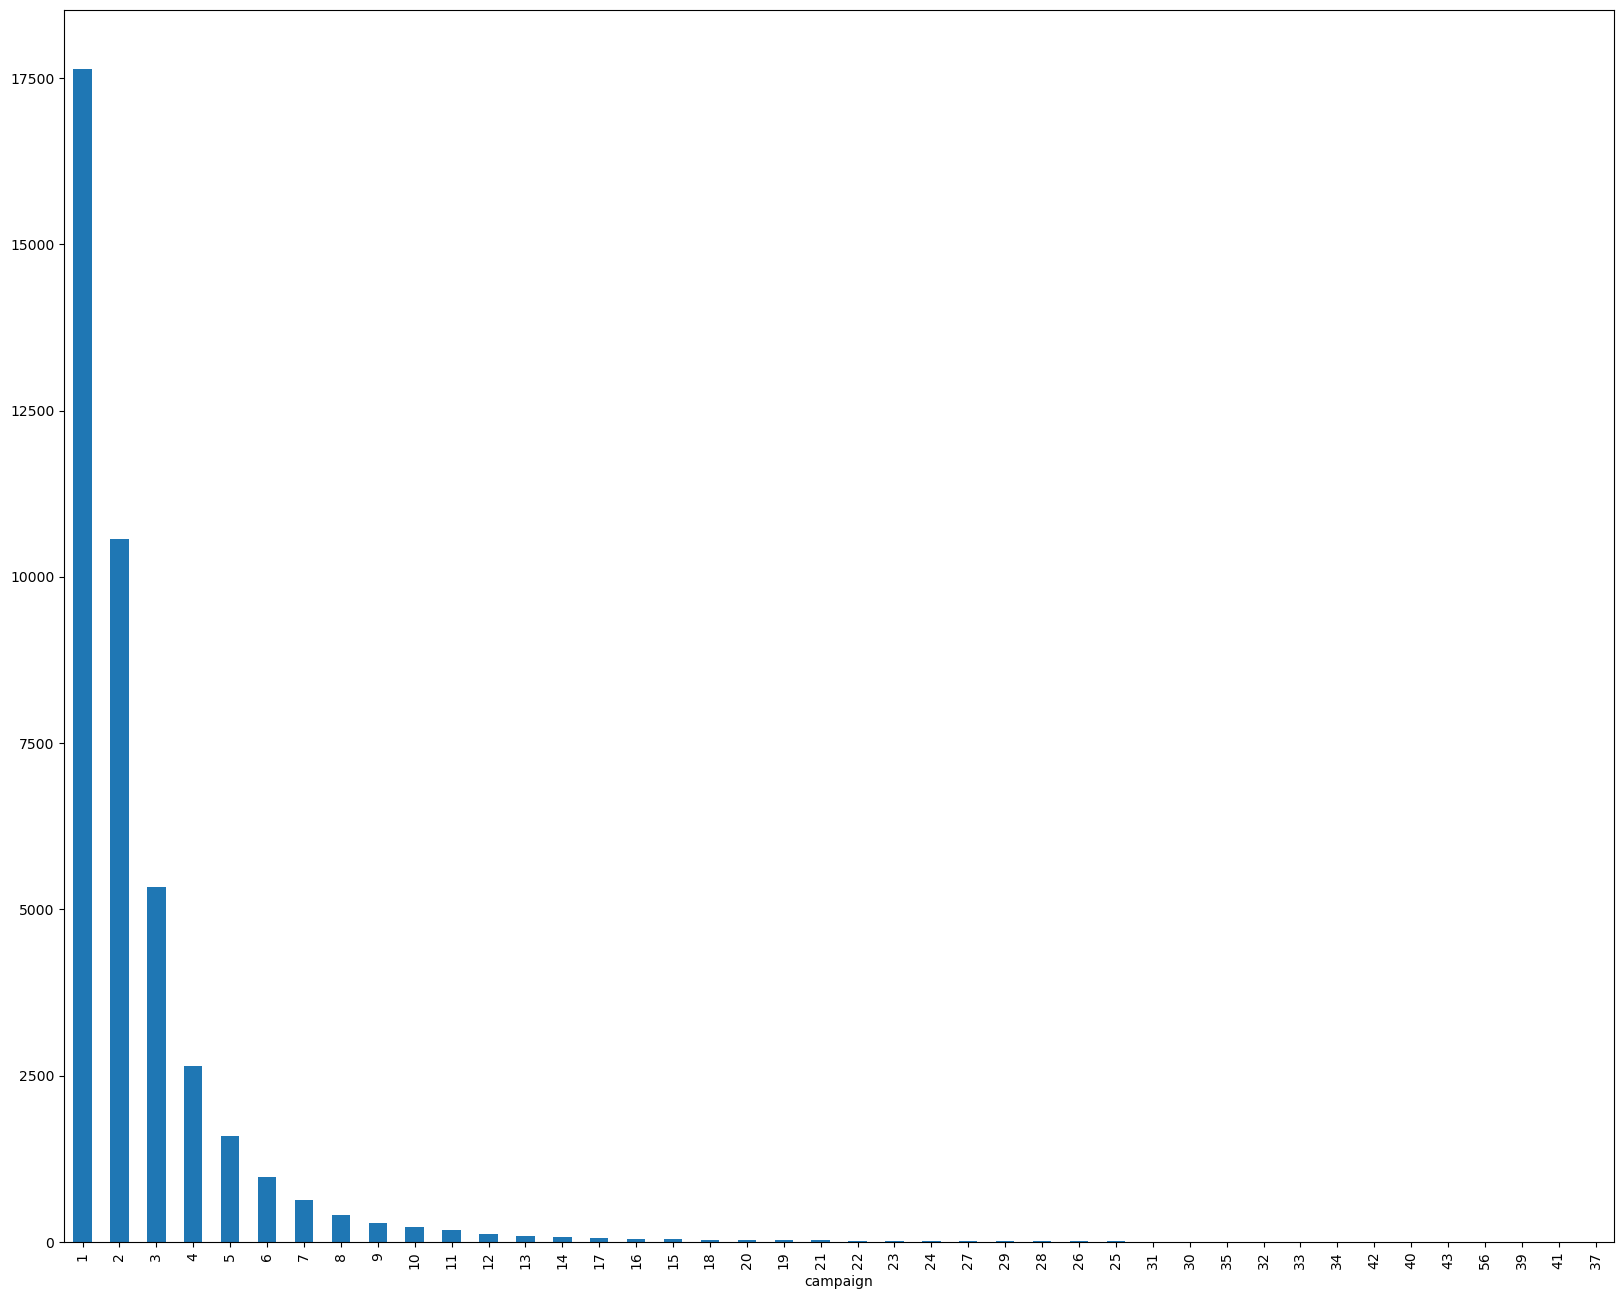

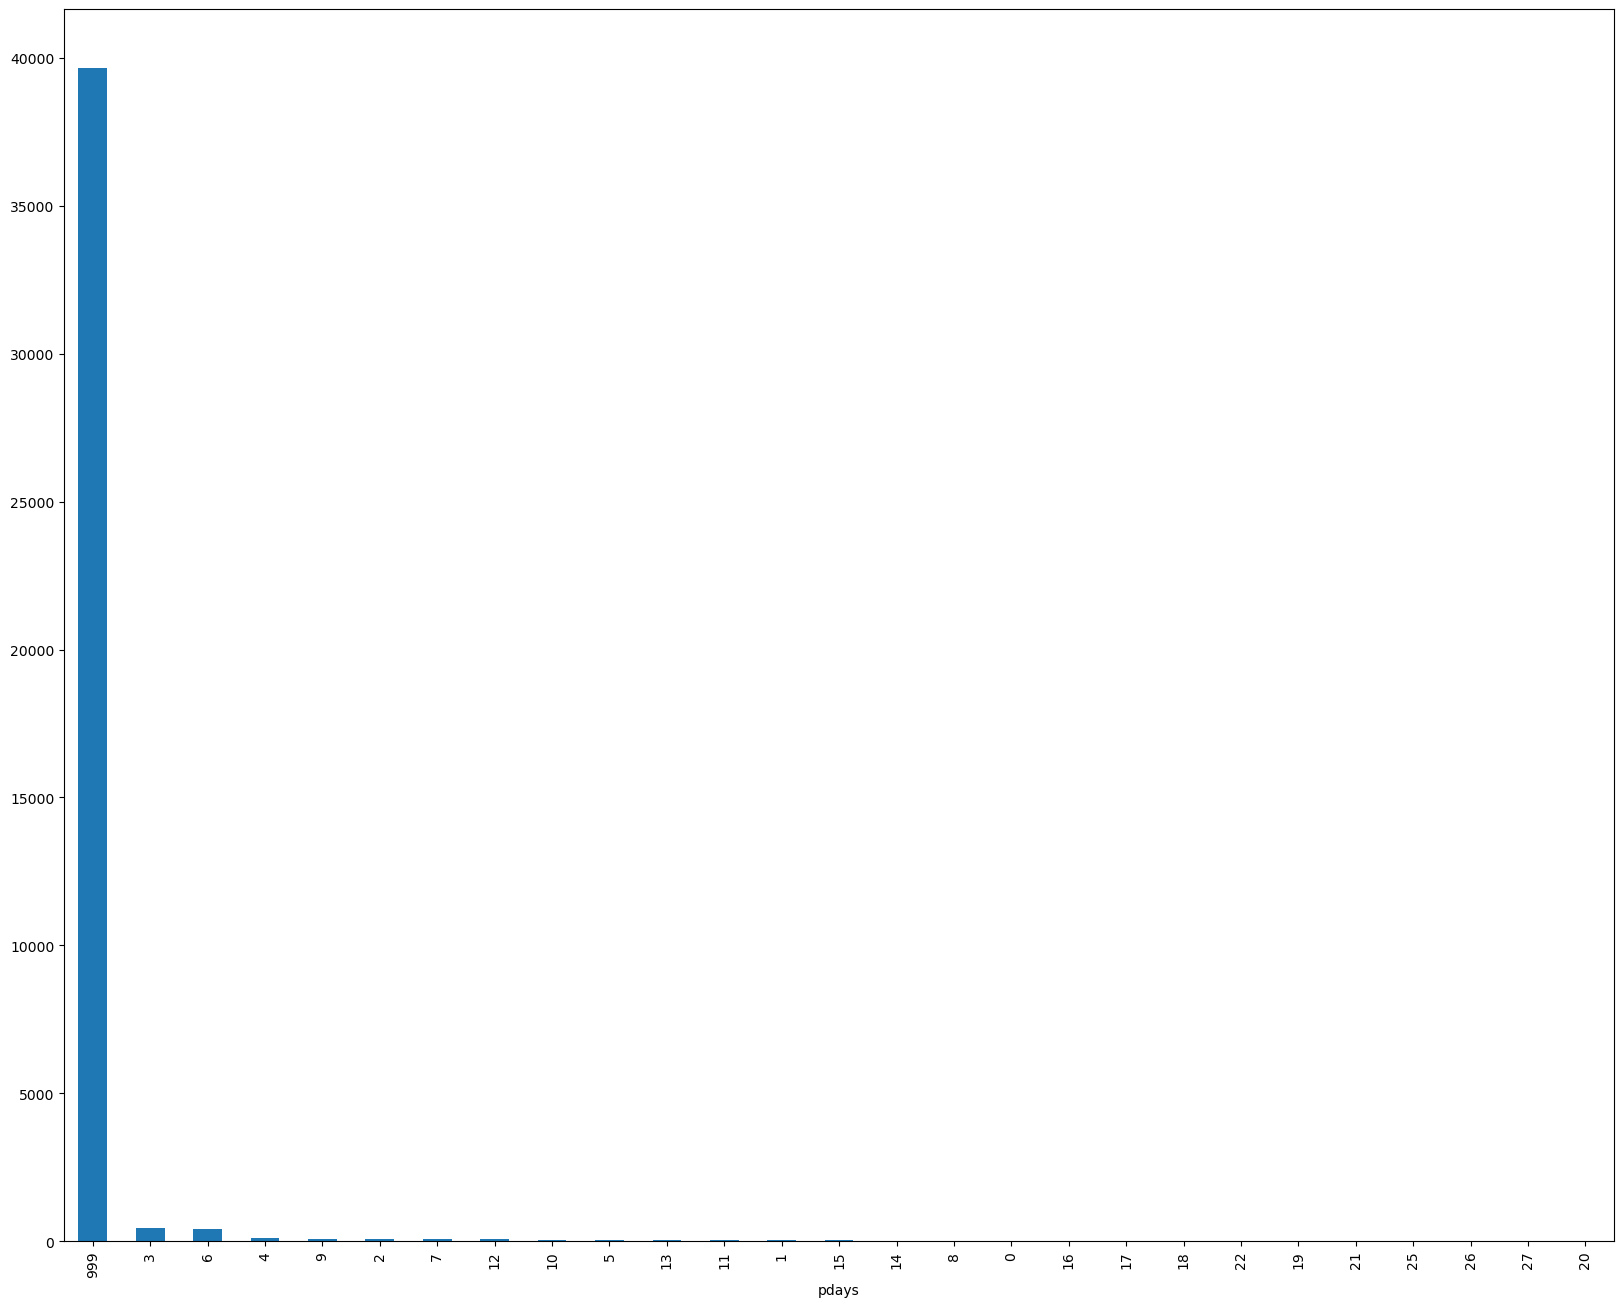

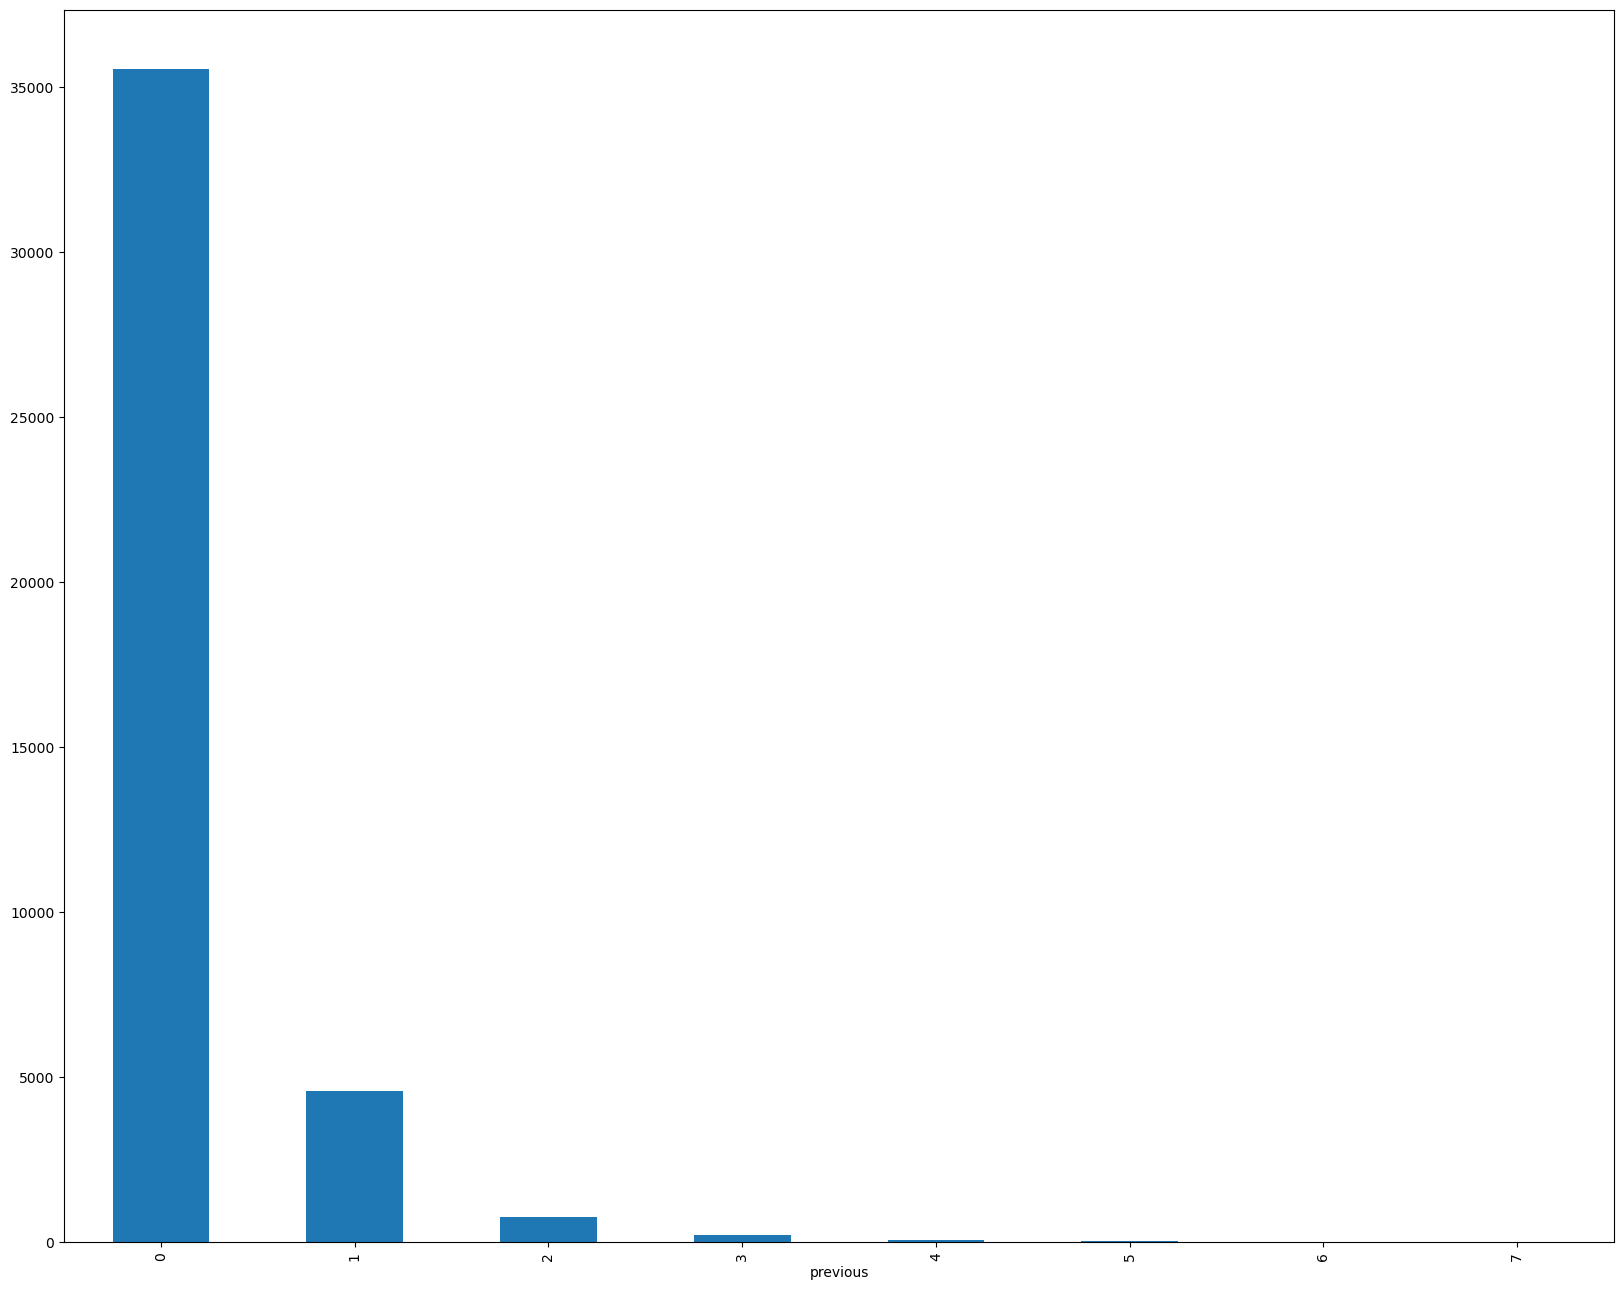

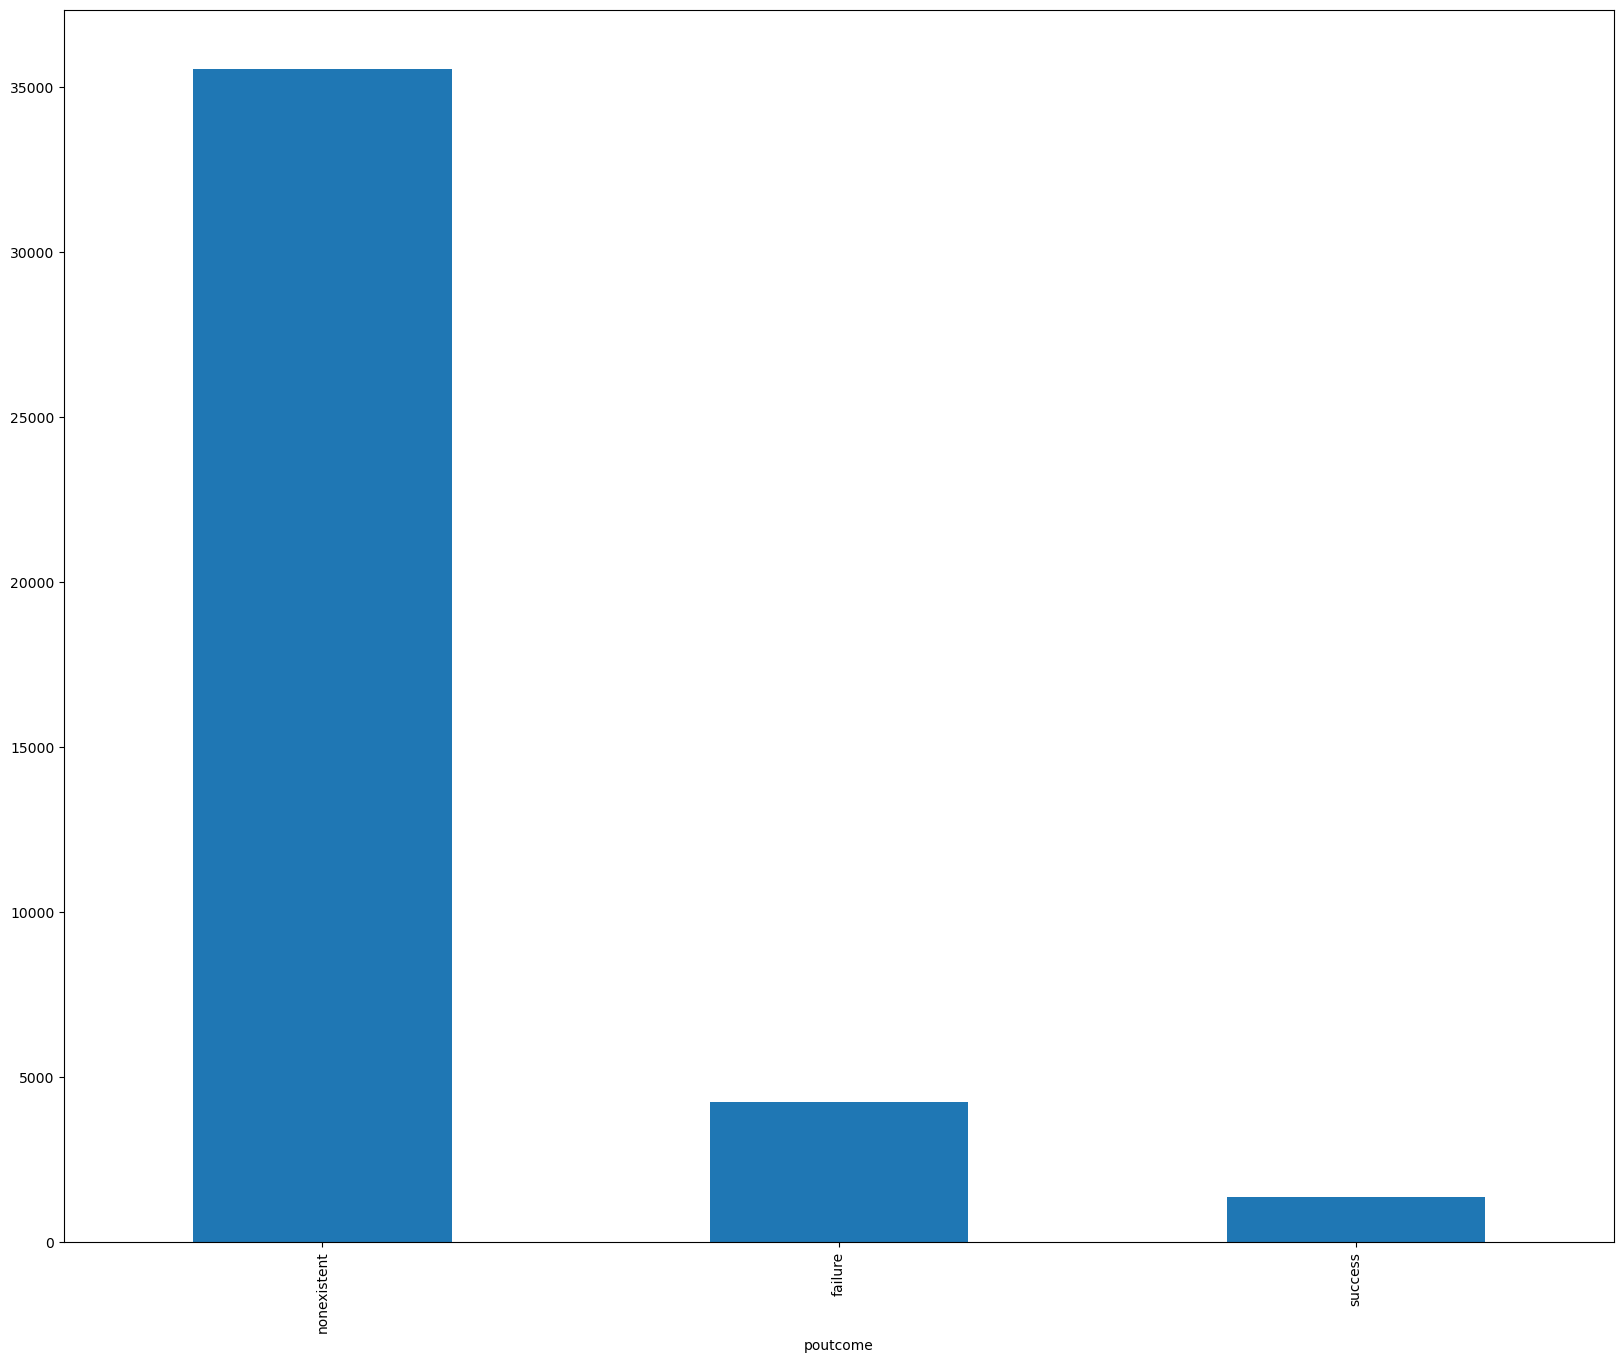

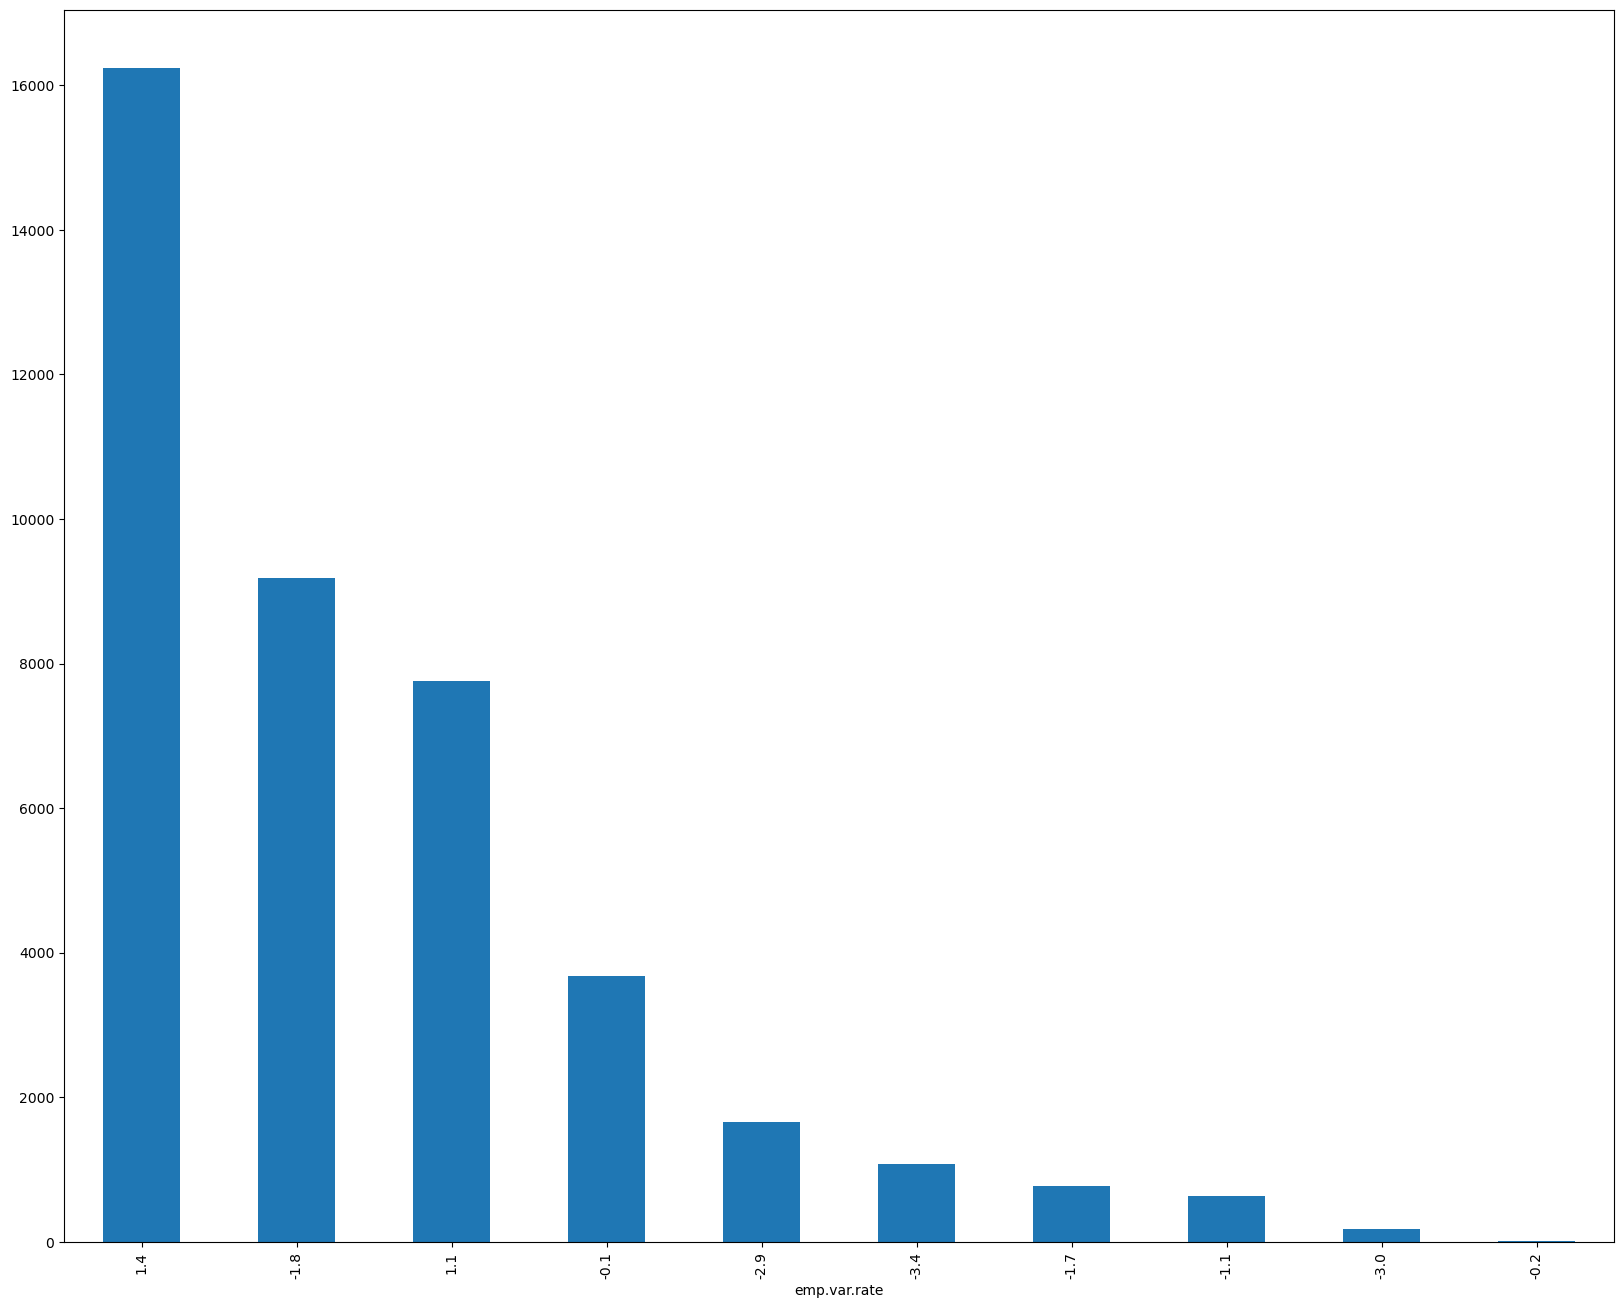

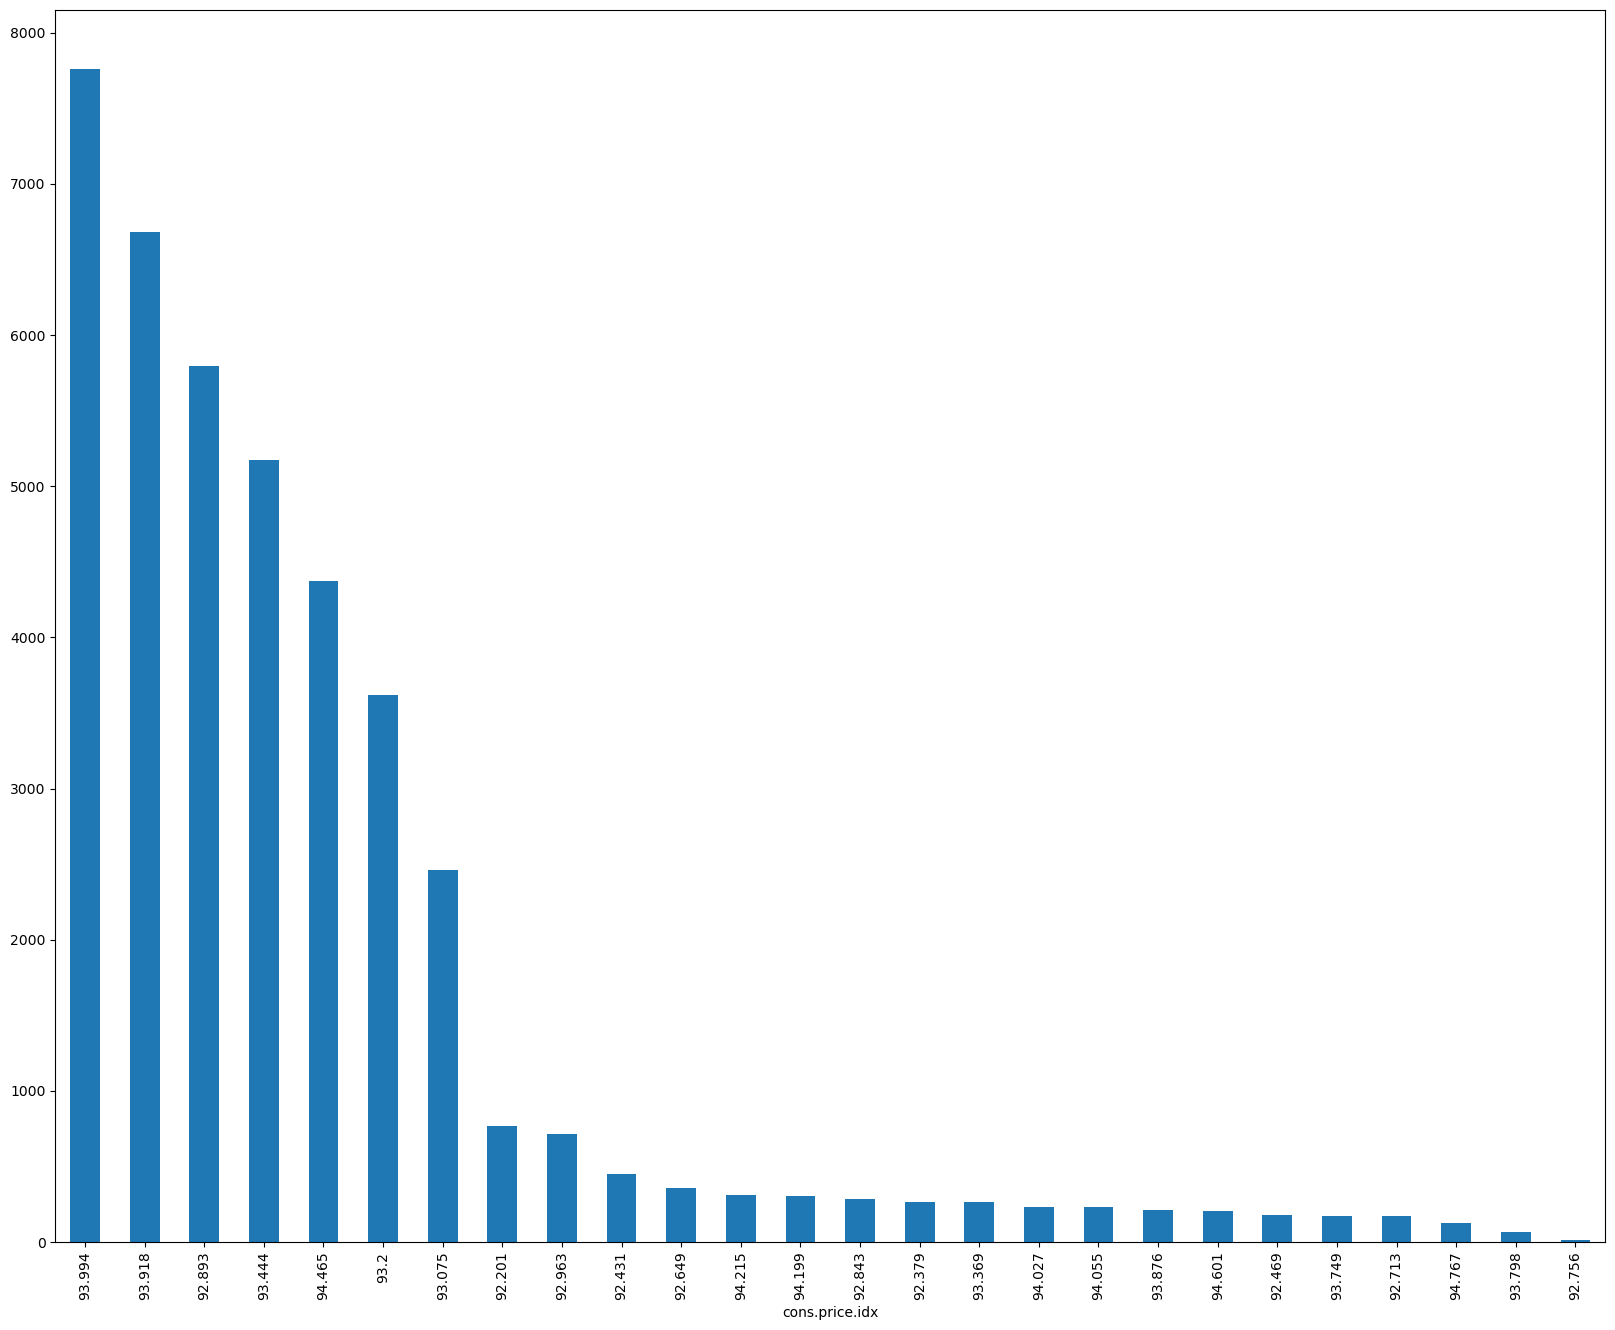

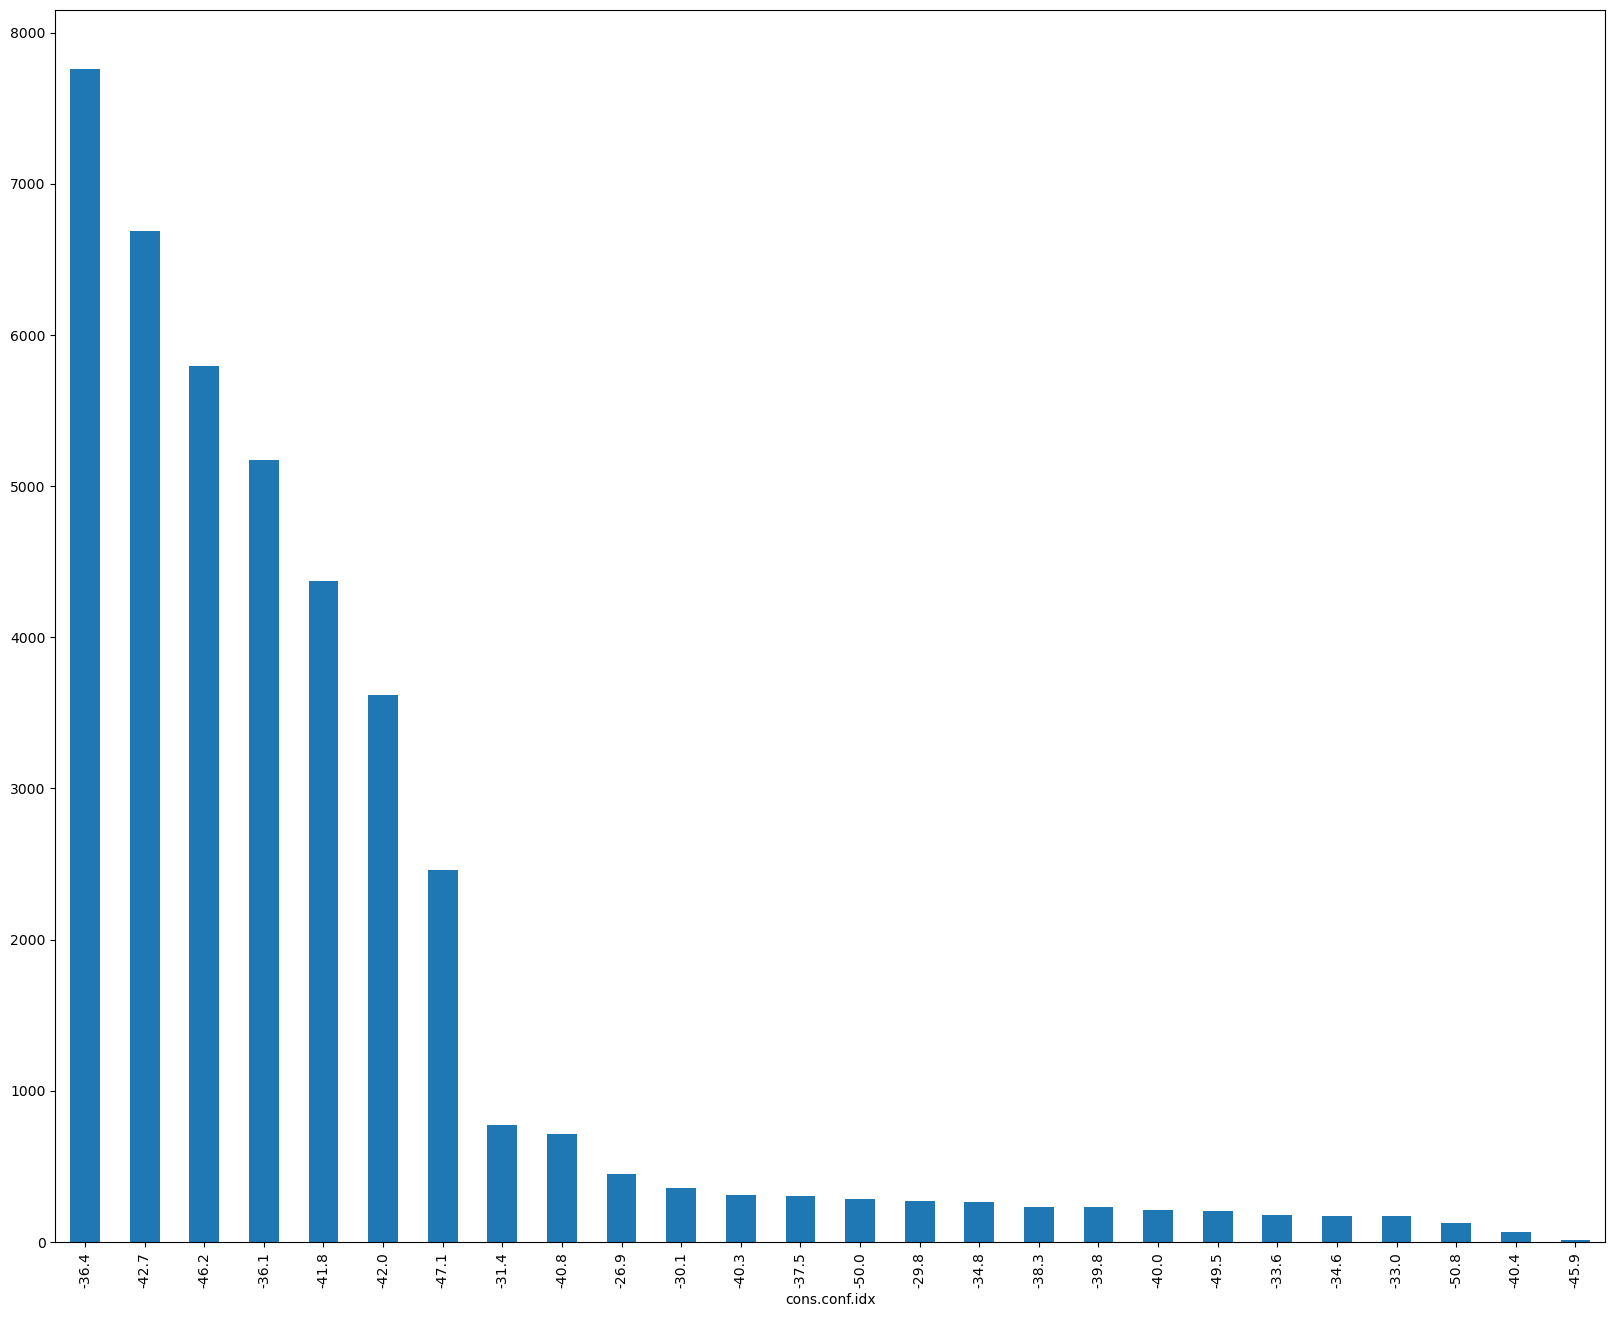

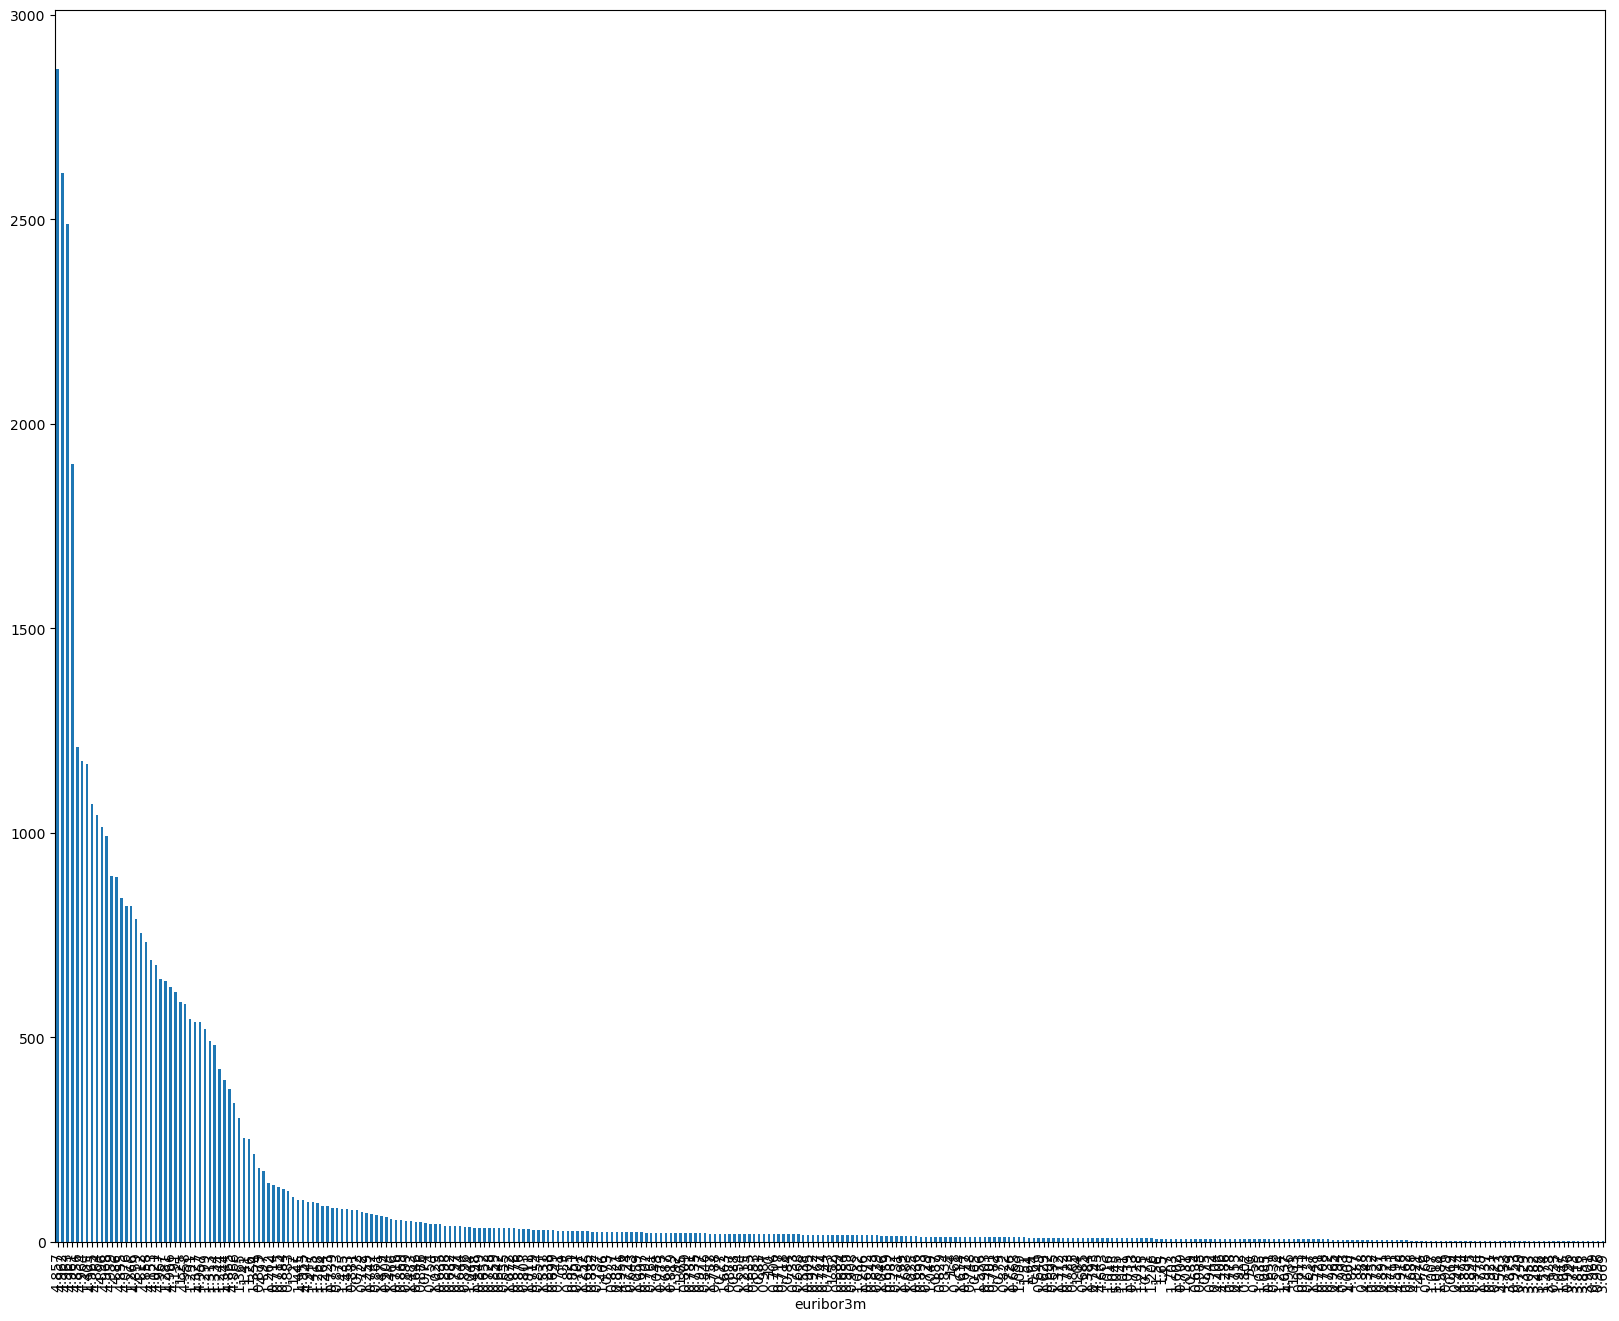

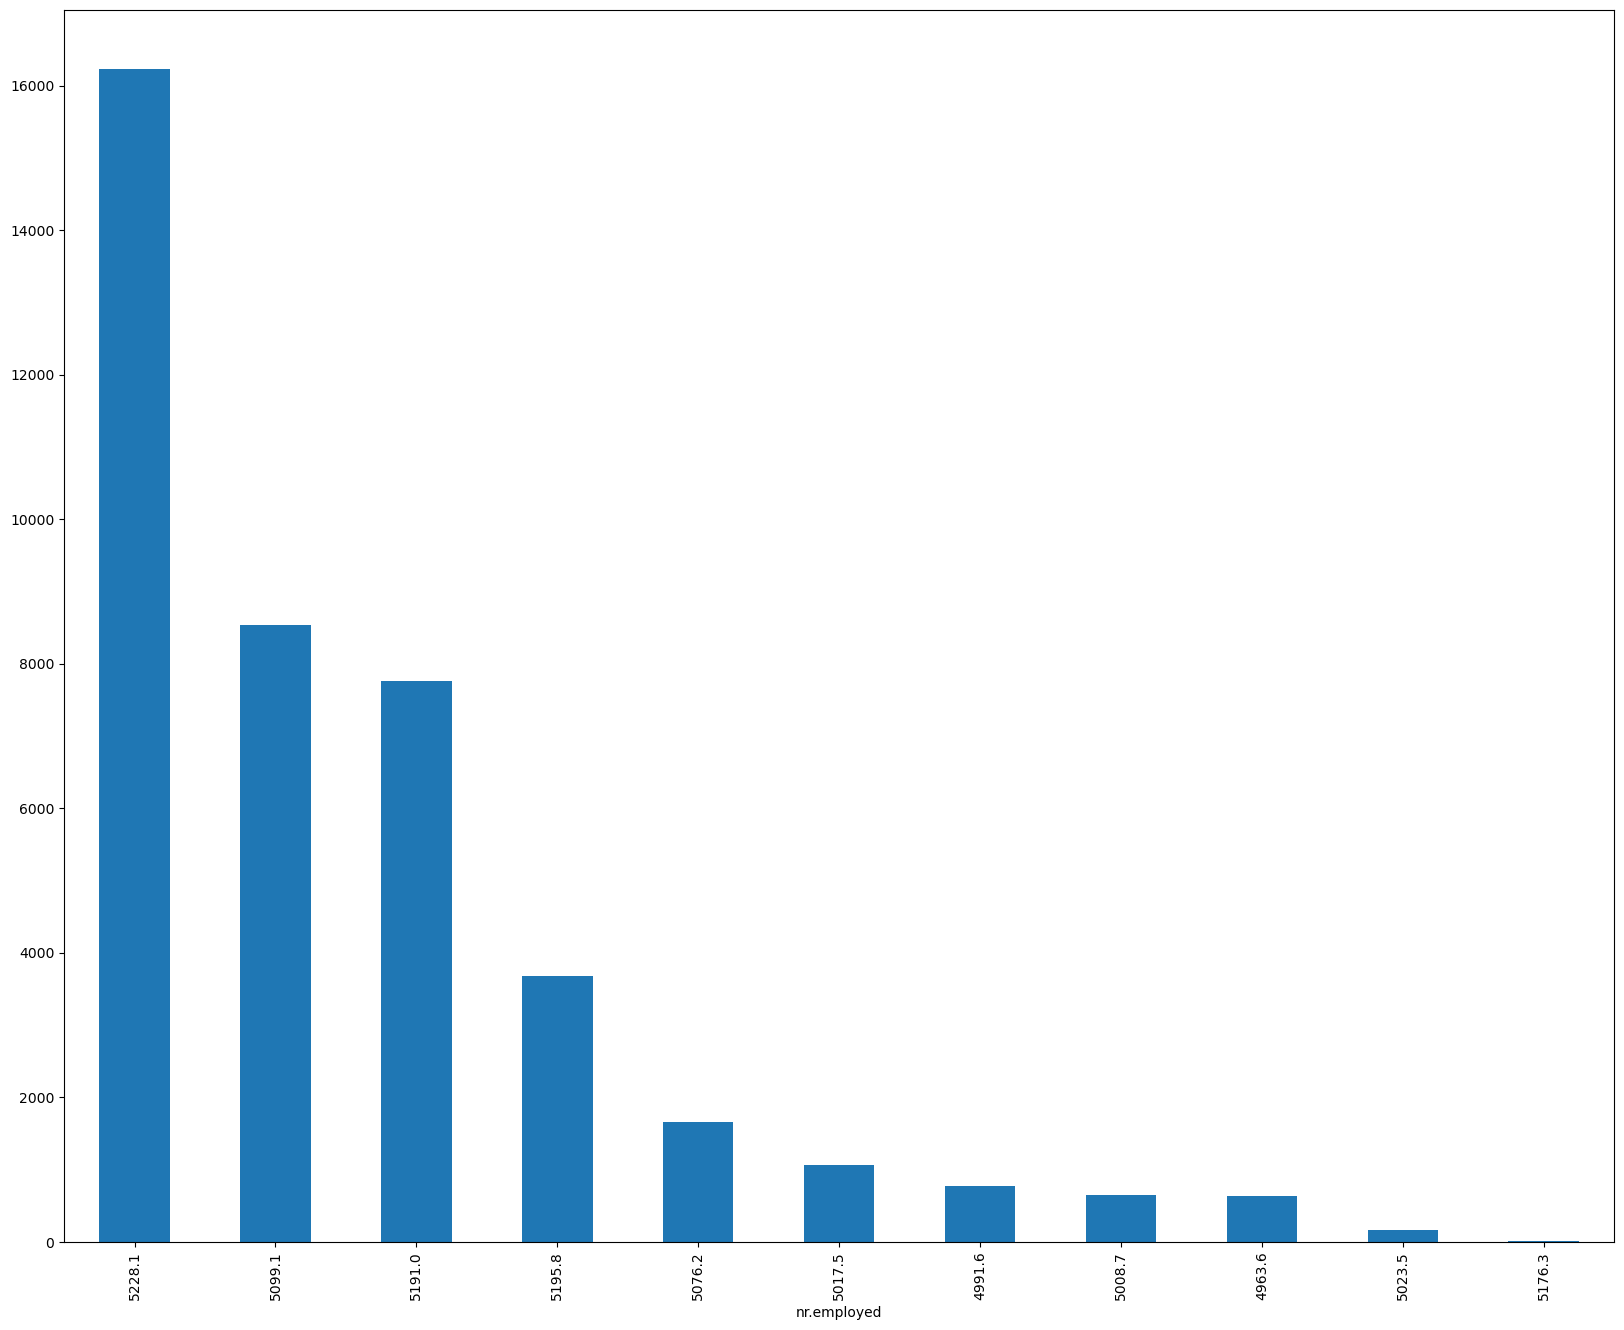

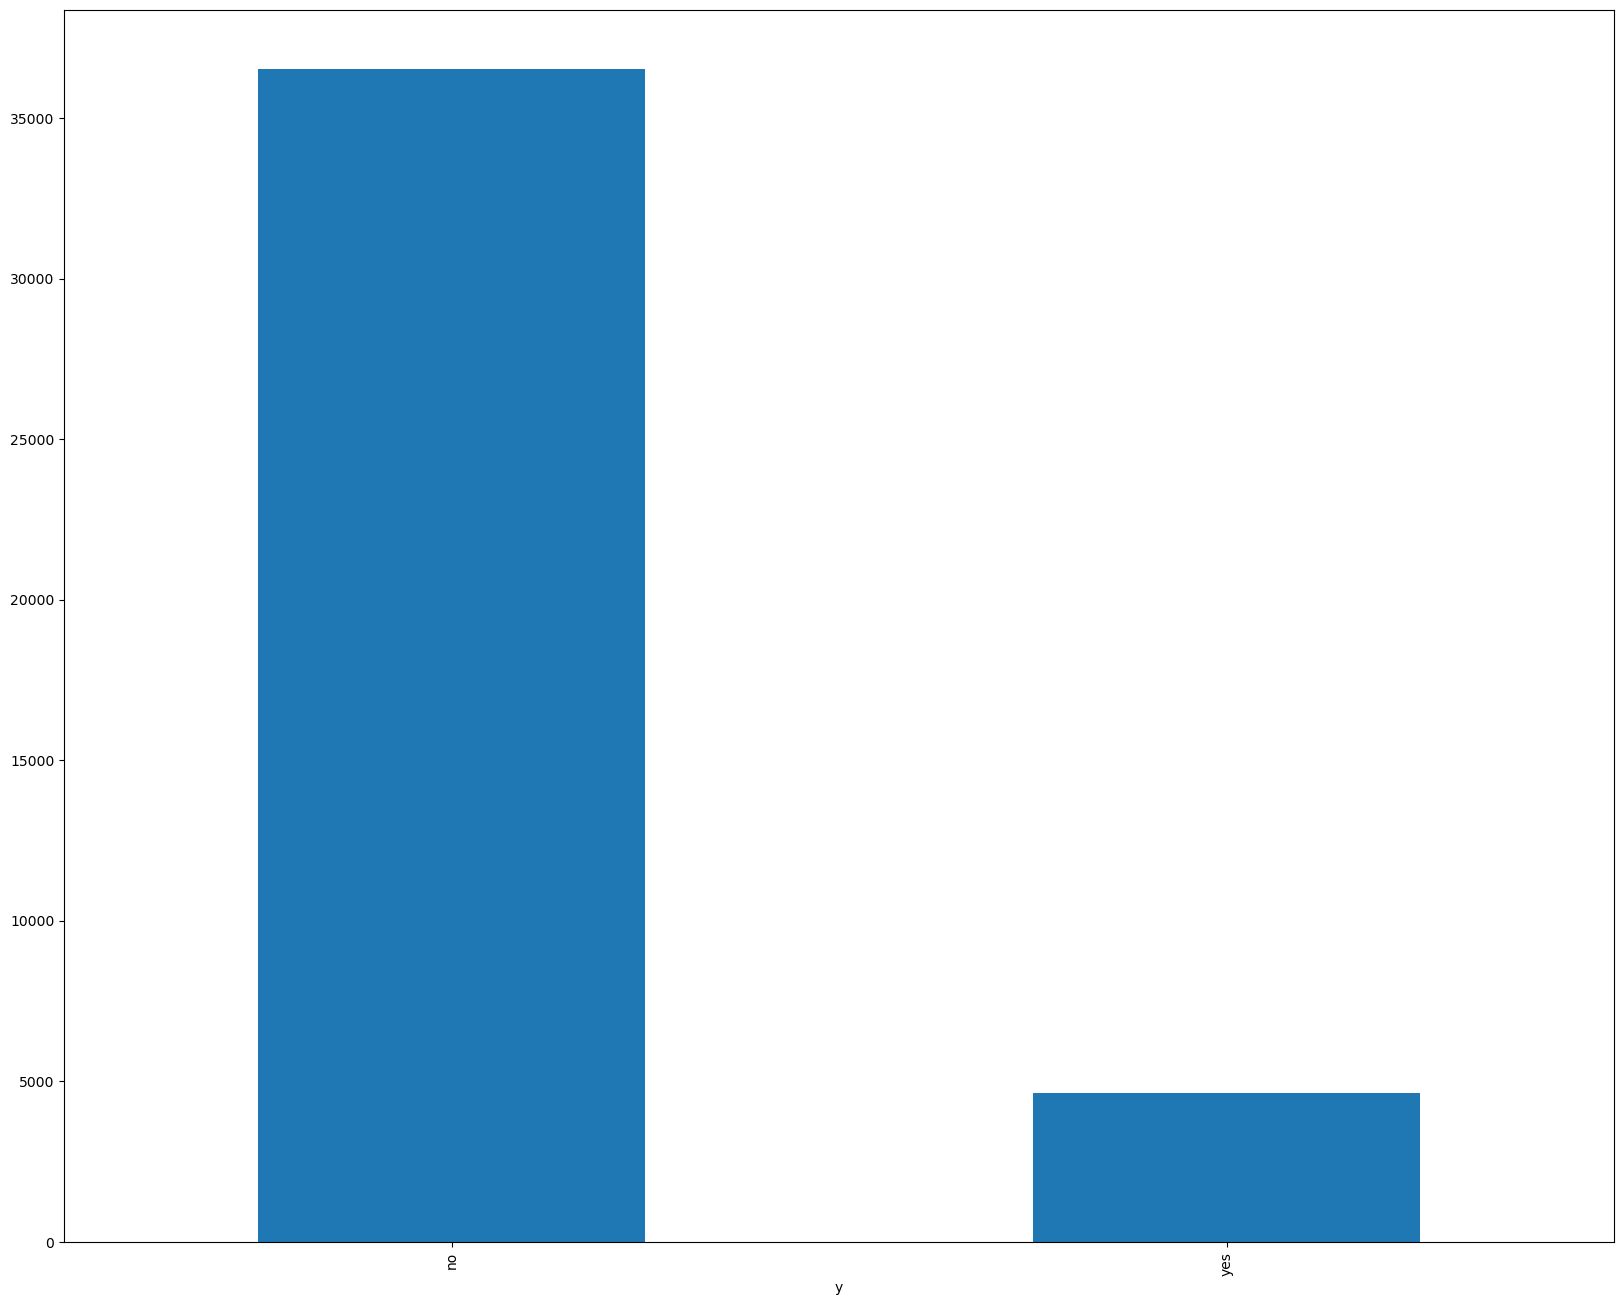

In [51]:
for col in data.columns:
    plt.figure(figsize=(20,16))
    data[col].value_counts().plot.bar()

C:\Users\iT\AppData\Local\Temp\ipykernel_17192\14720644.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(15,15))


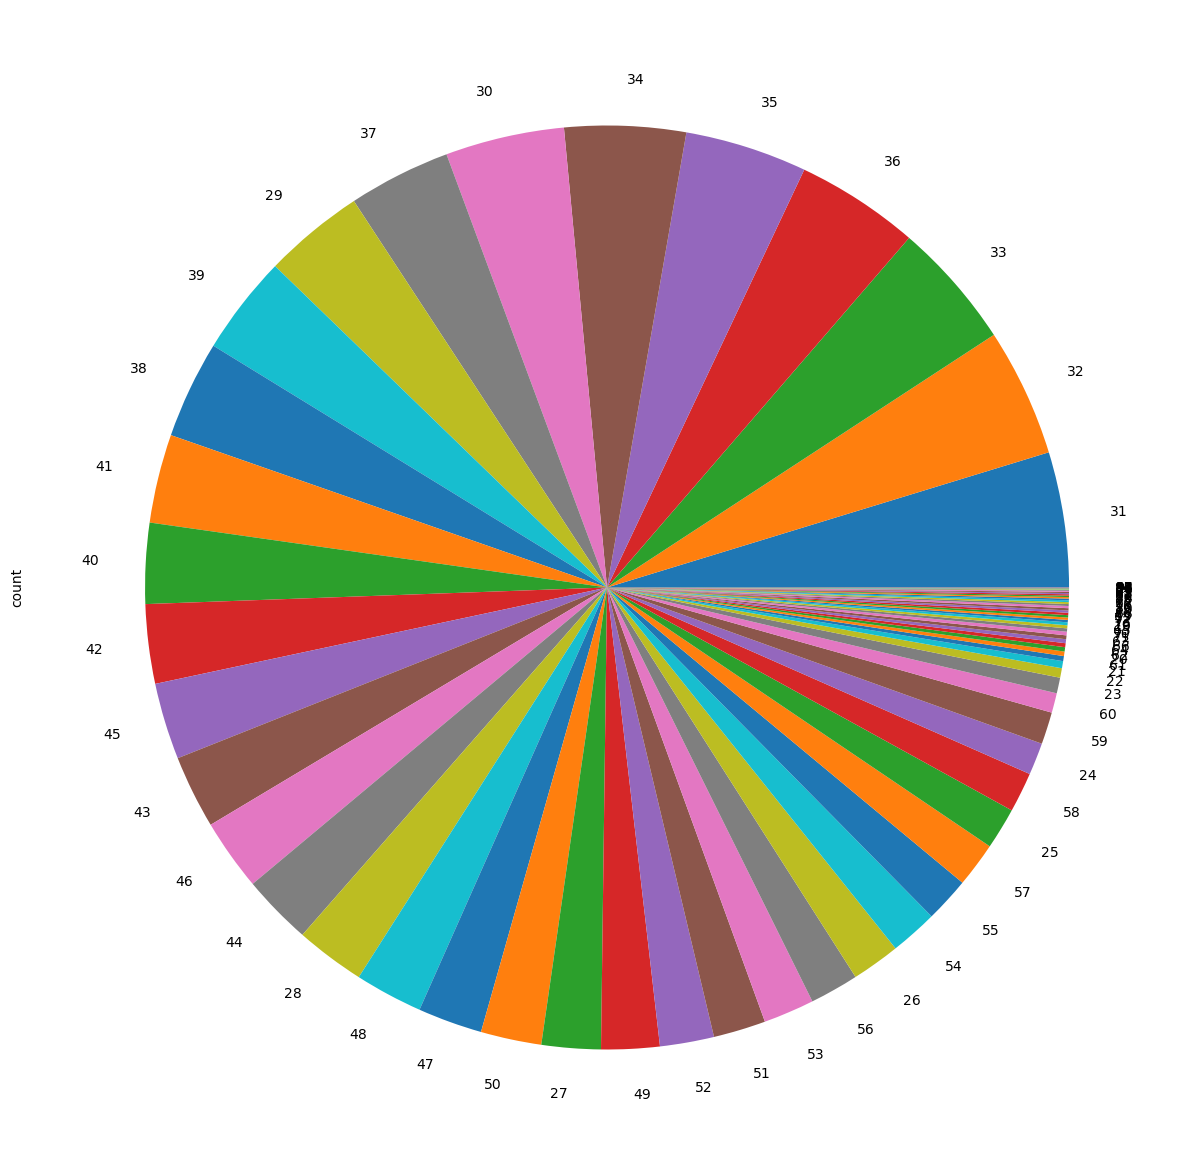

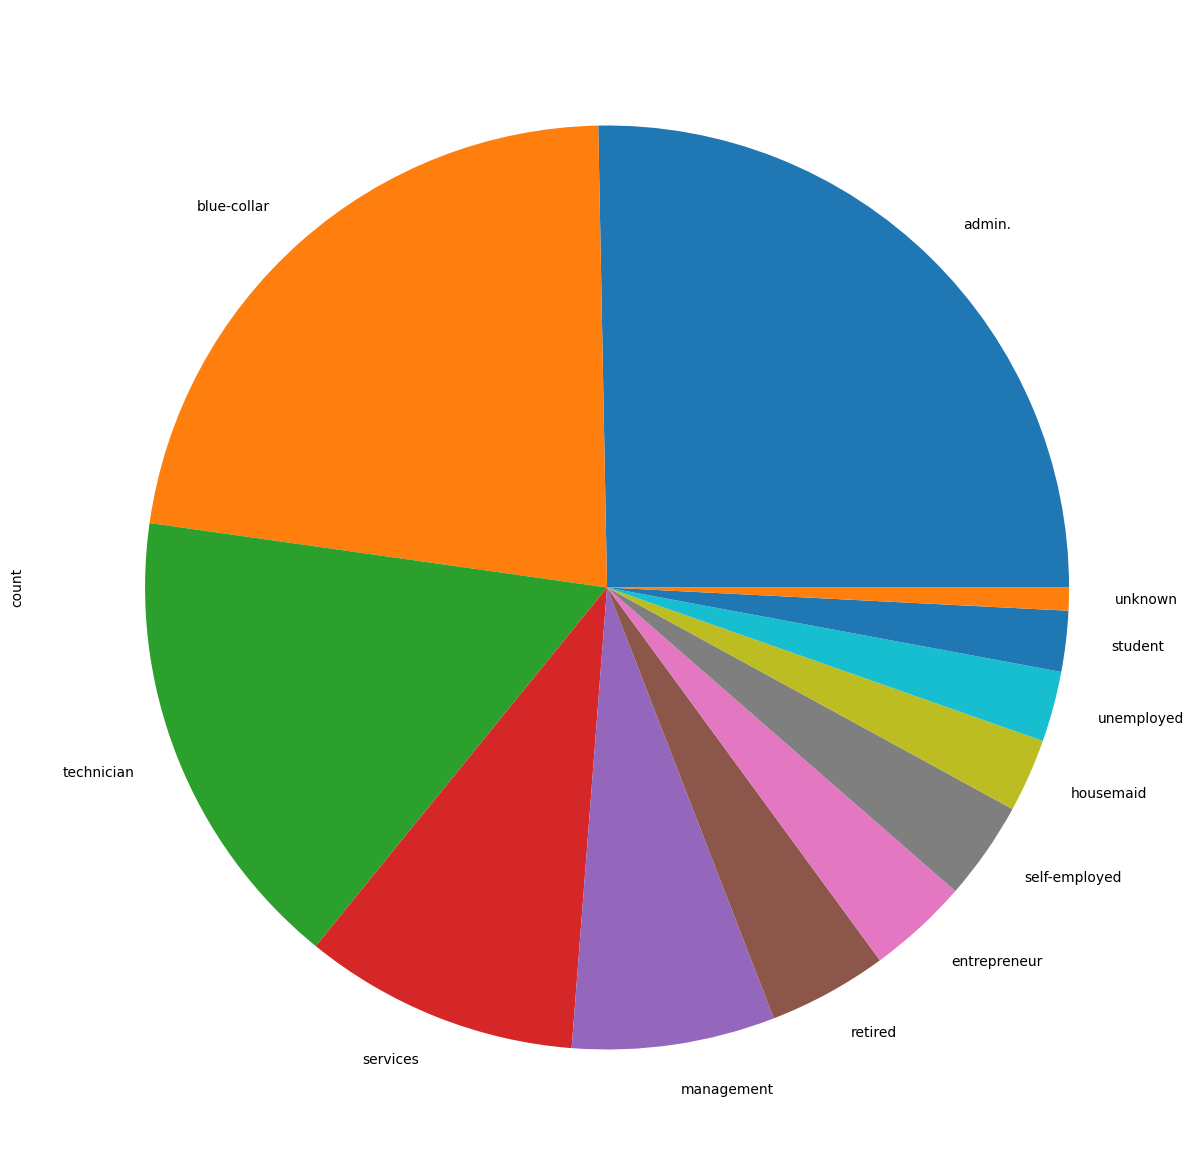

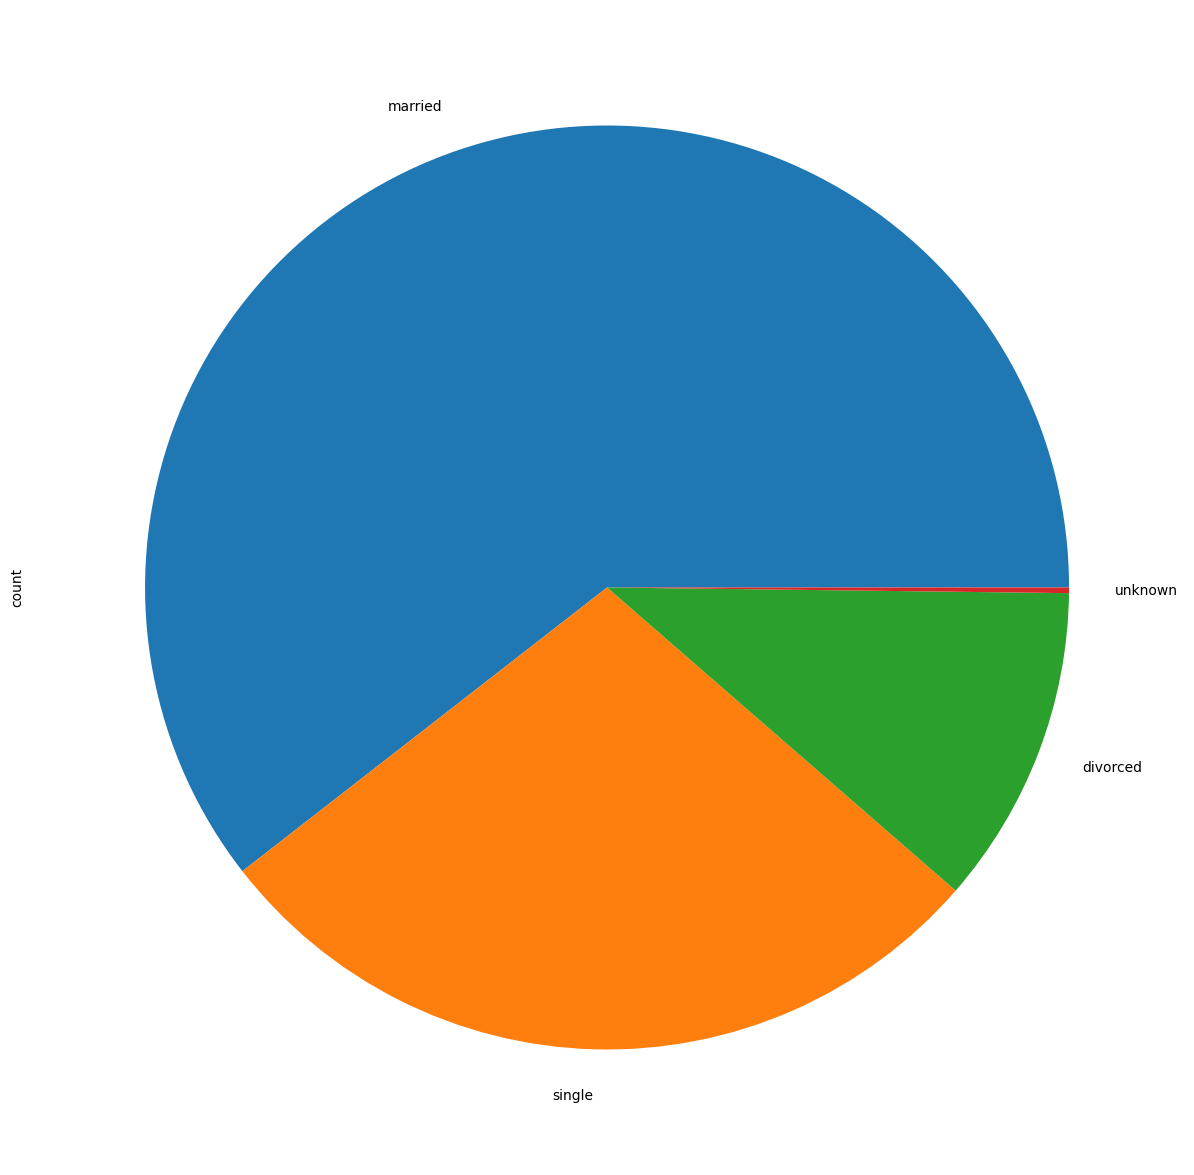

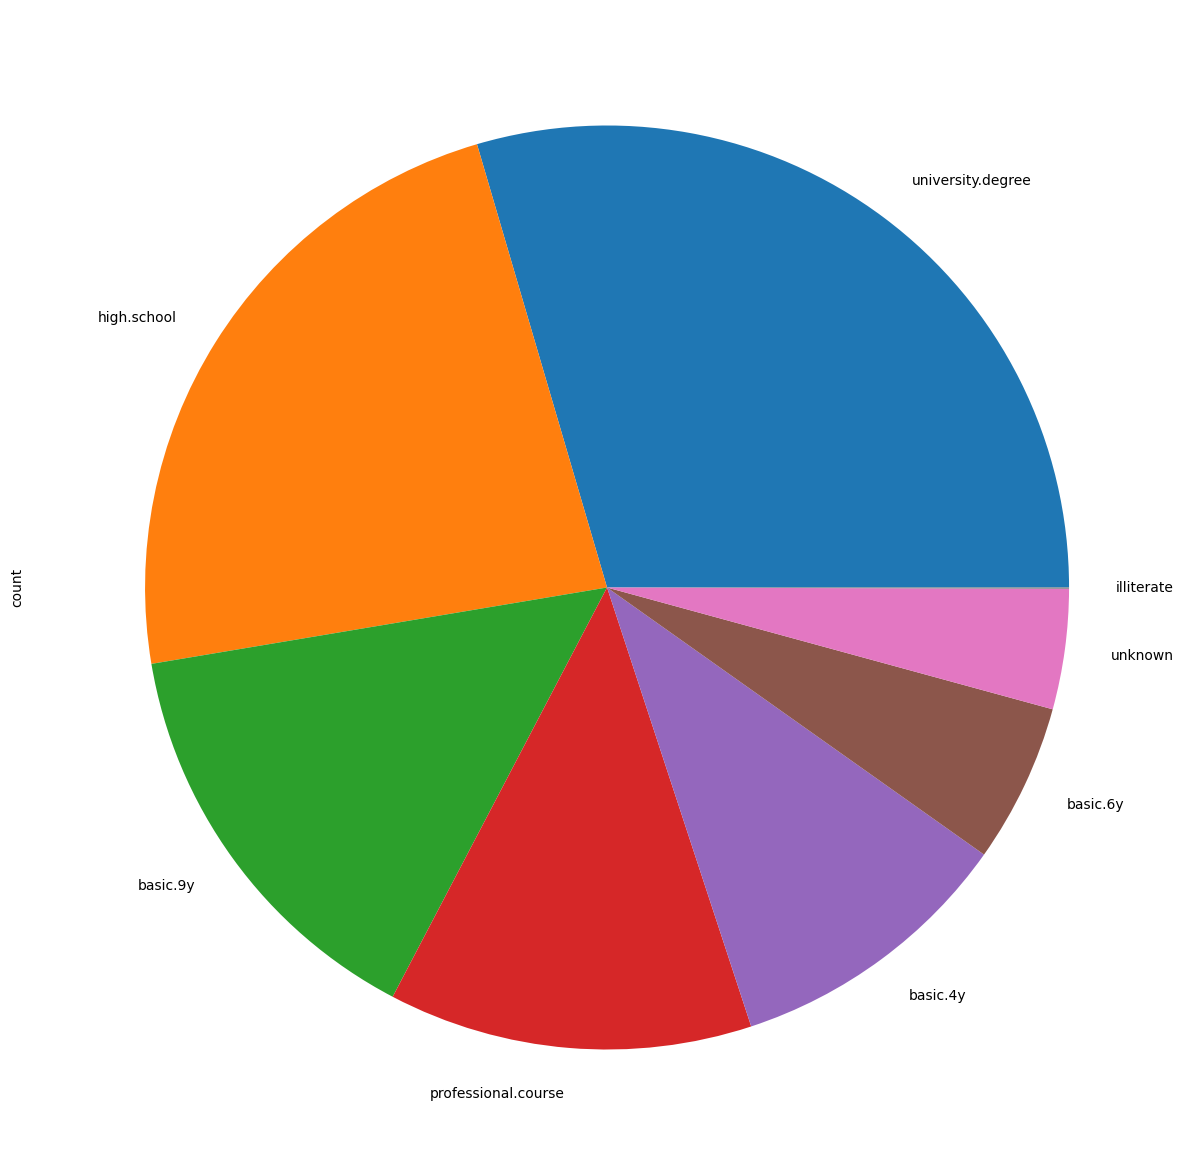

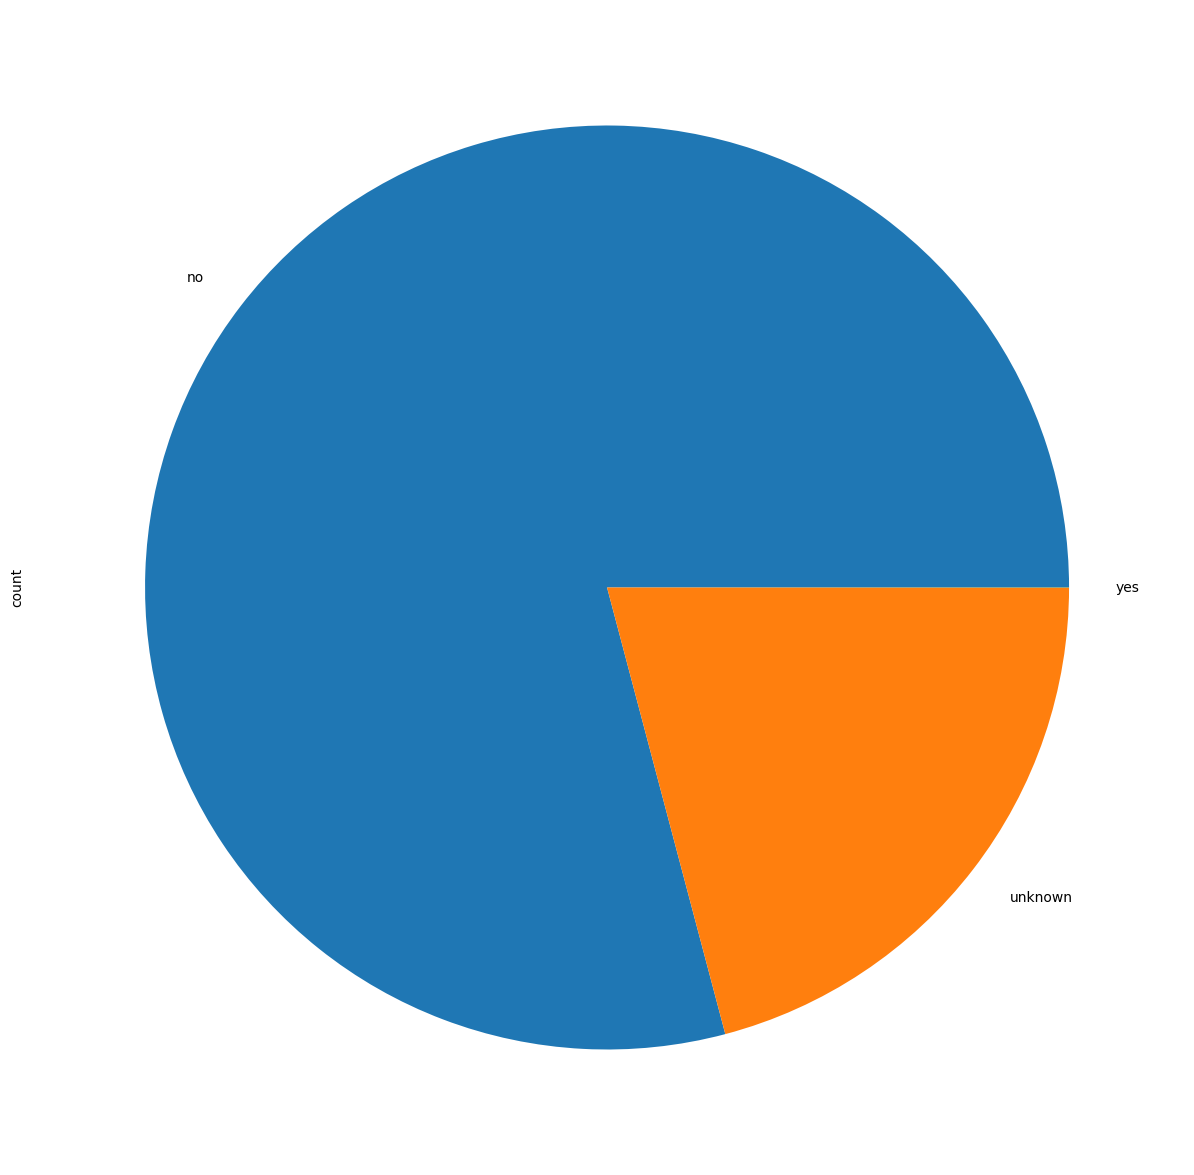

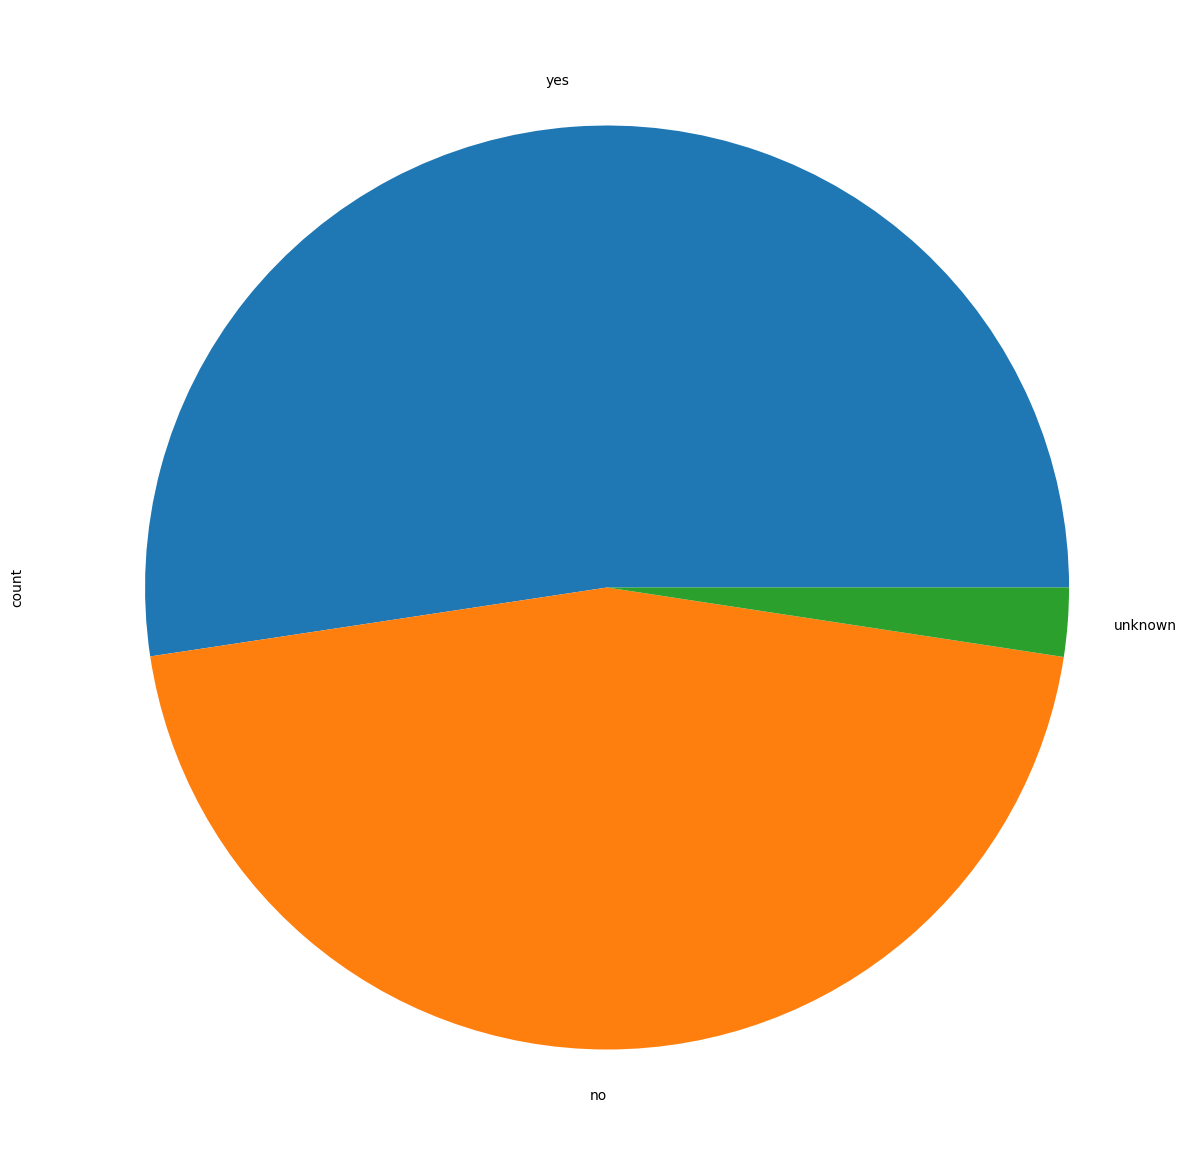

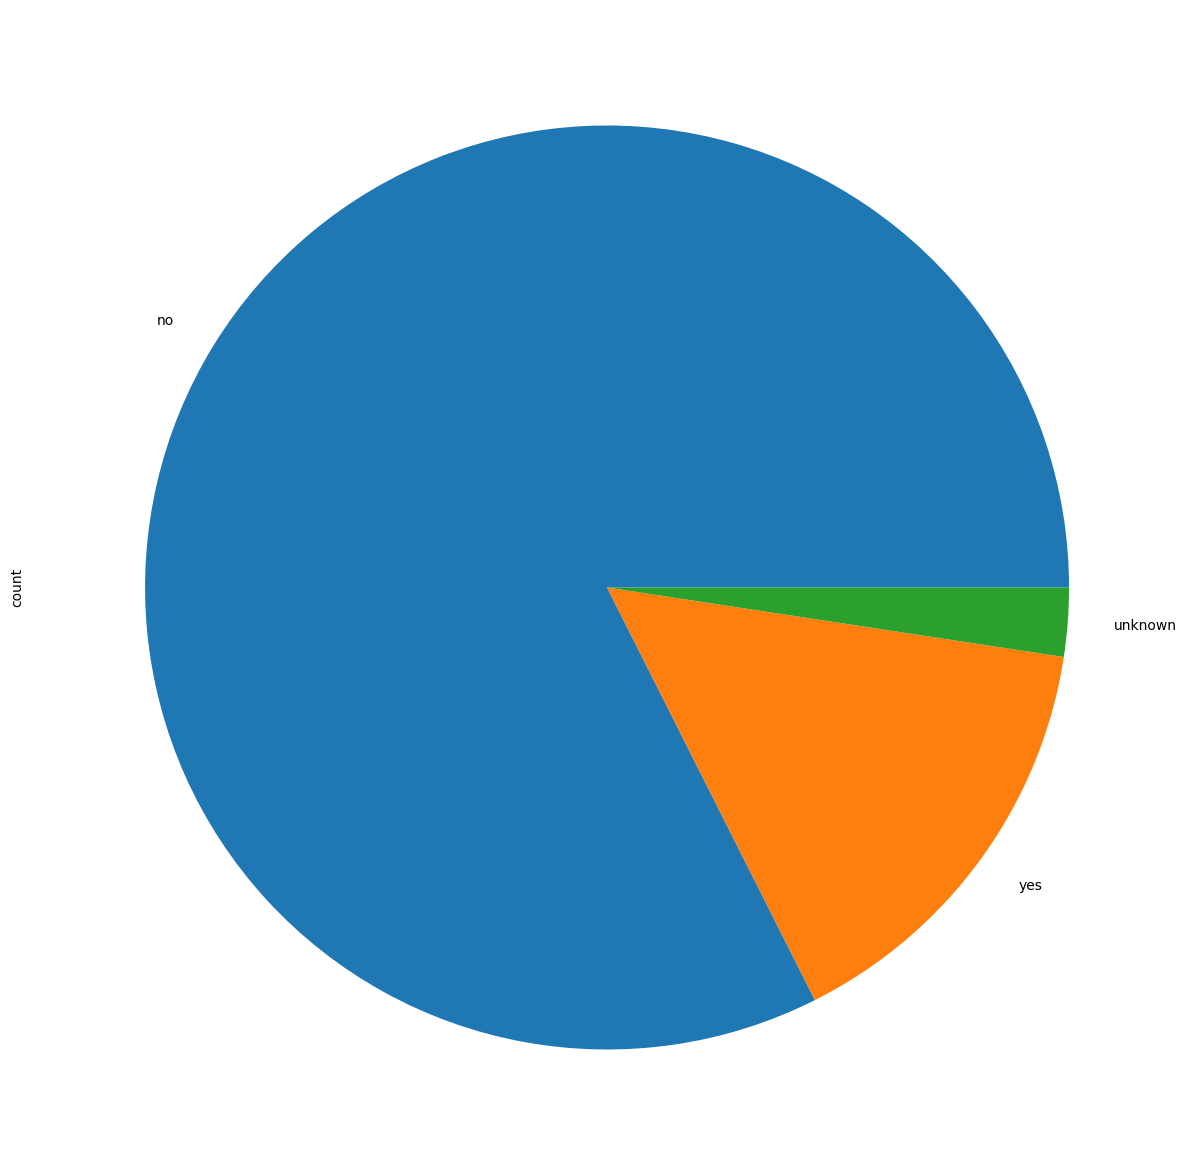

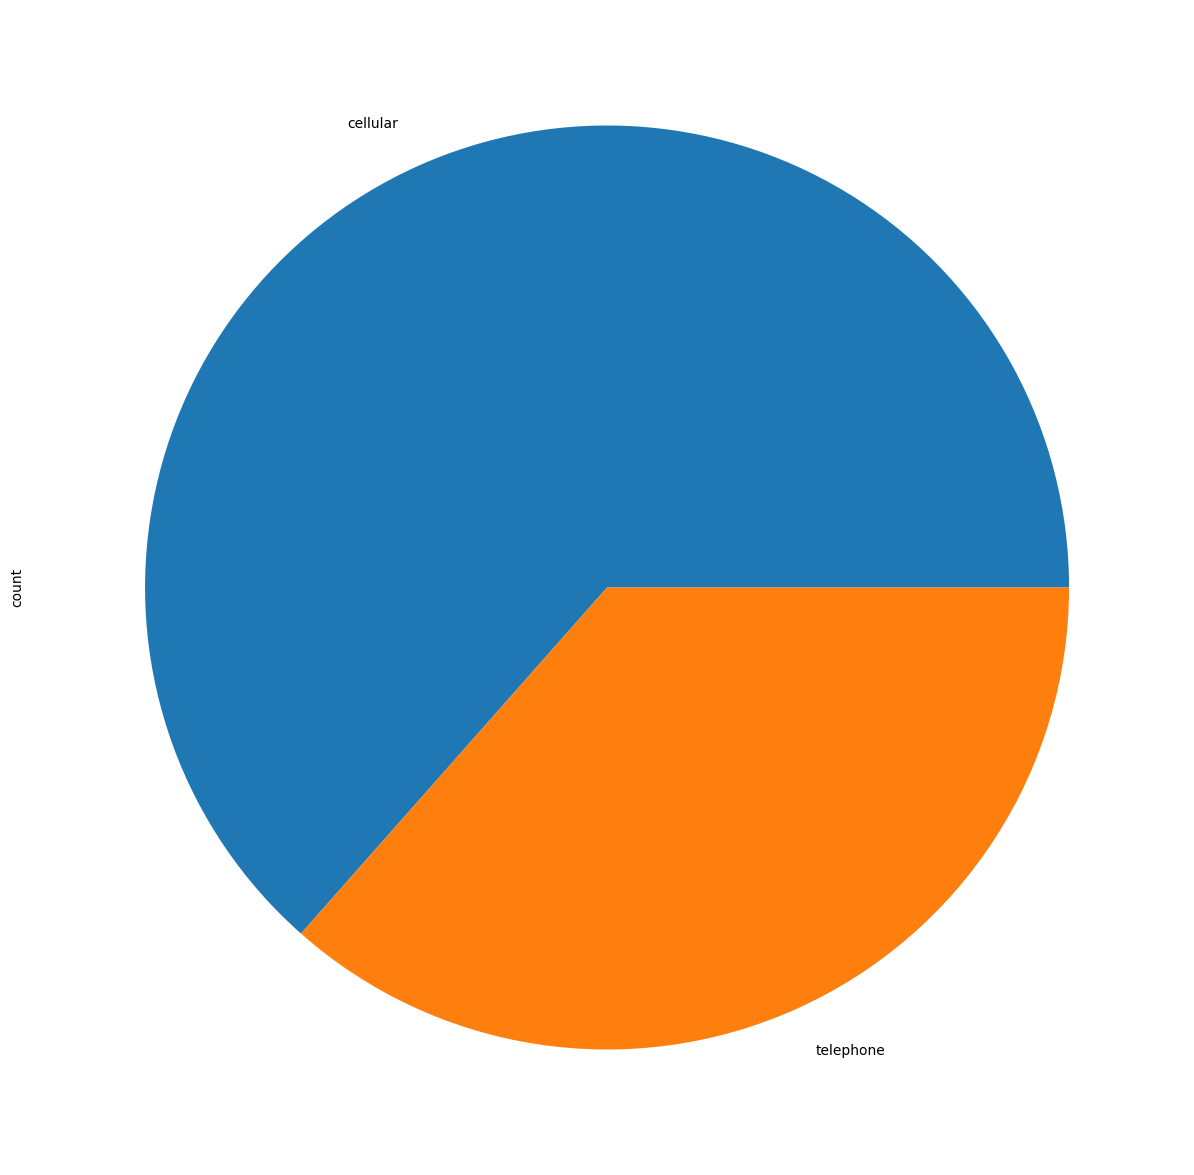

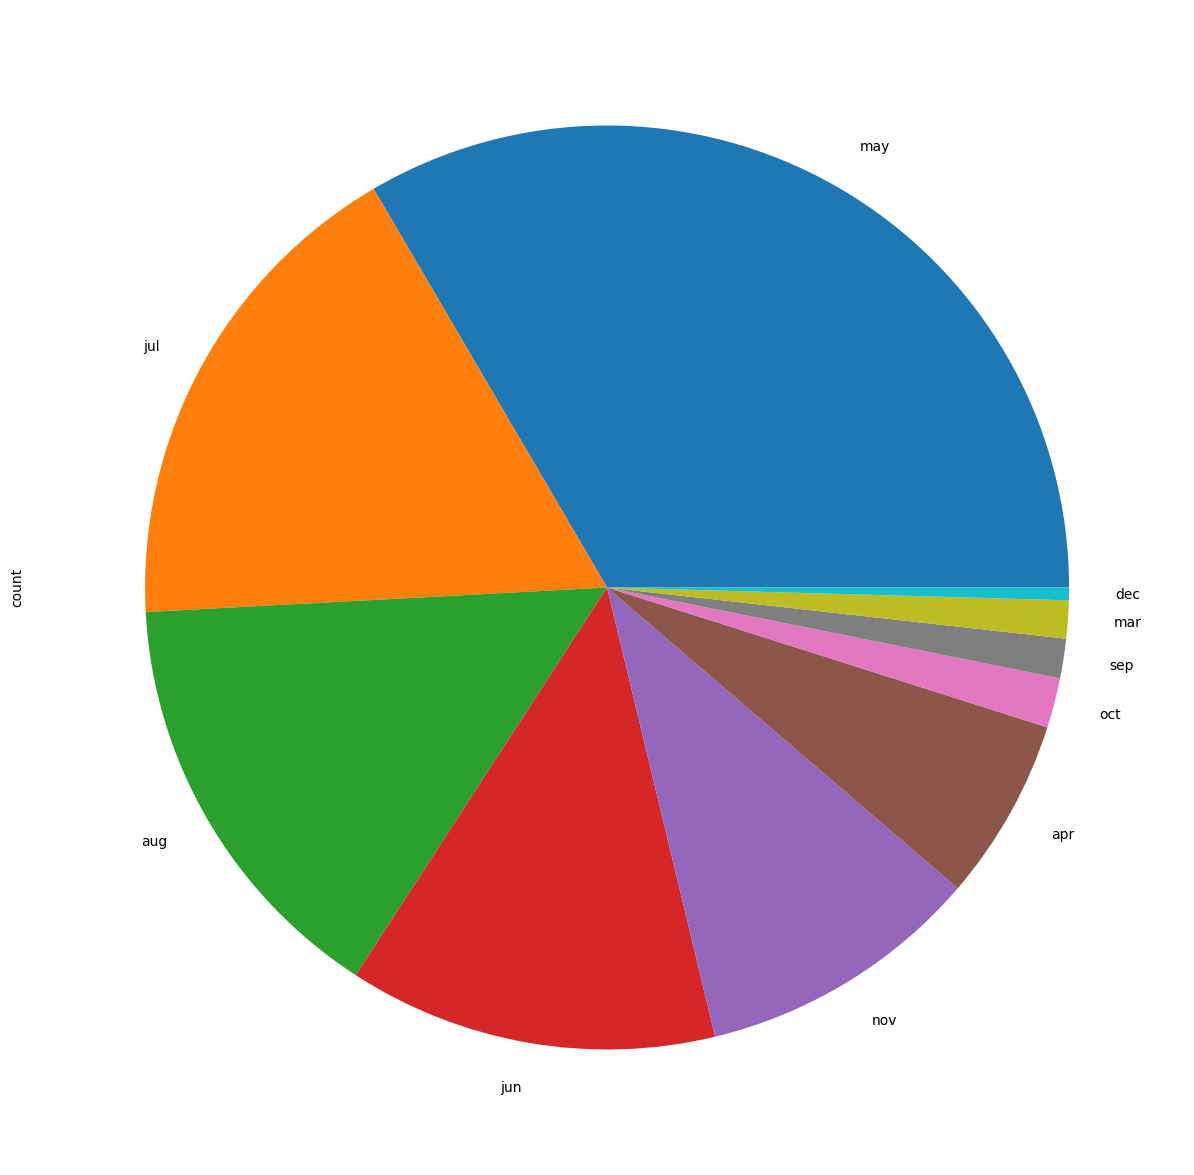

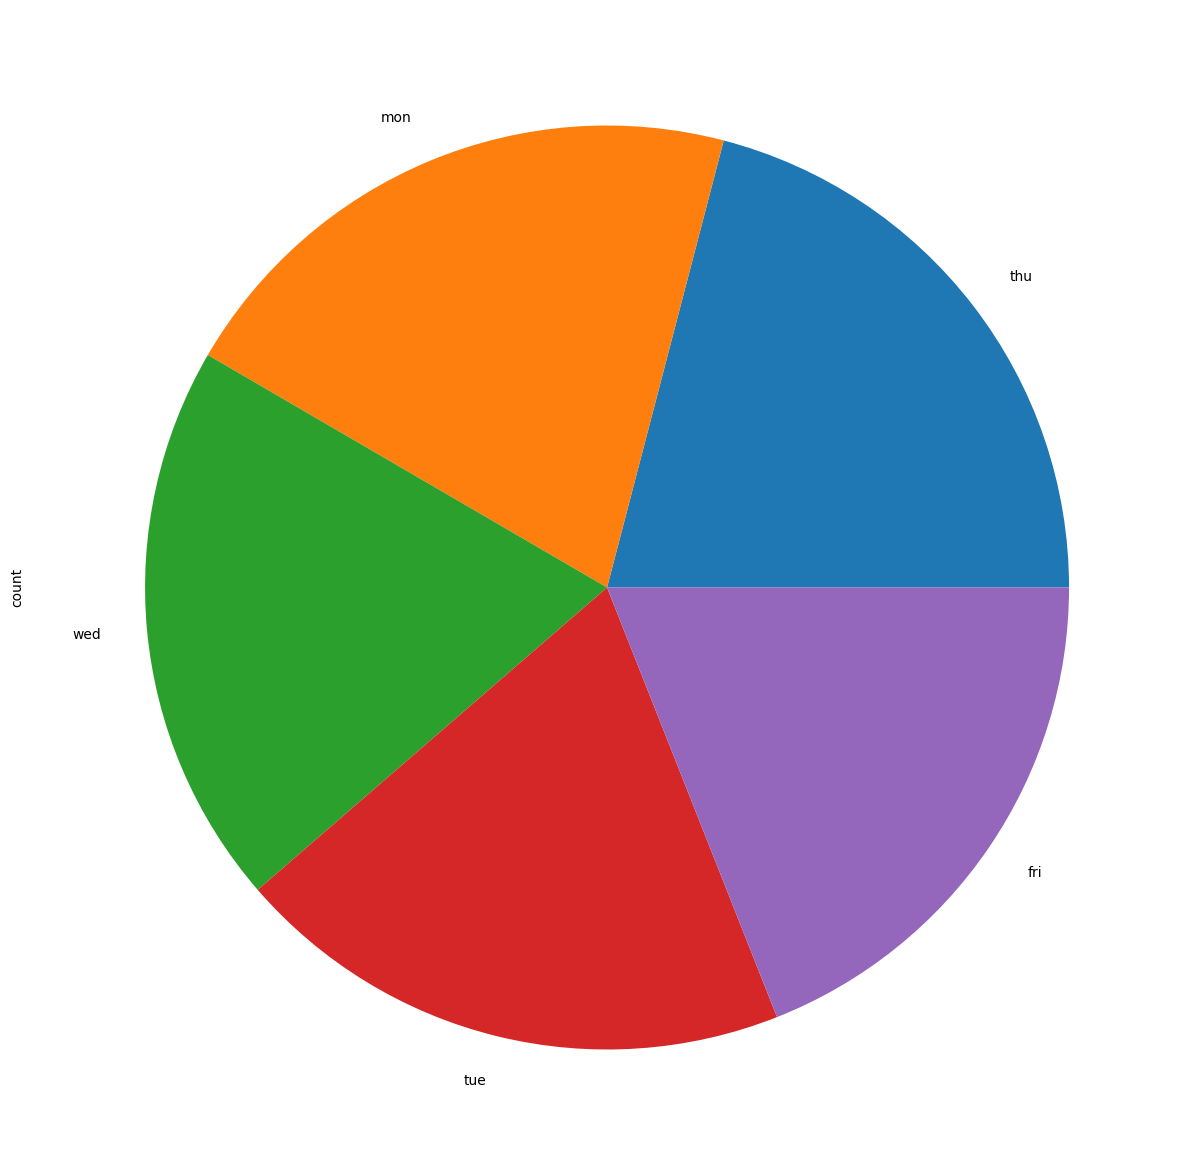

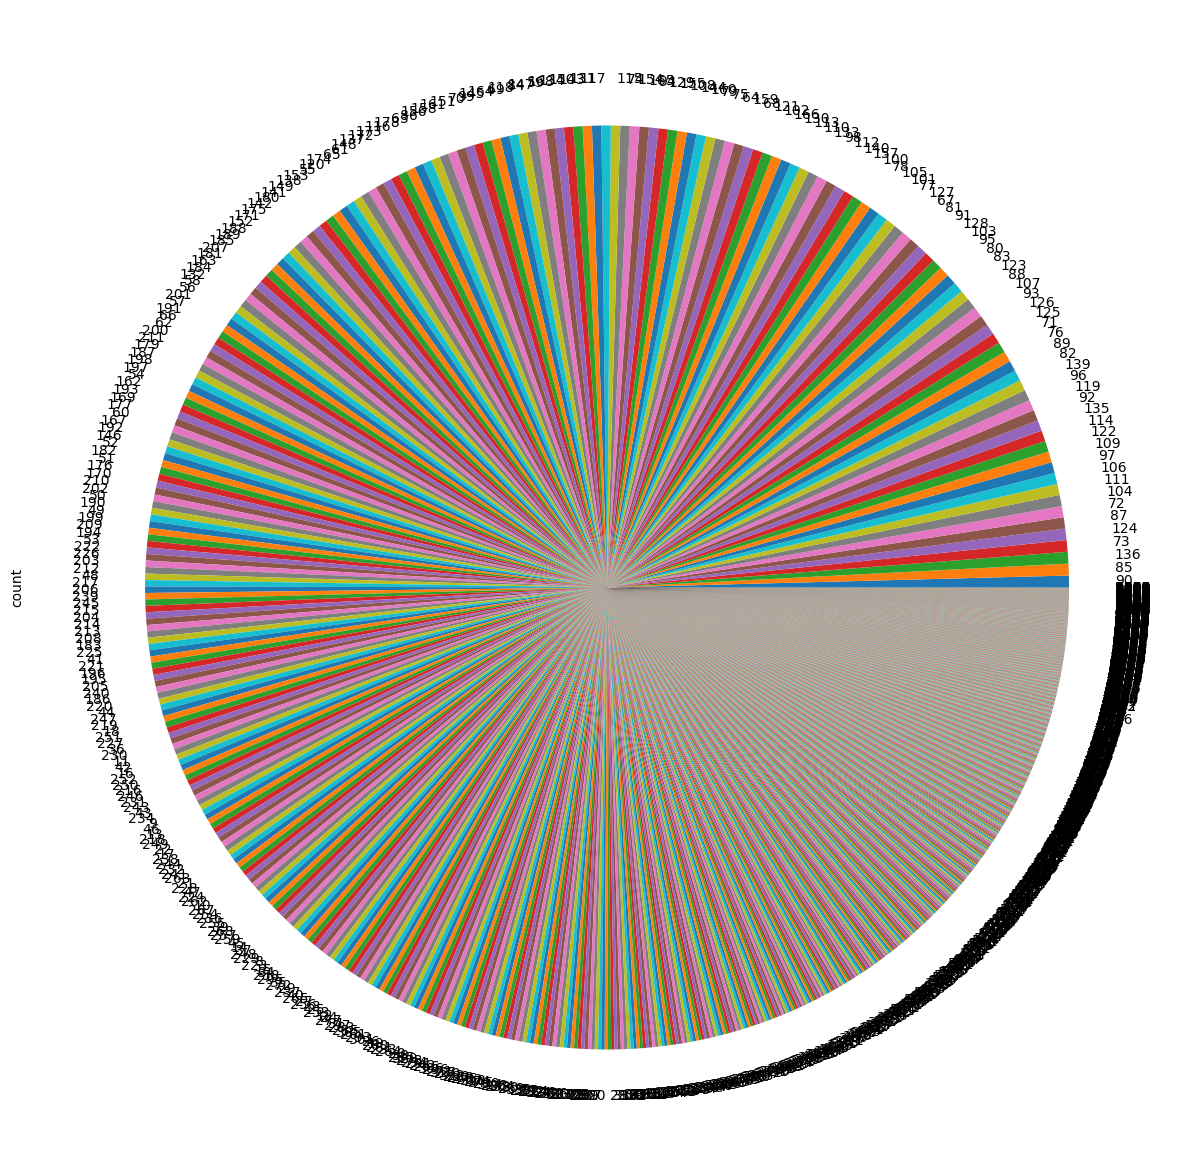

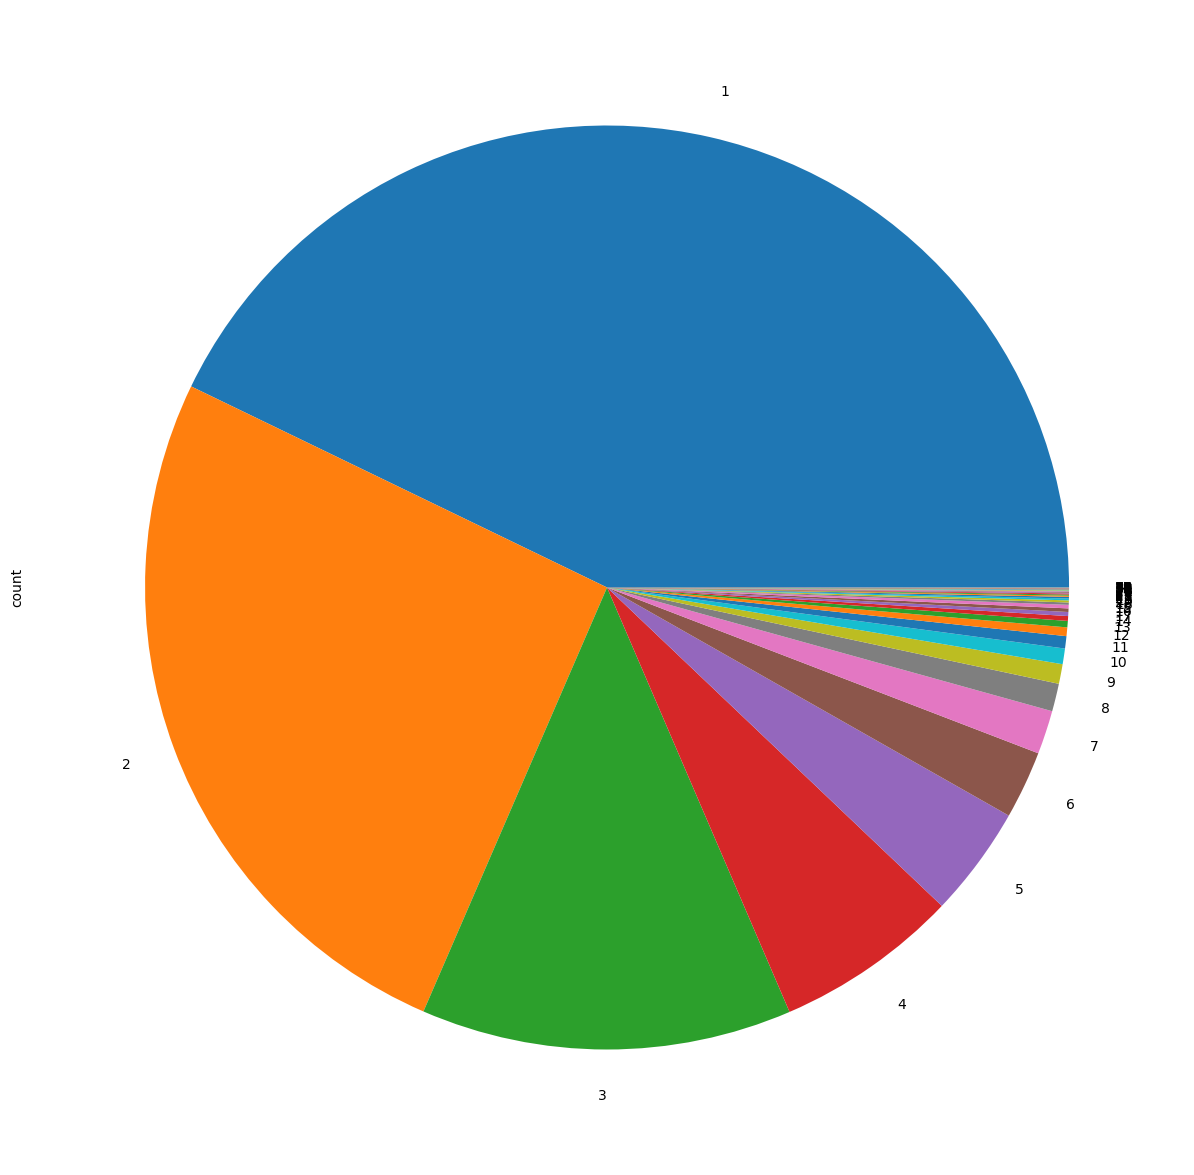

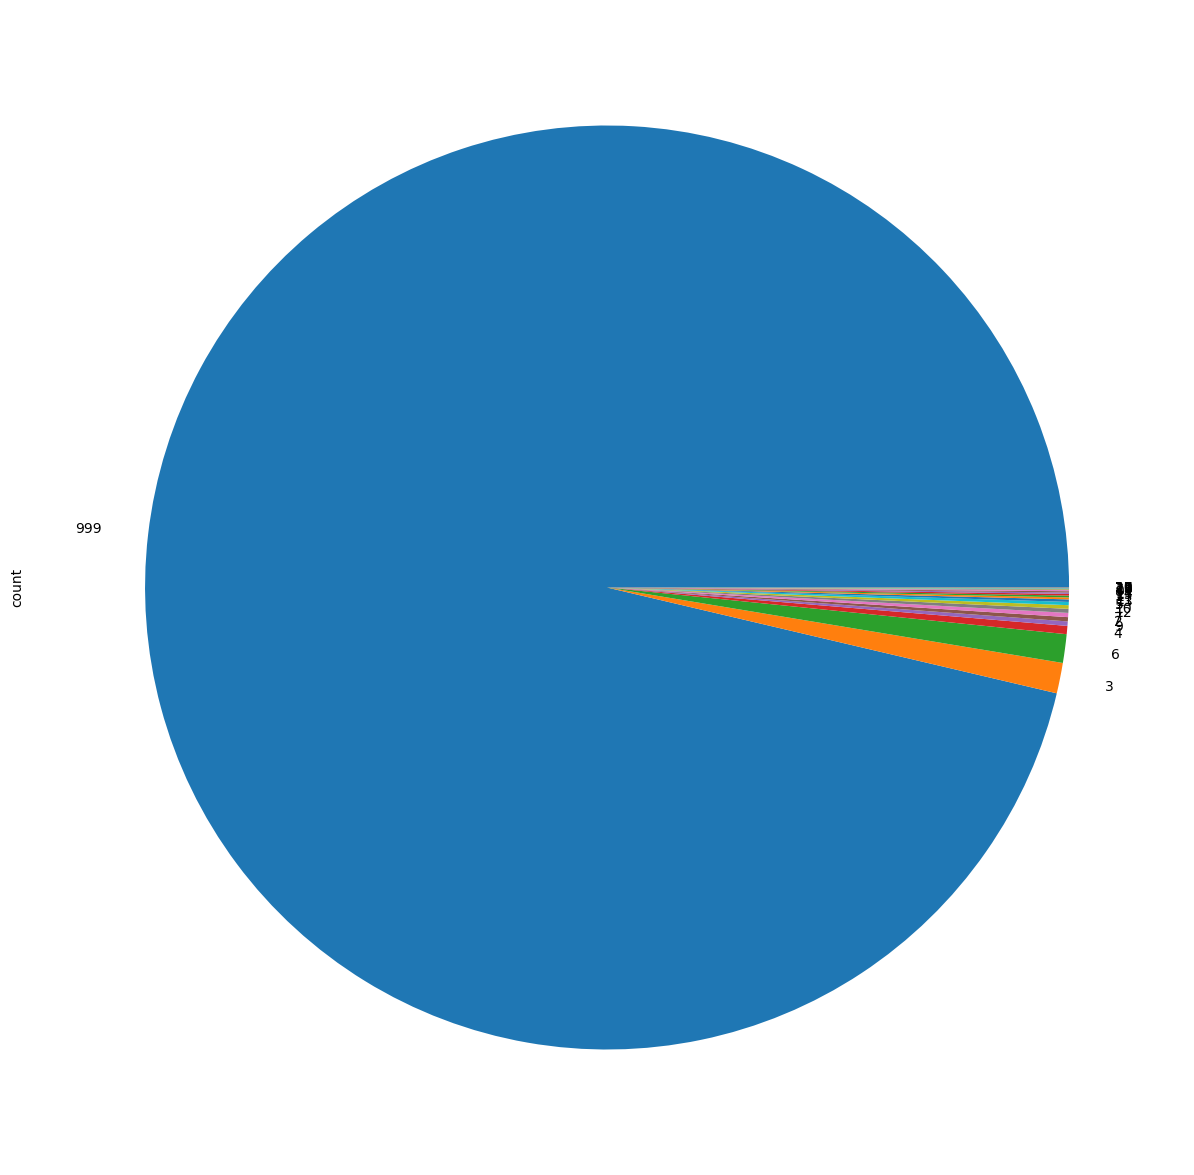

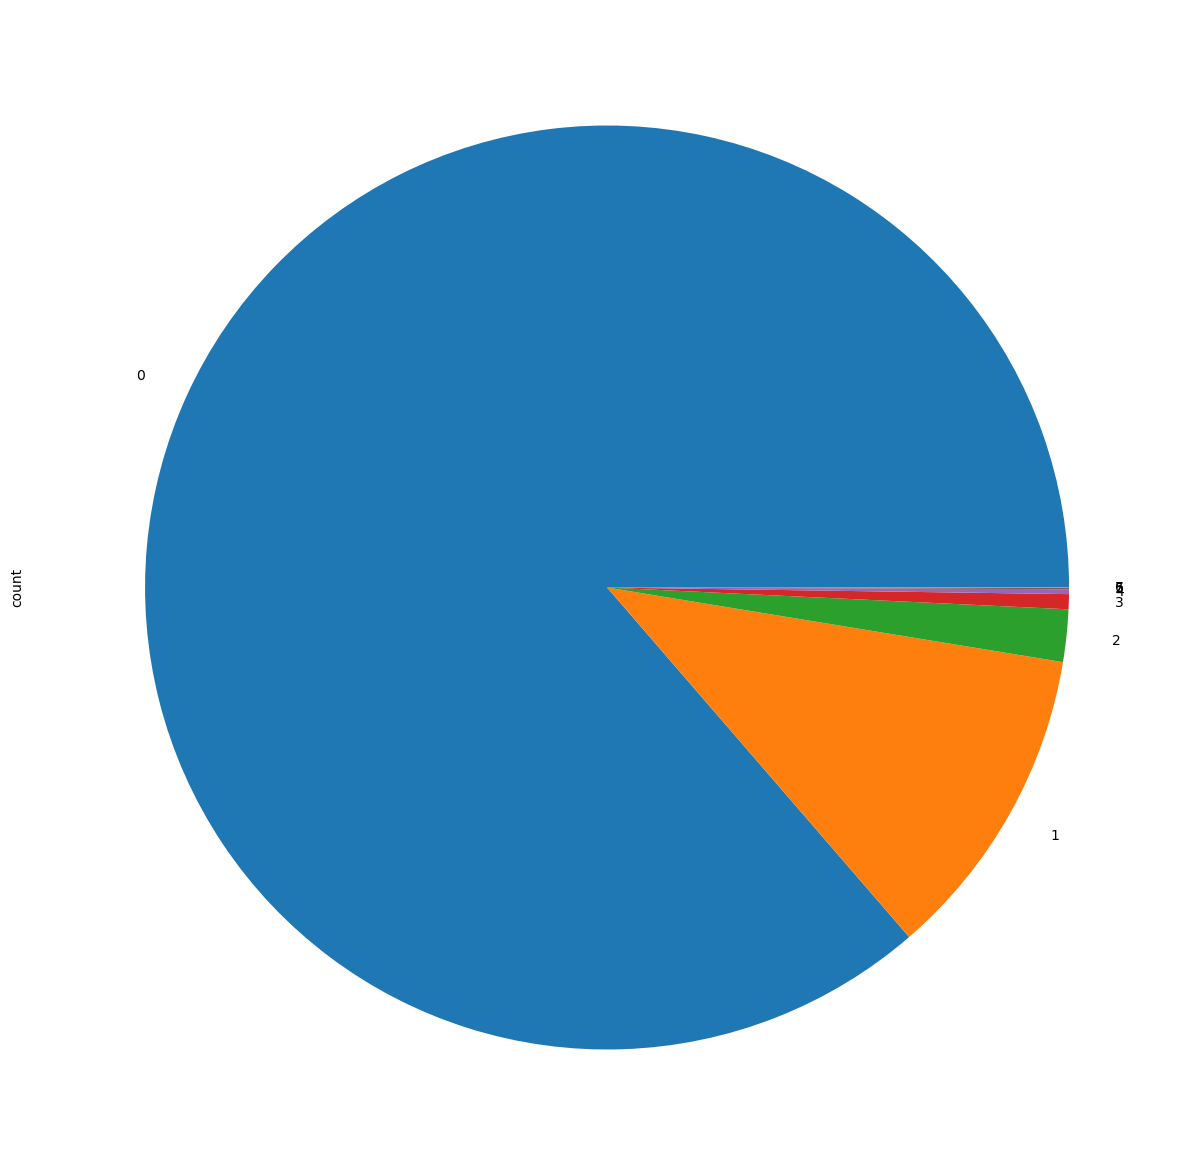

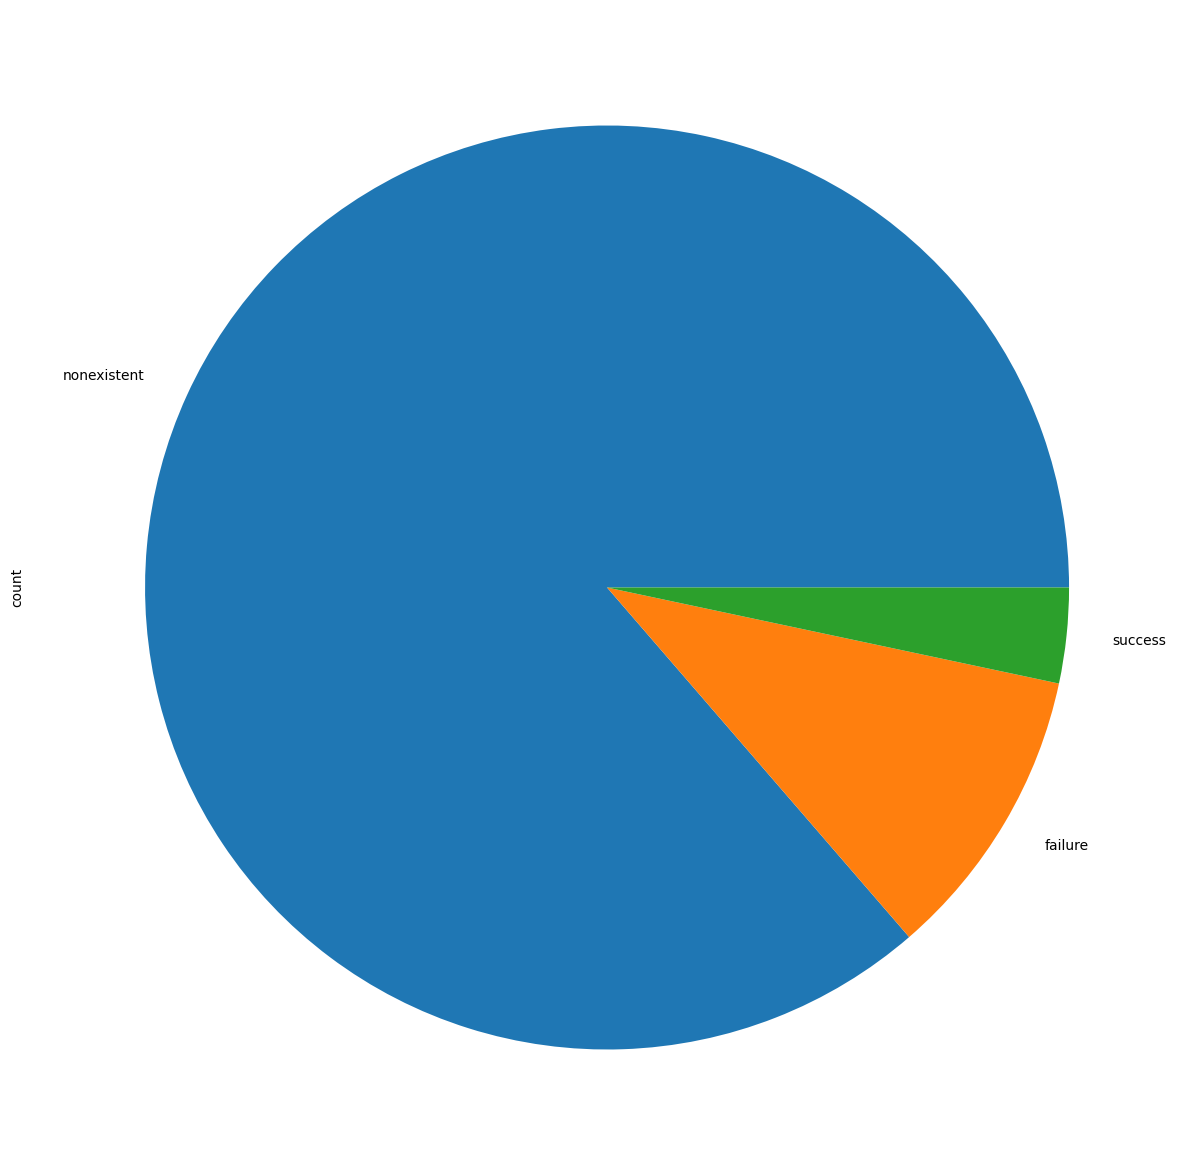

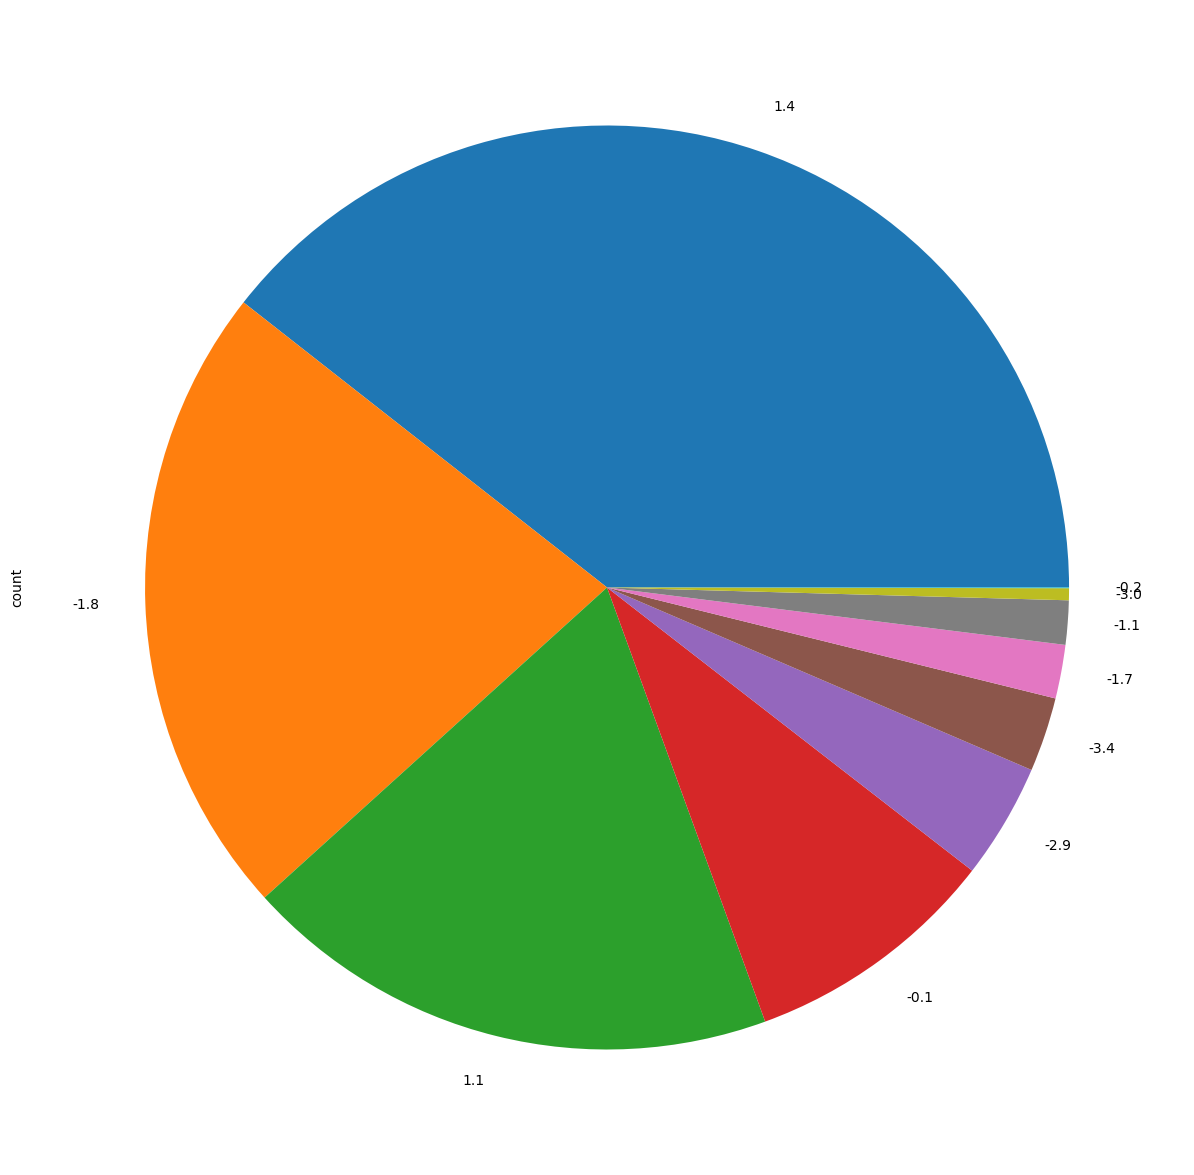

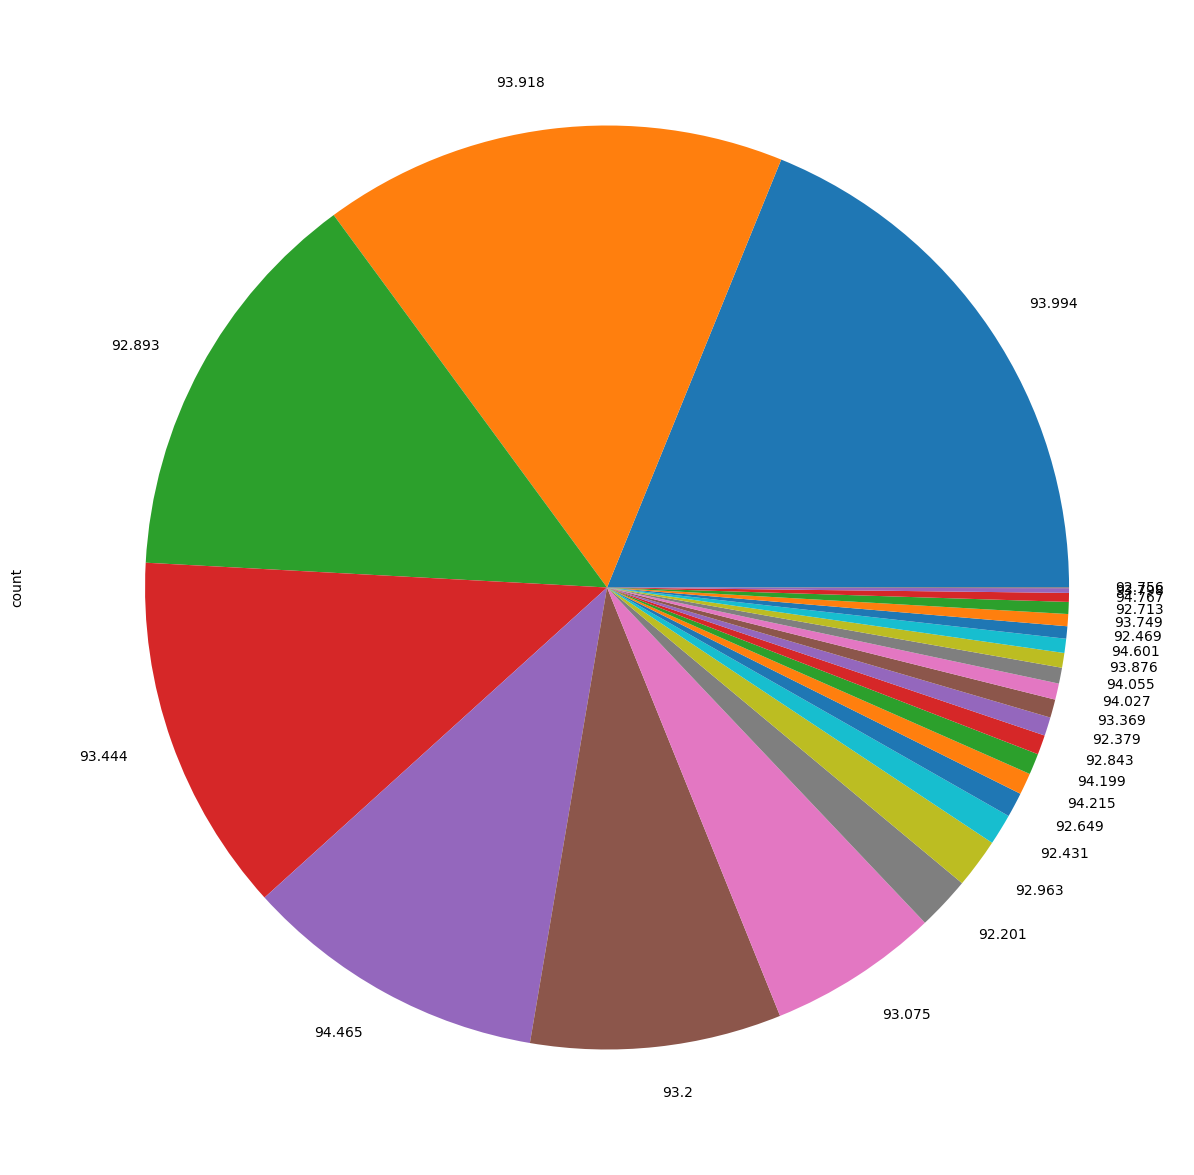

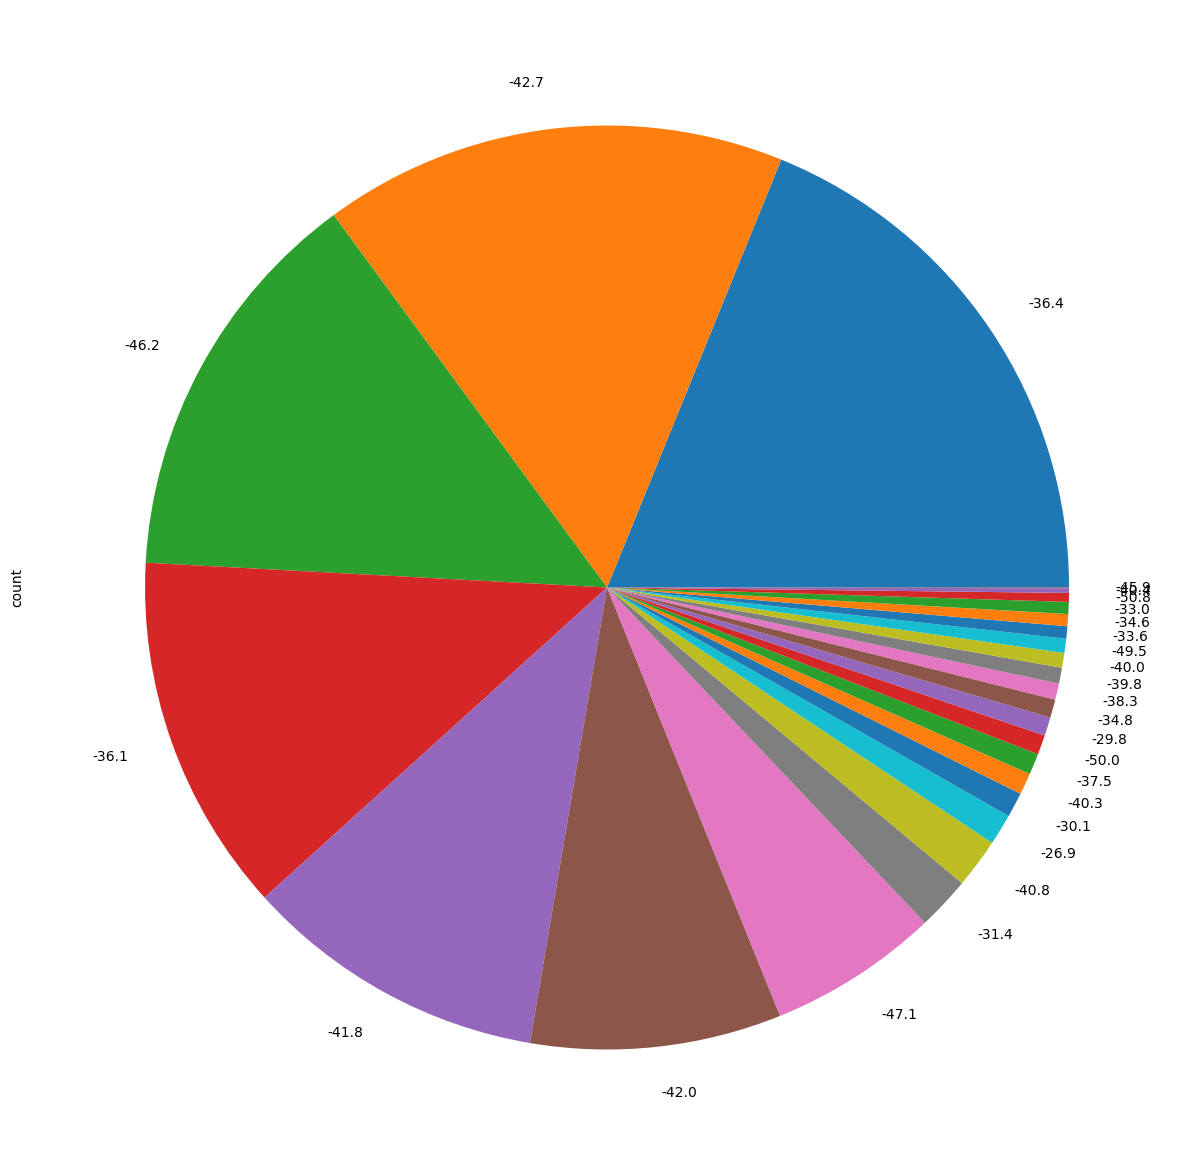

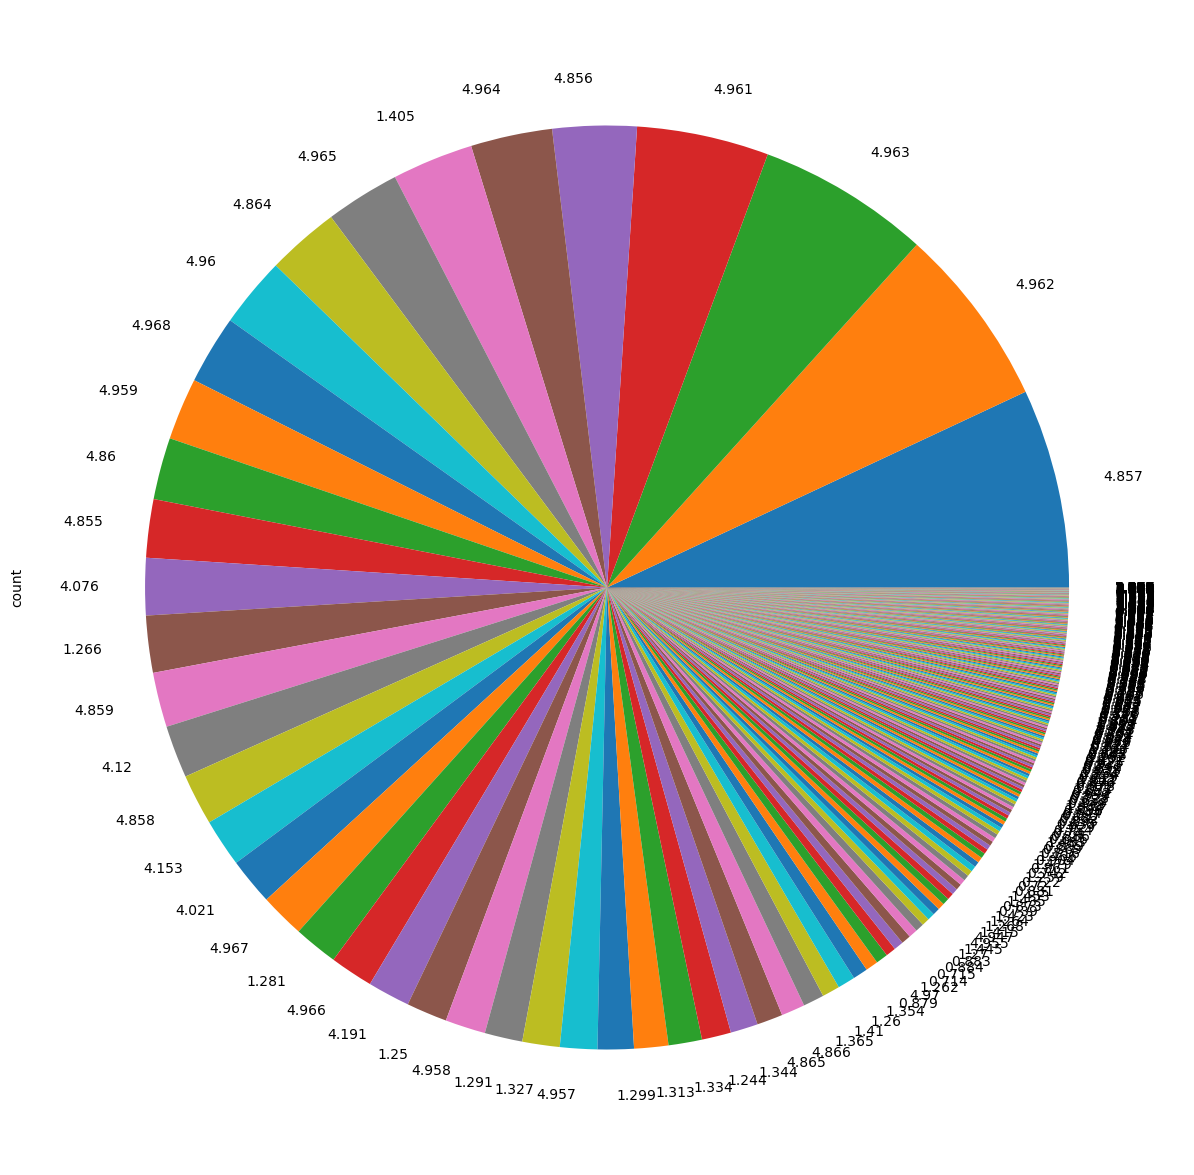

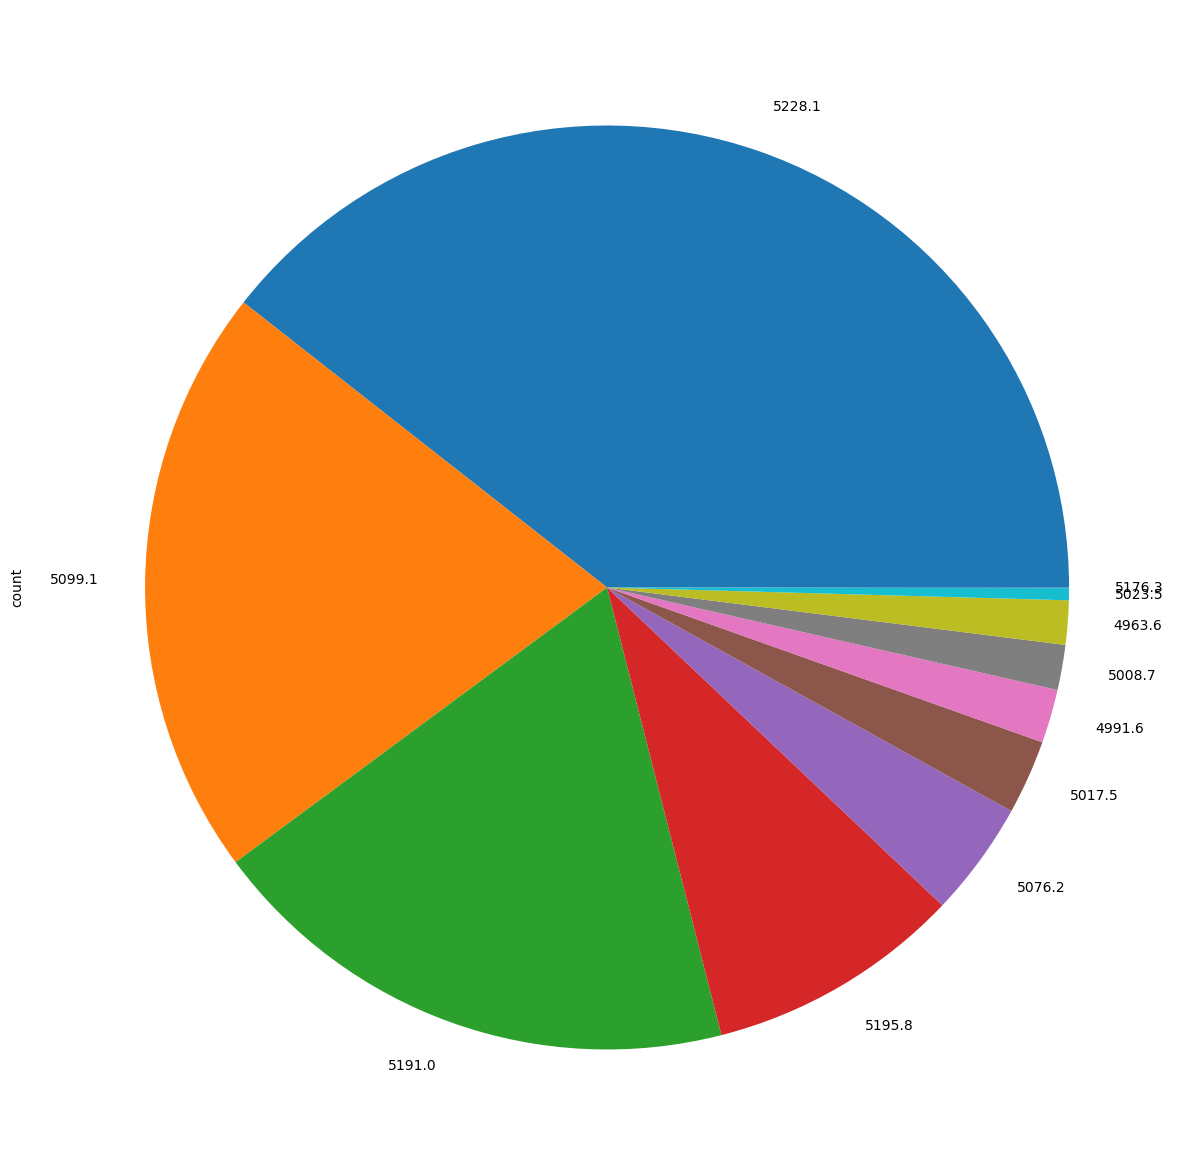

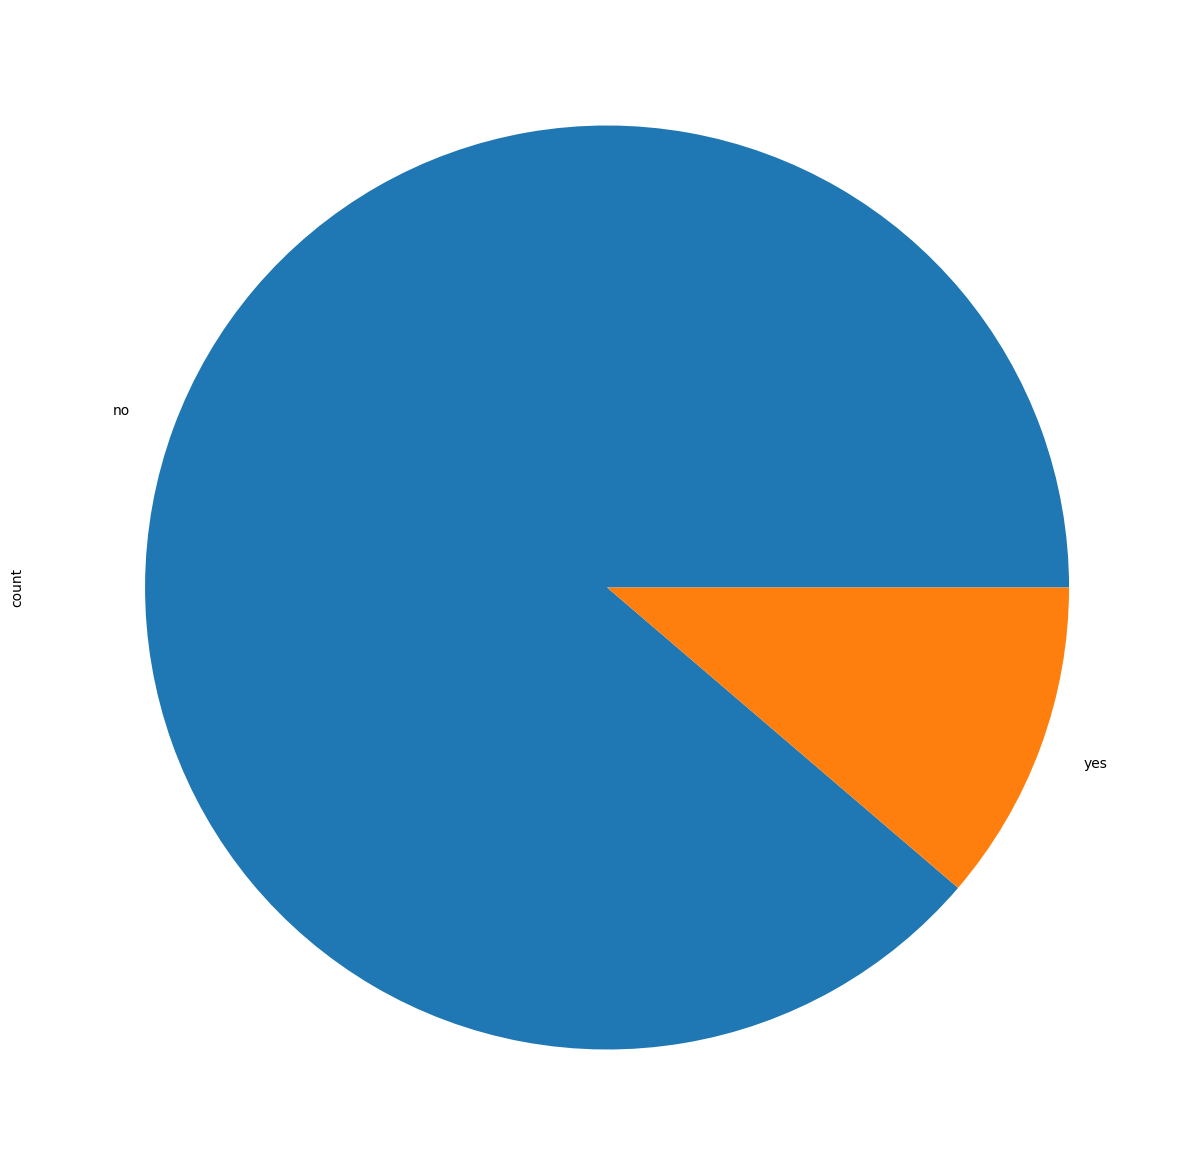

In [53]:
for col in data.columns:
    plt.figure(figsize=(15,15))
    data[col].value_counts().plot.pie()

C:\Users\iT\AppData\Local\Temp\ipykernel_17192\3774858636.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(15,10))


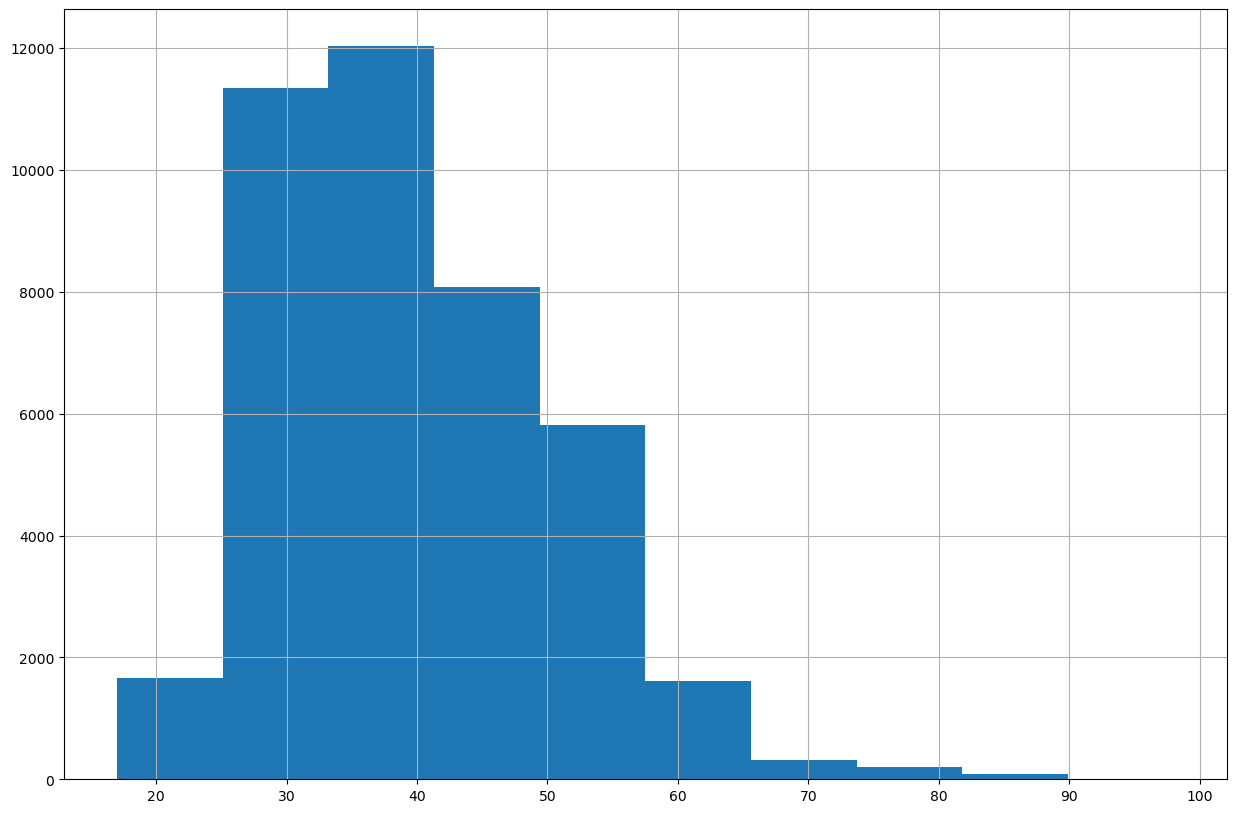

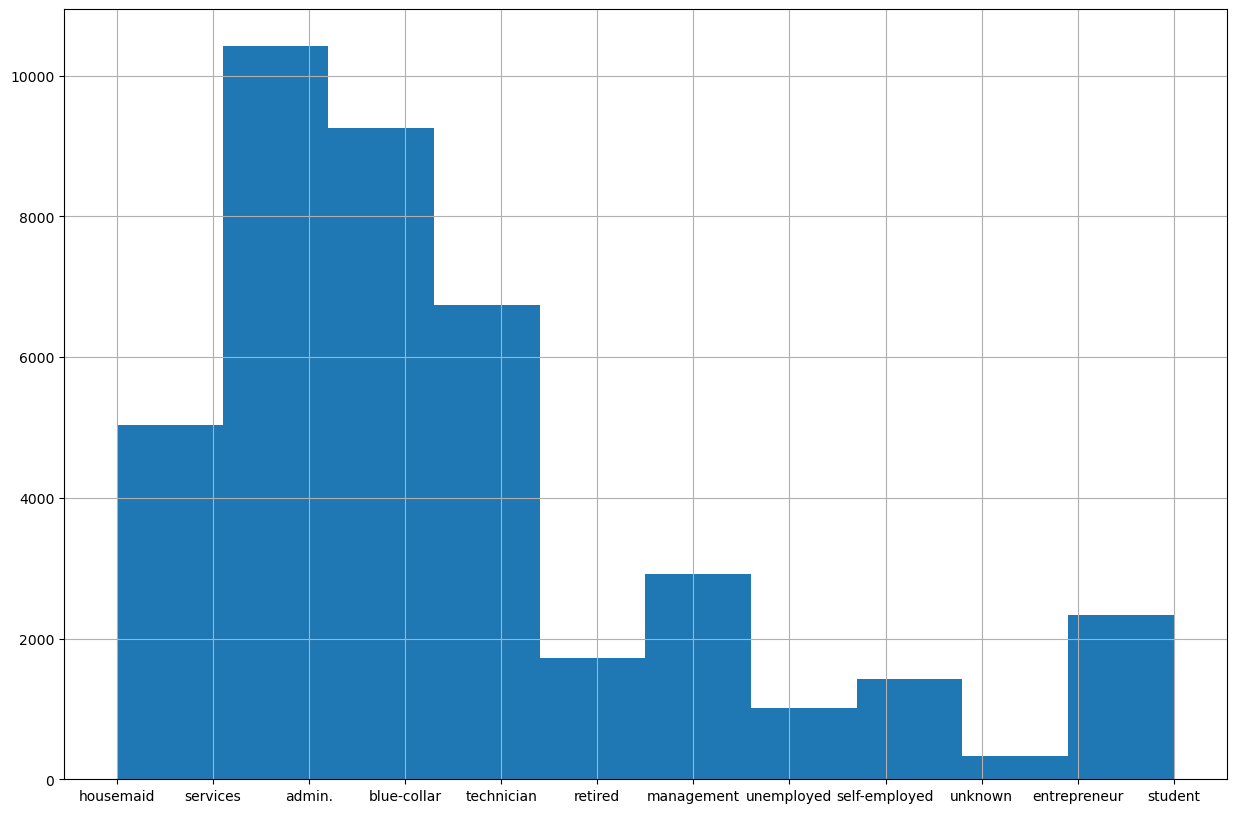

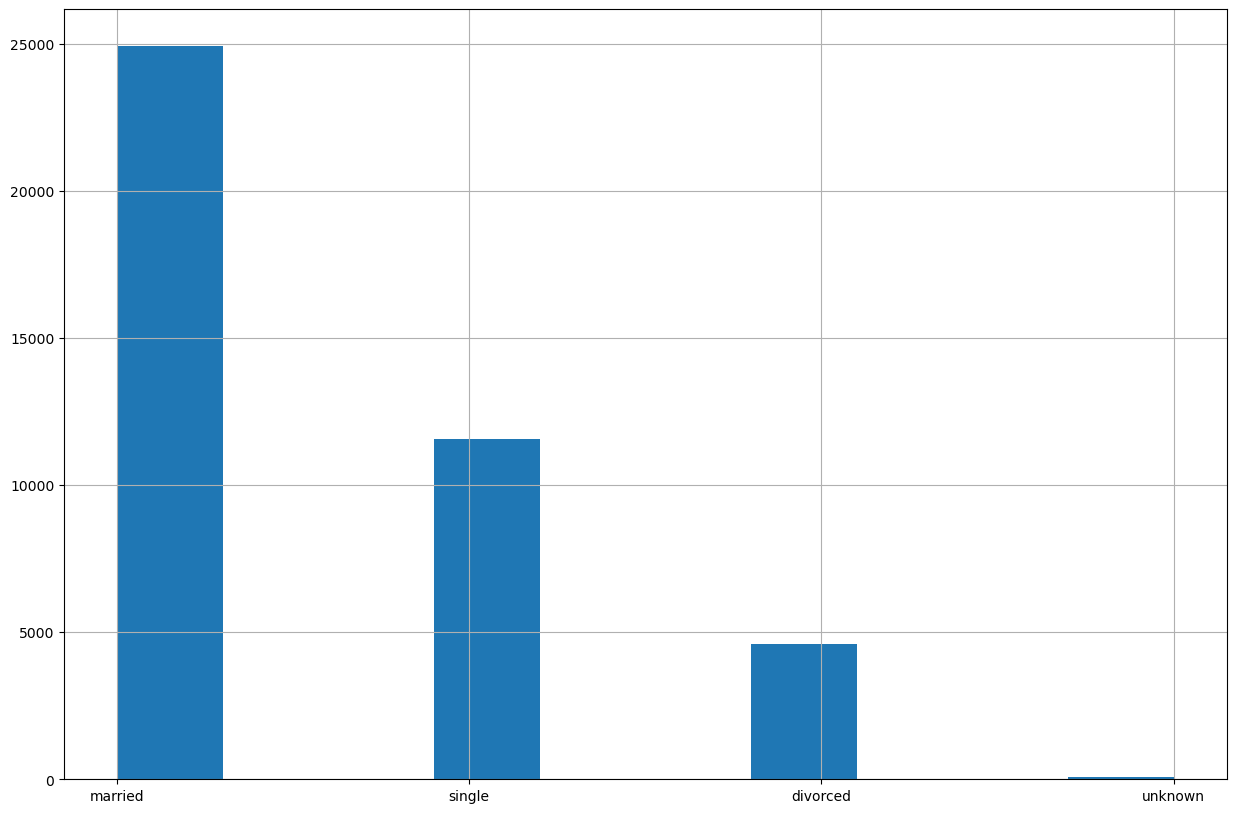

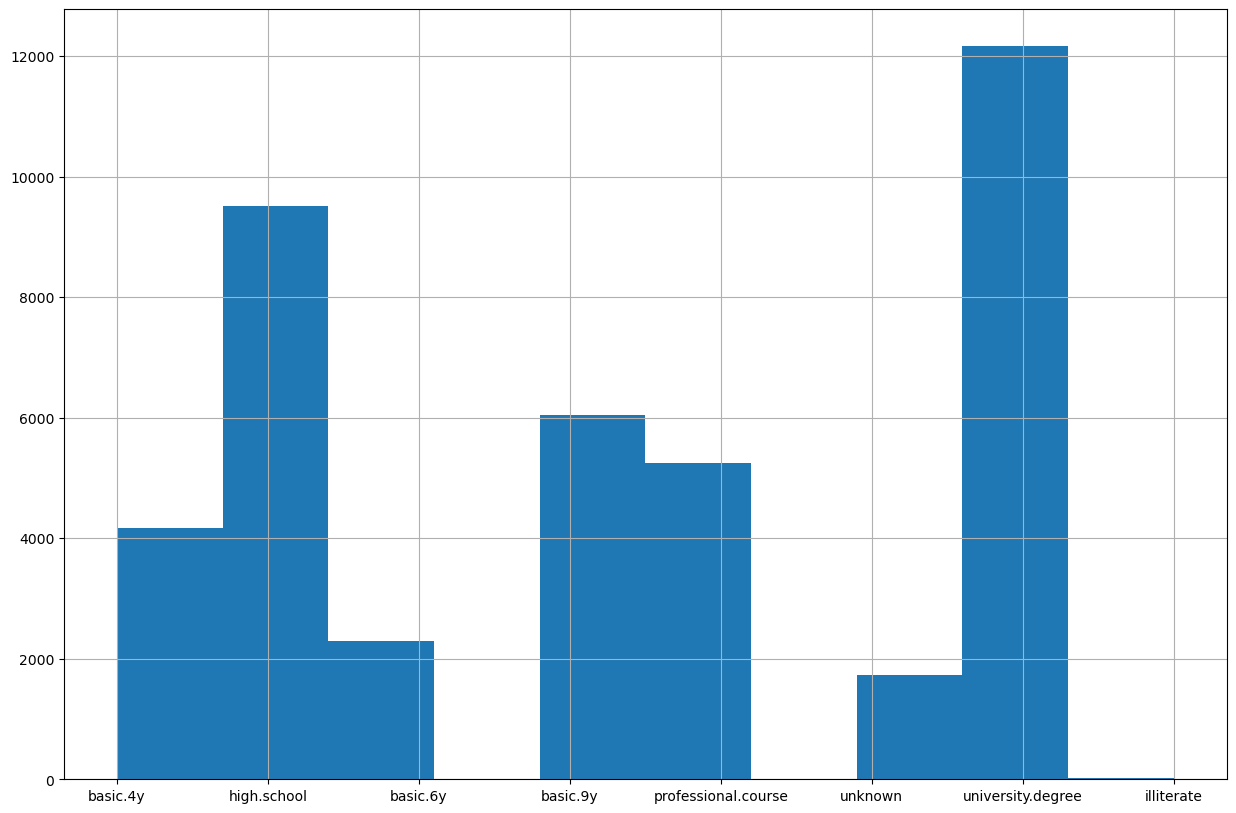

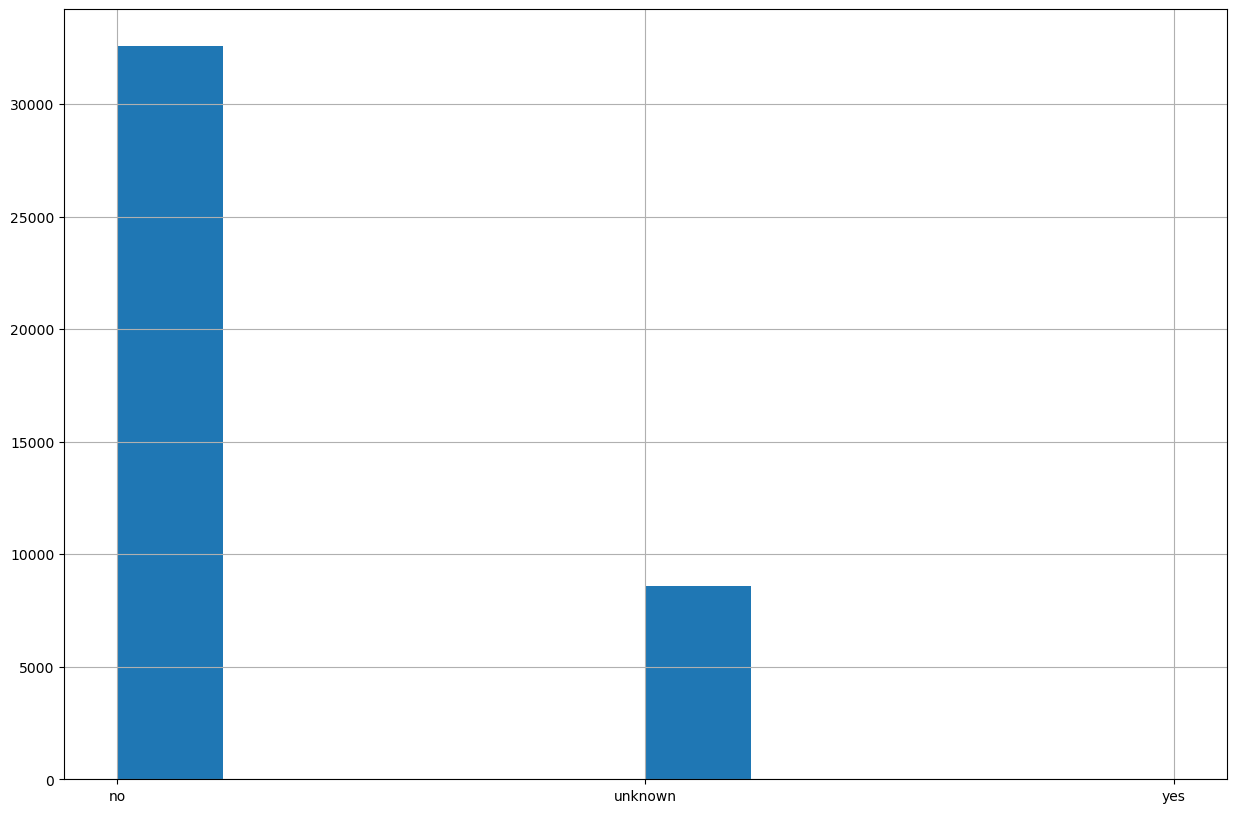

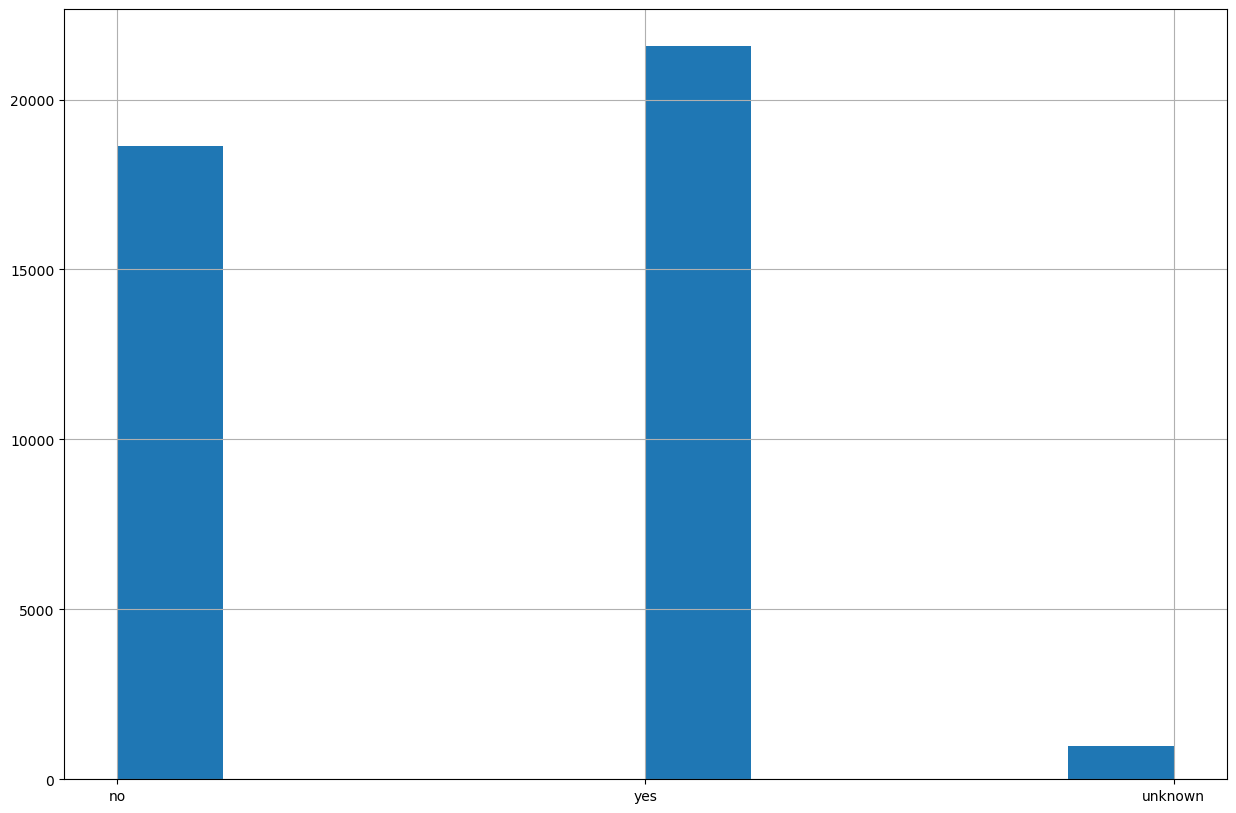

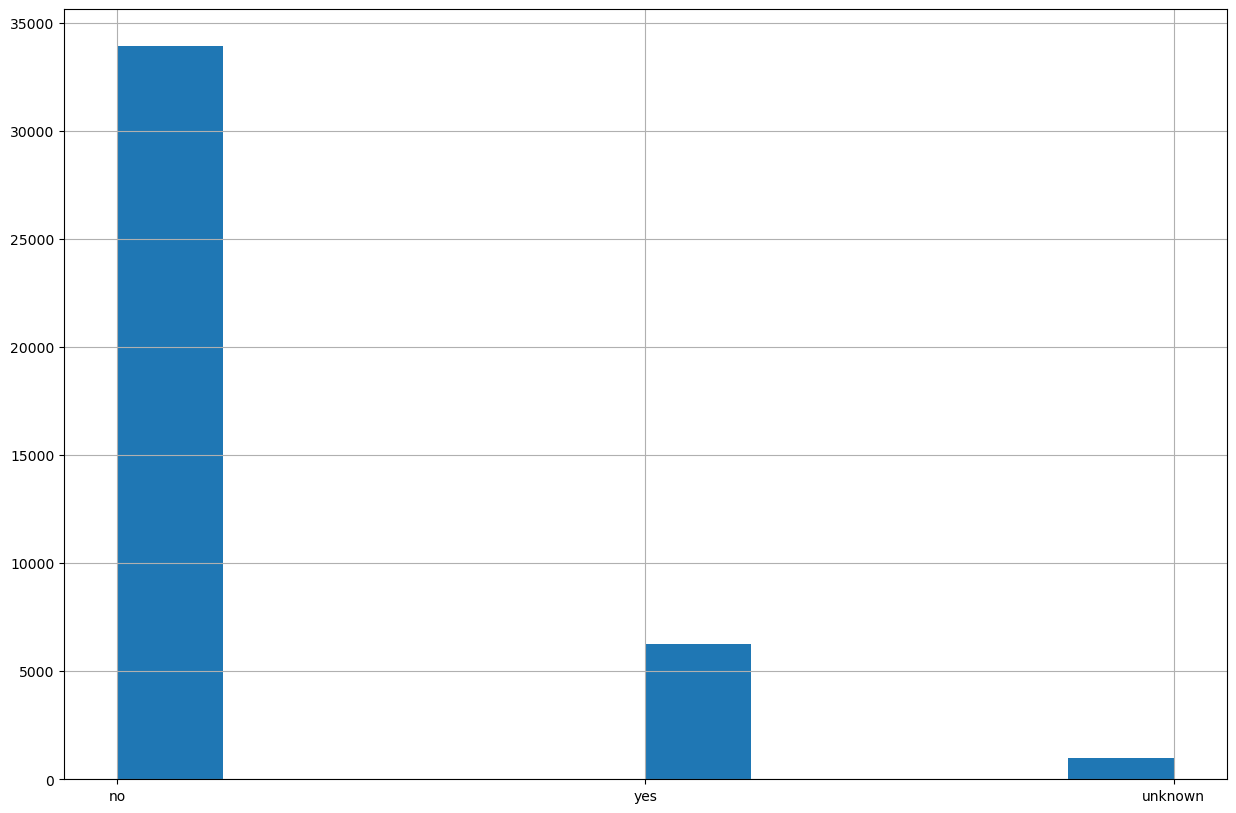

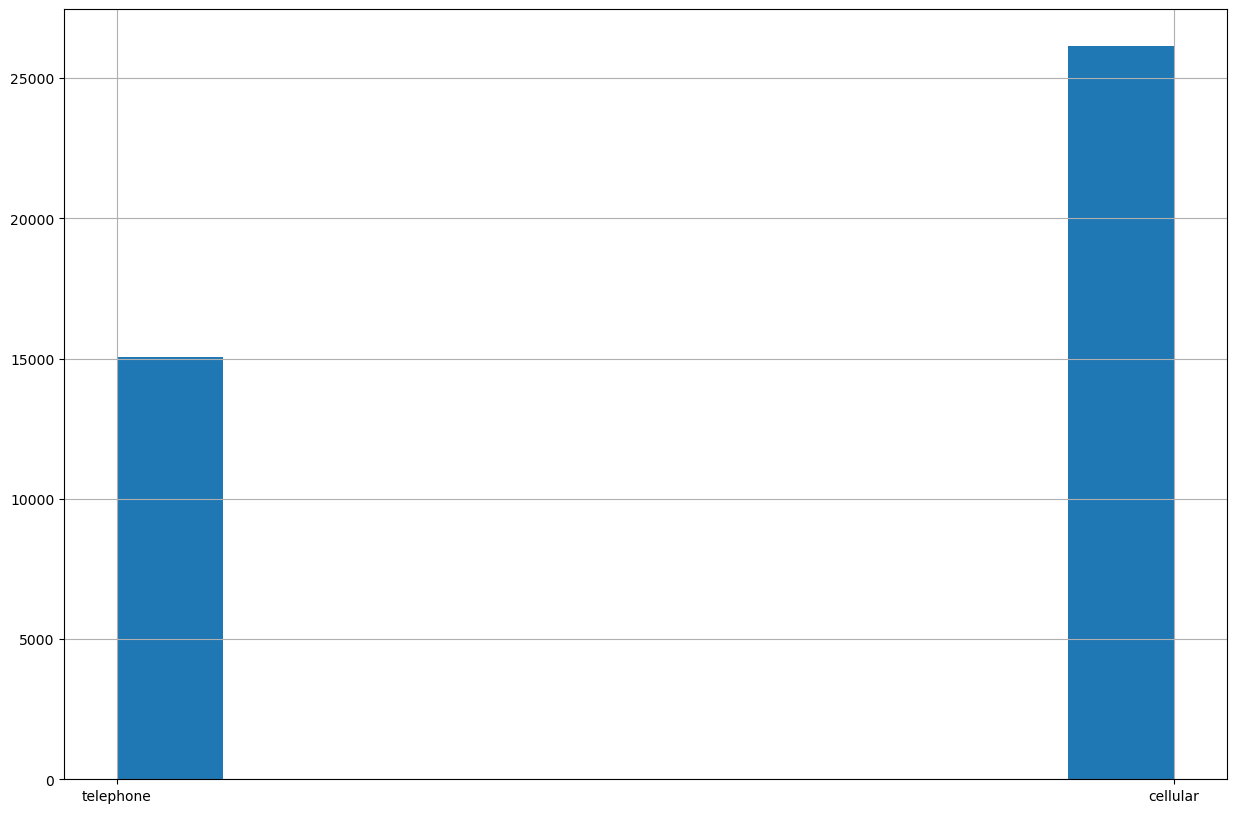

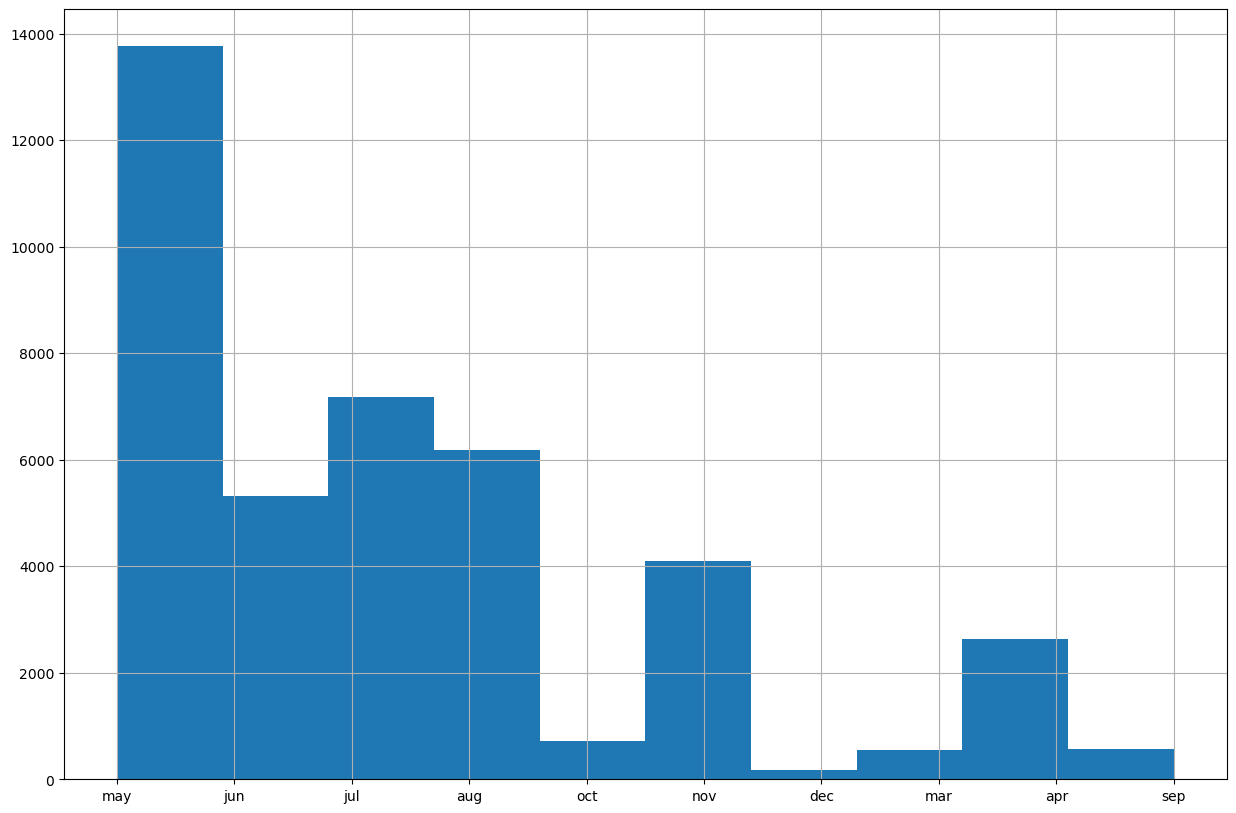

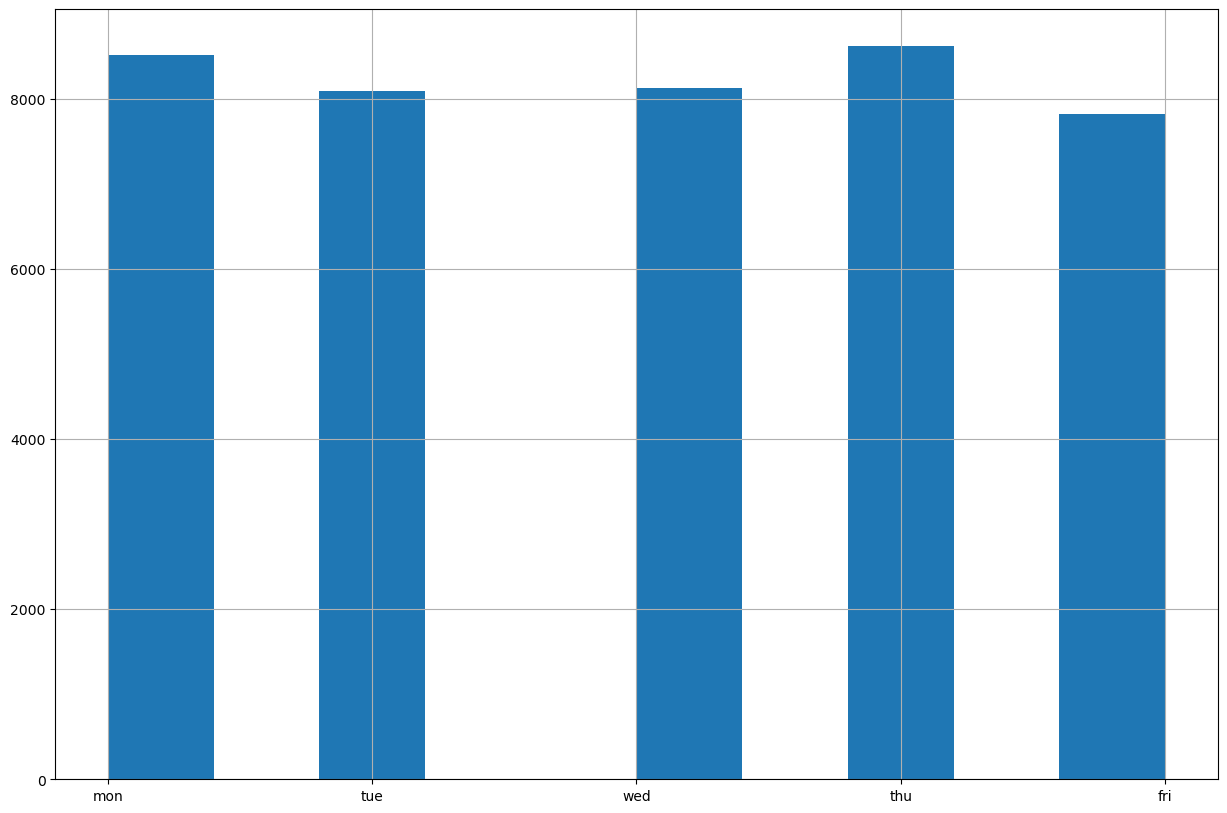

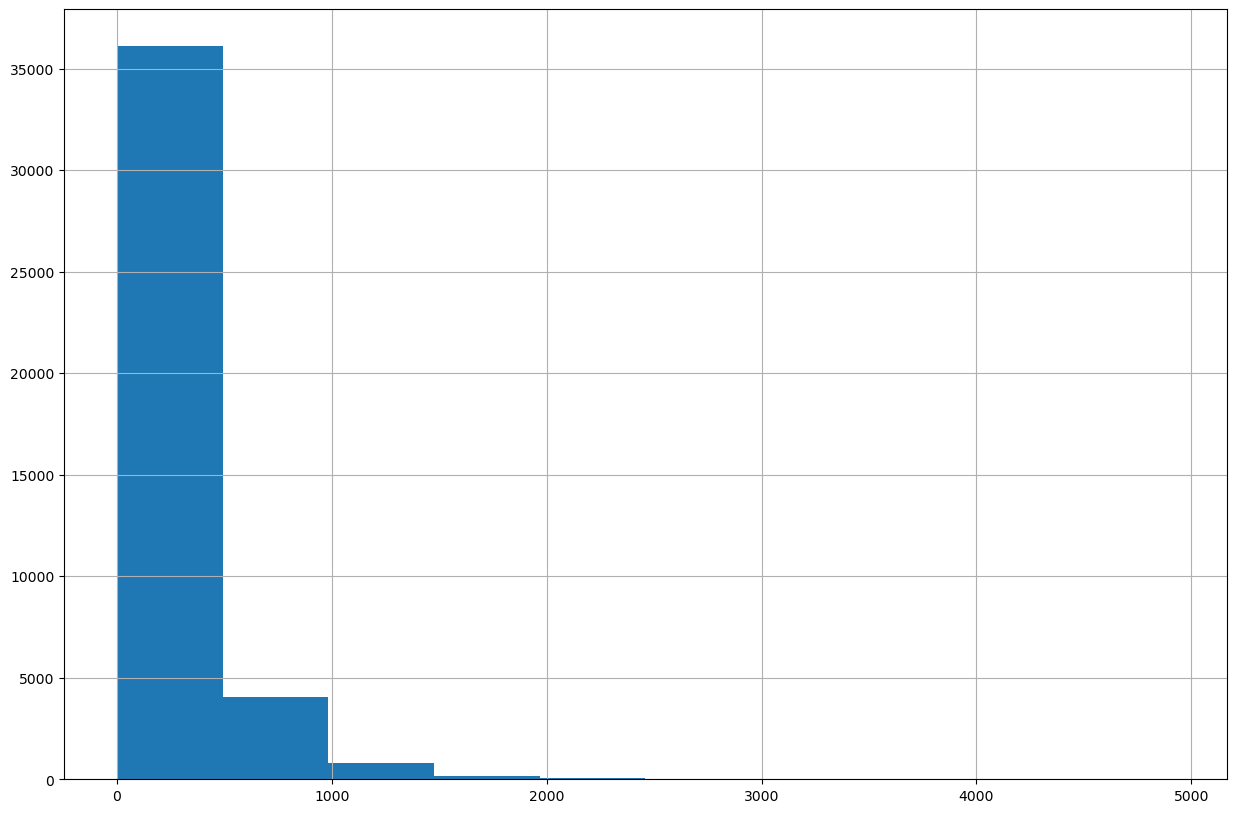

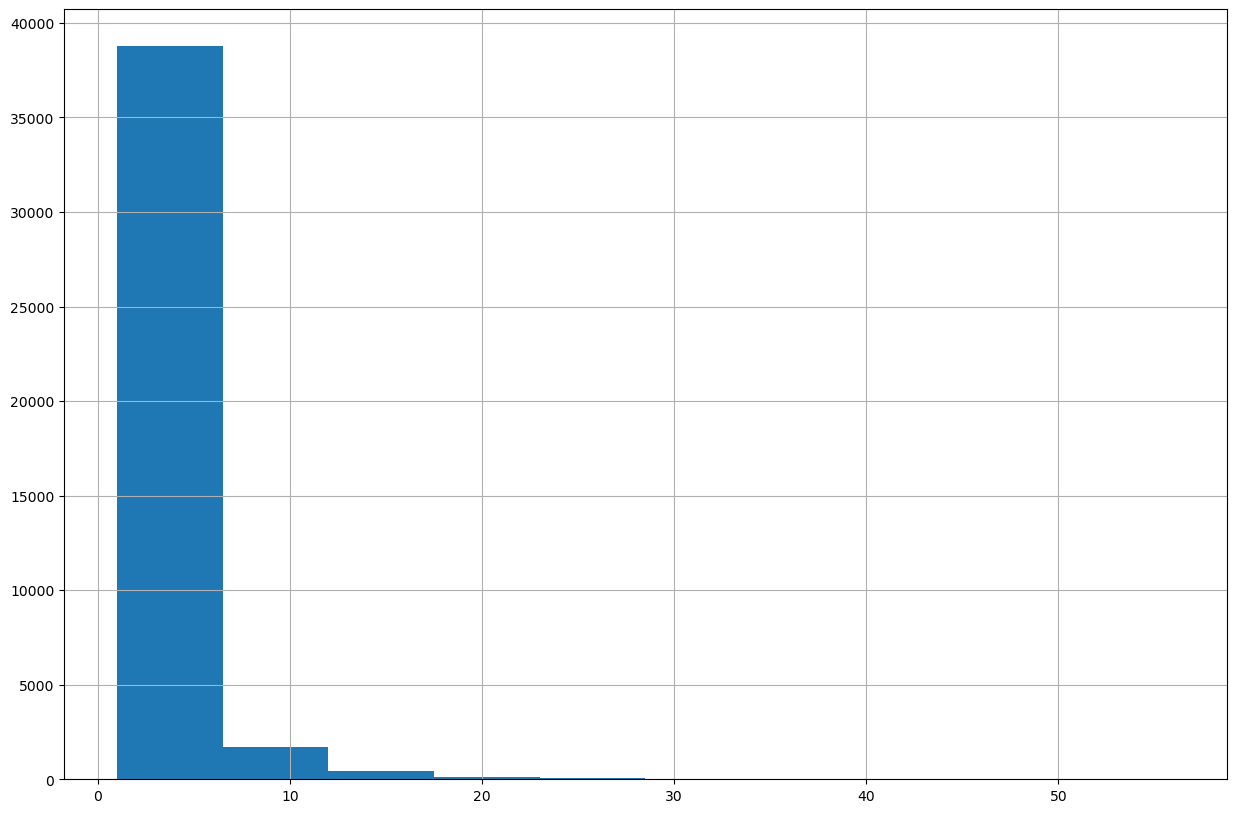

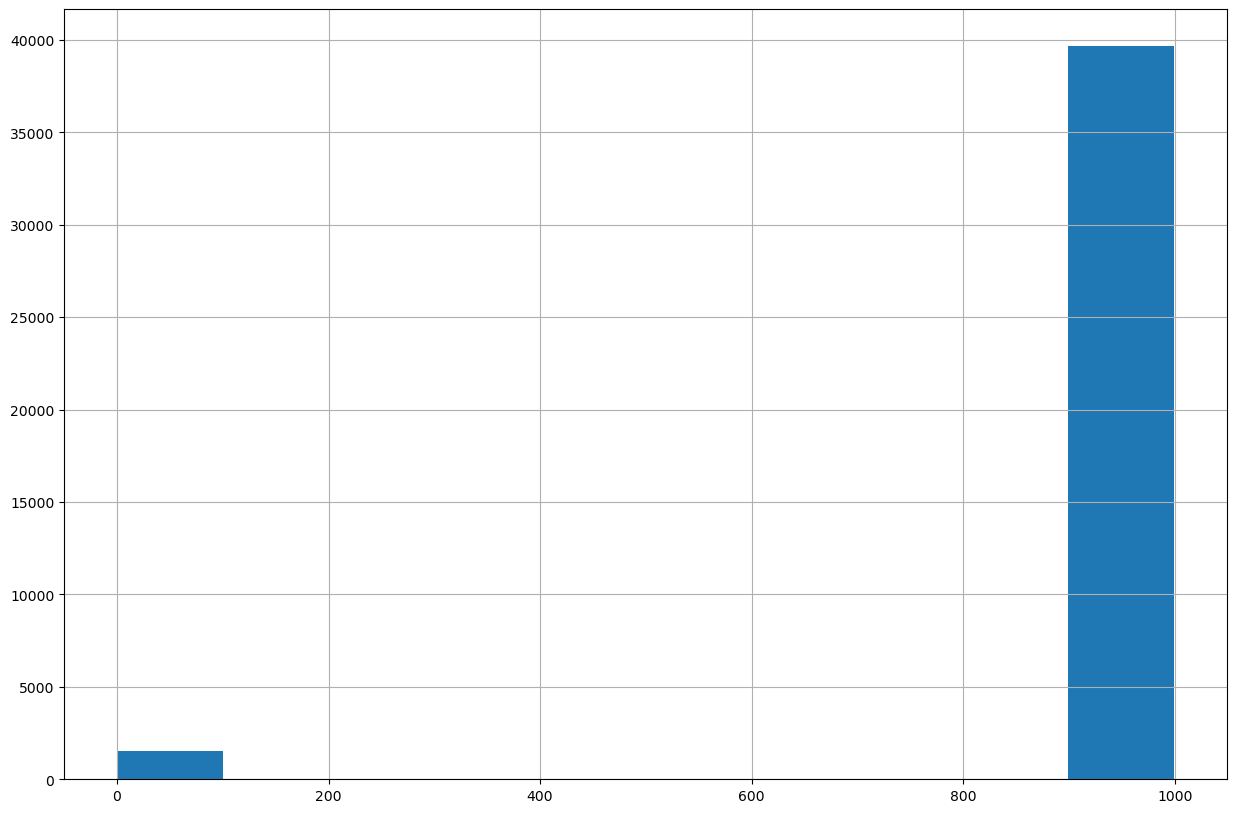

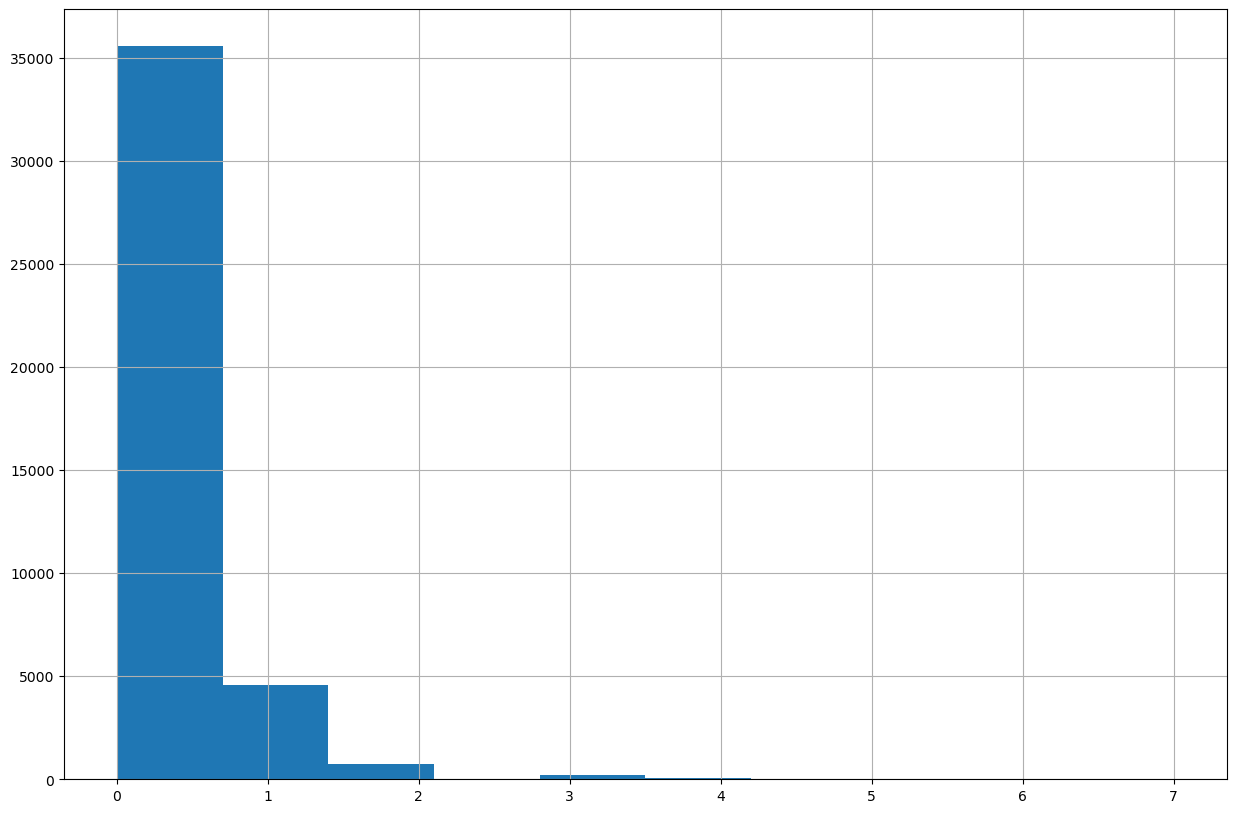

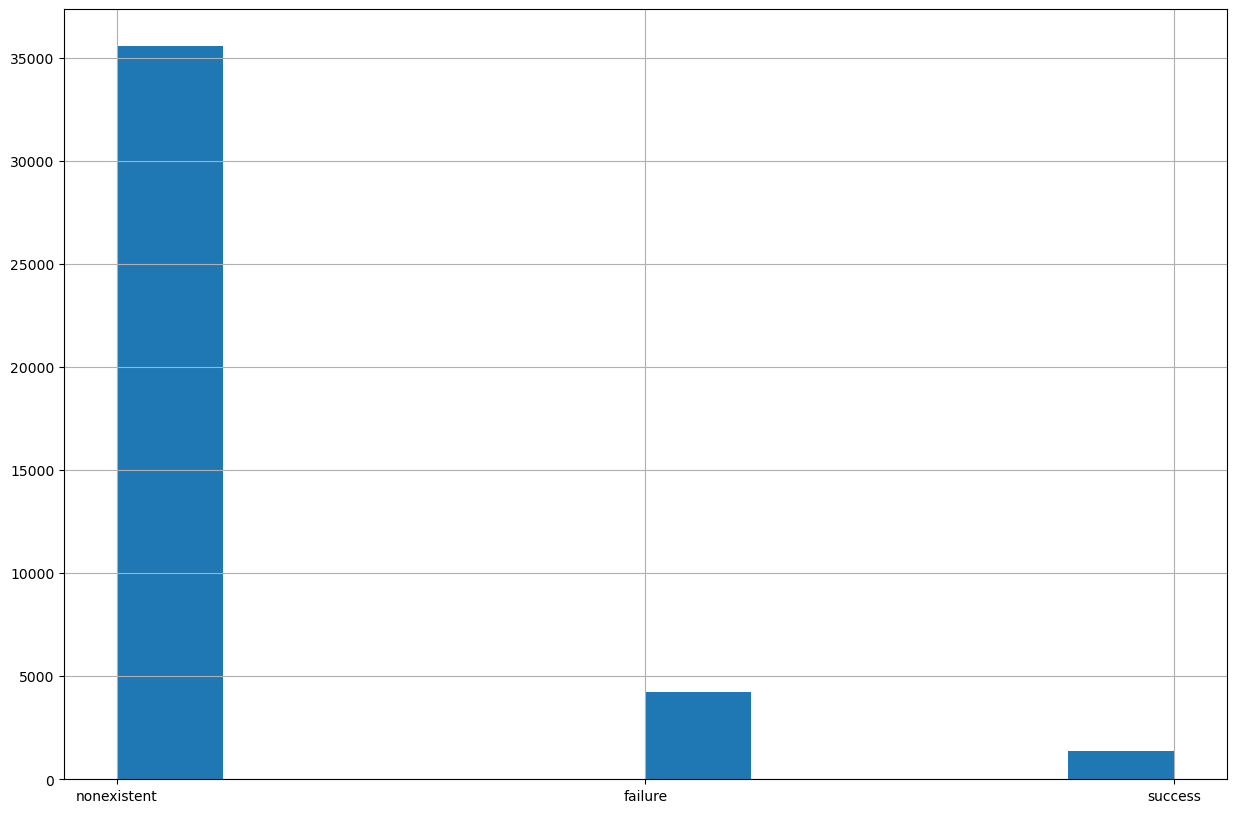

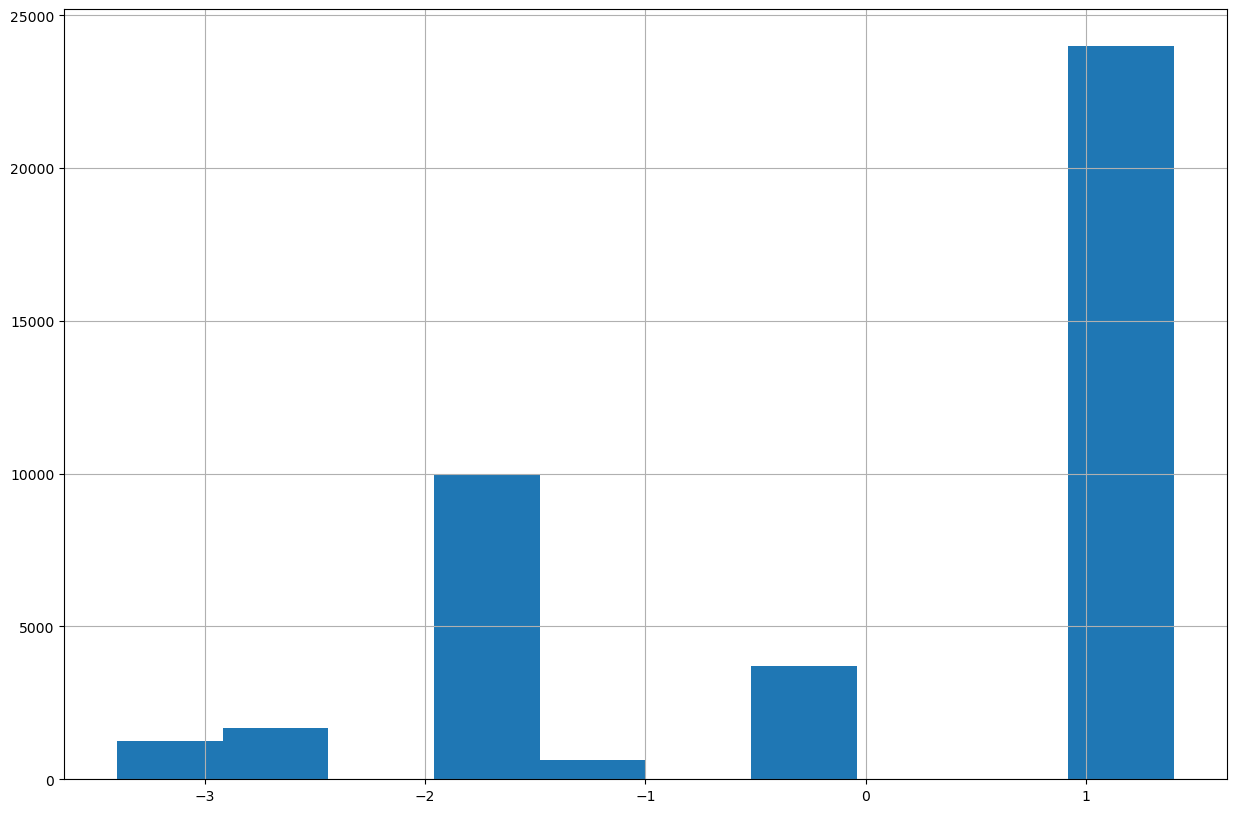

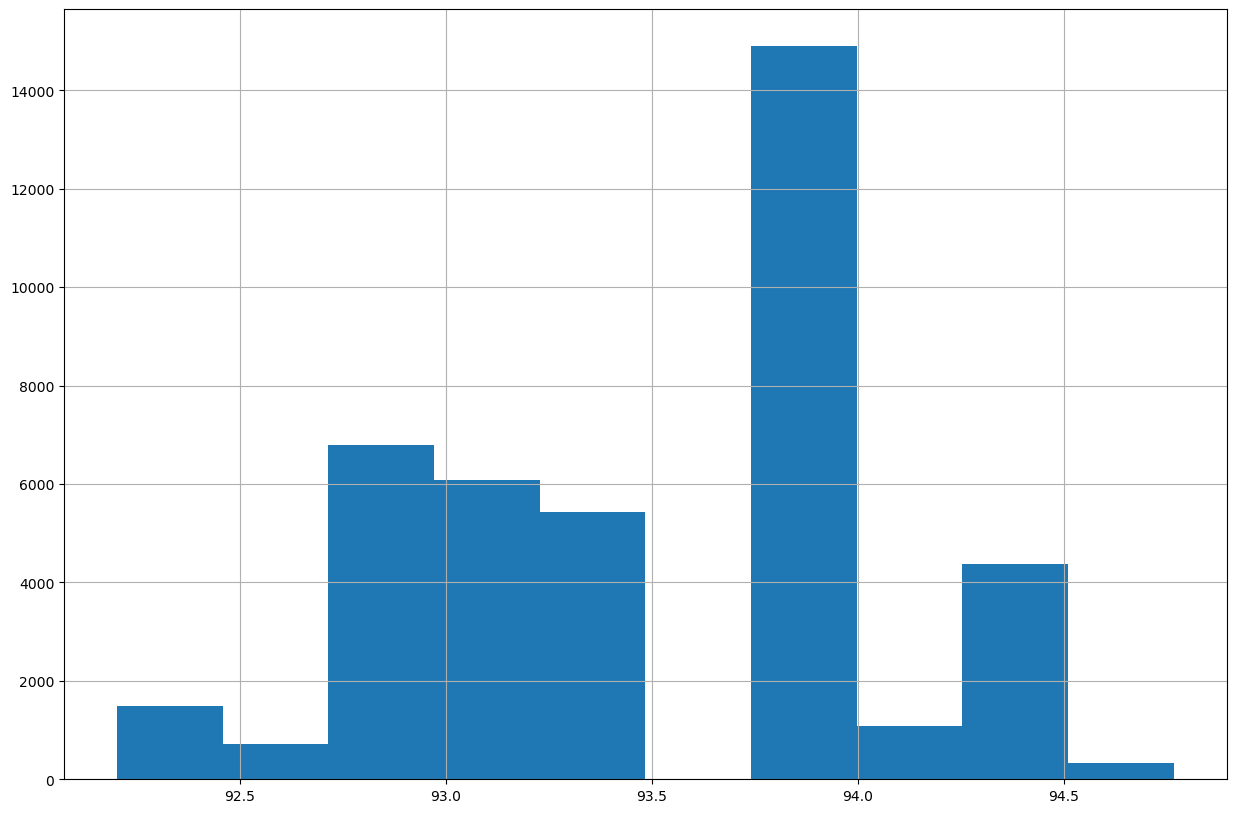

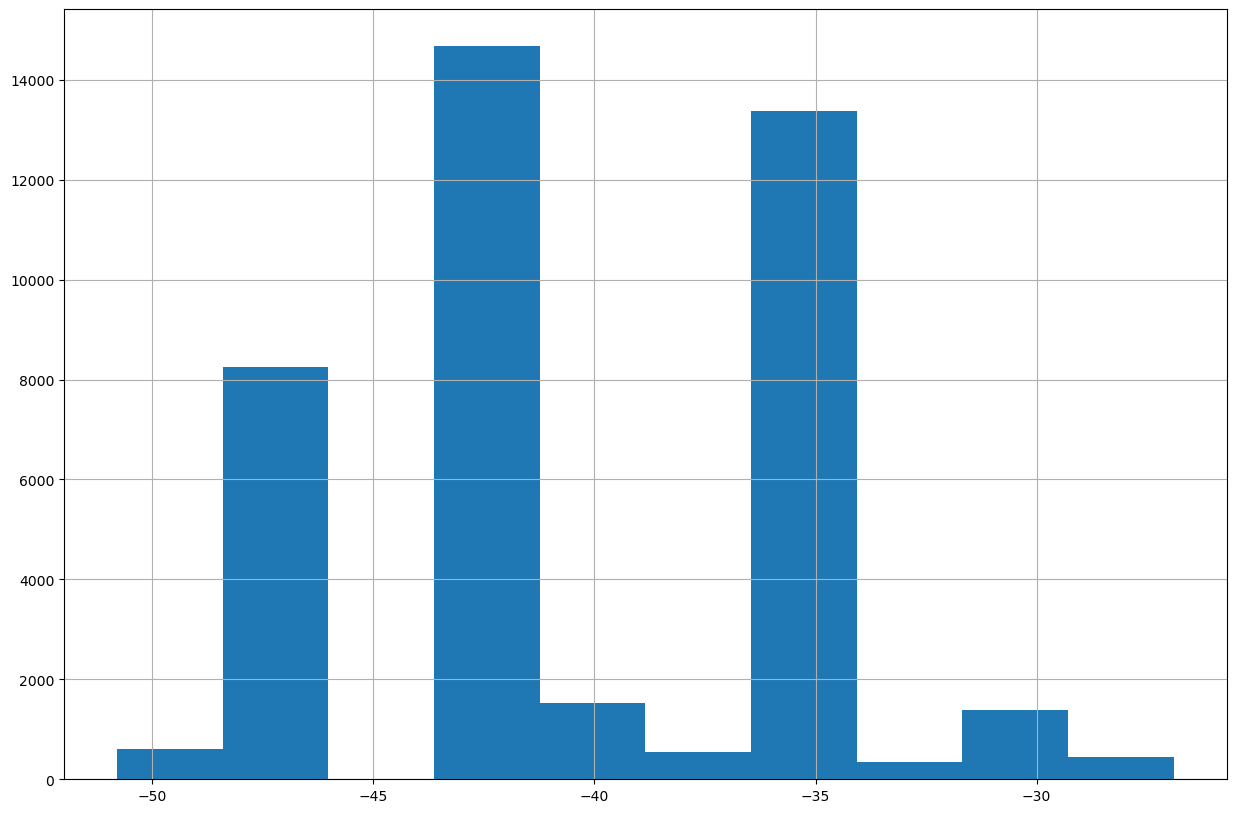

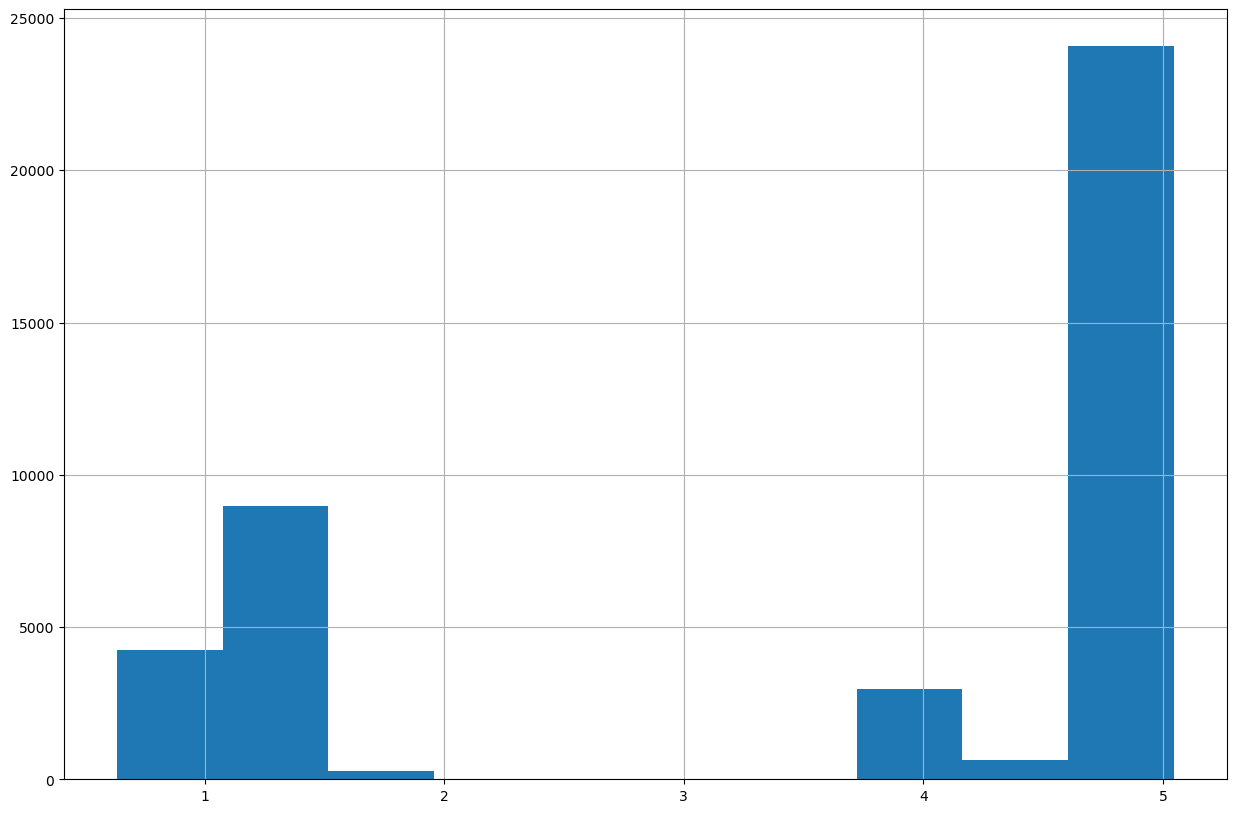

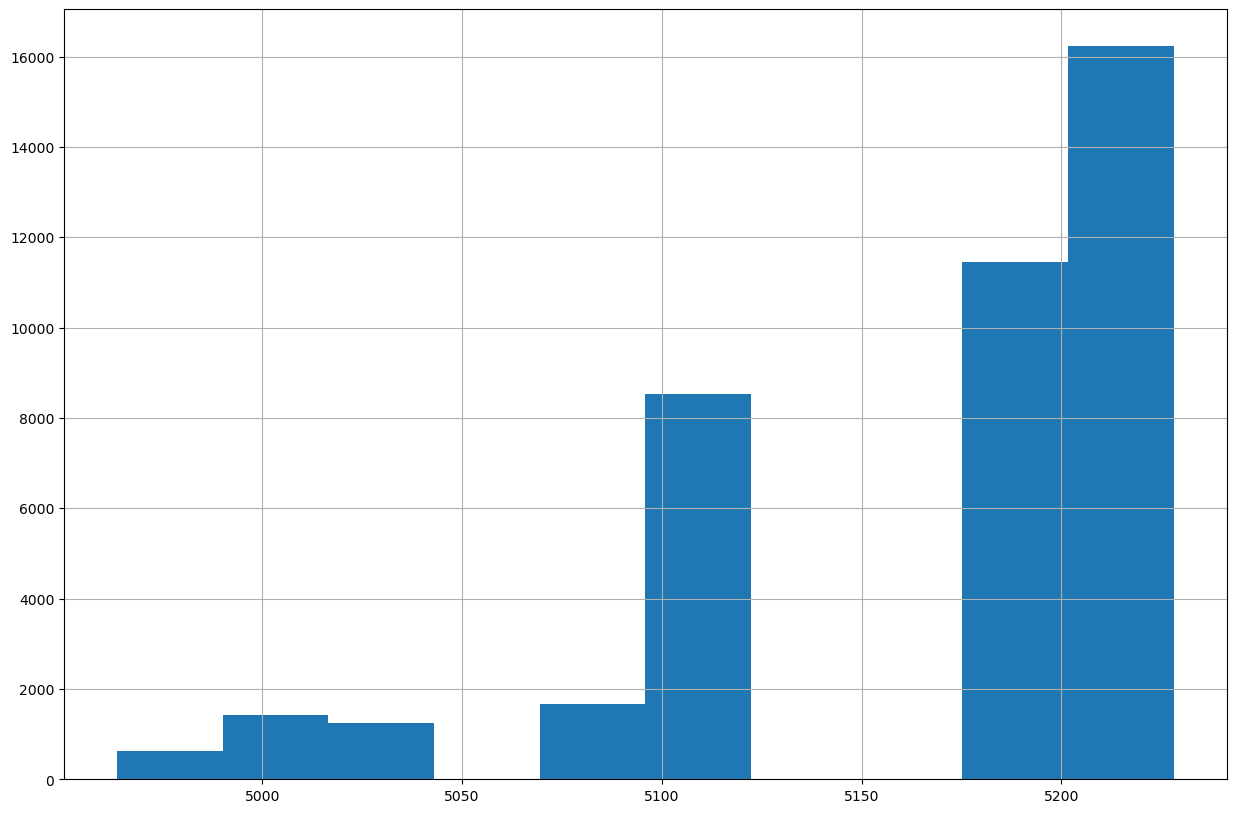

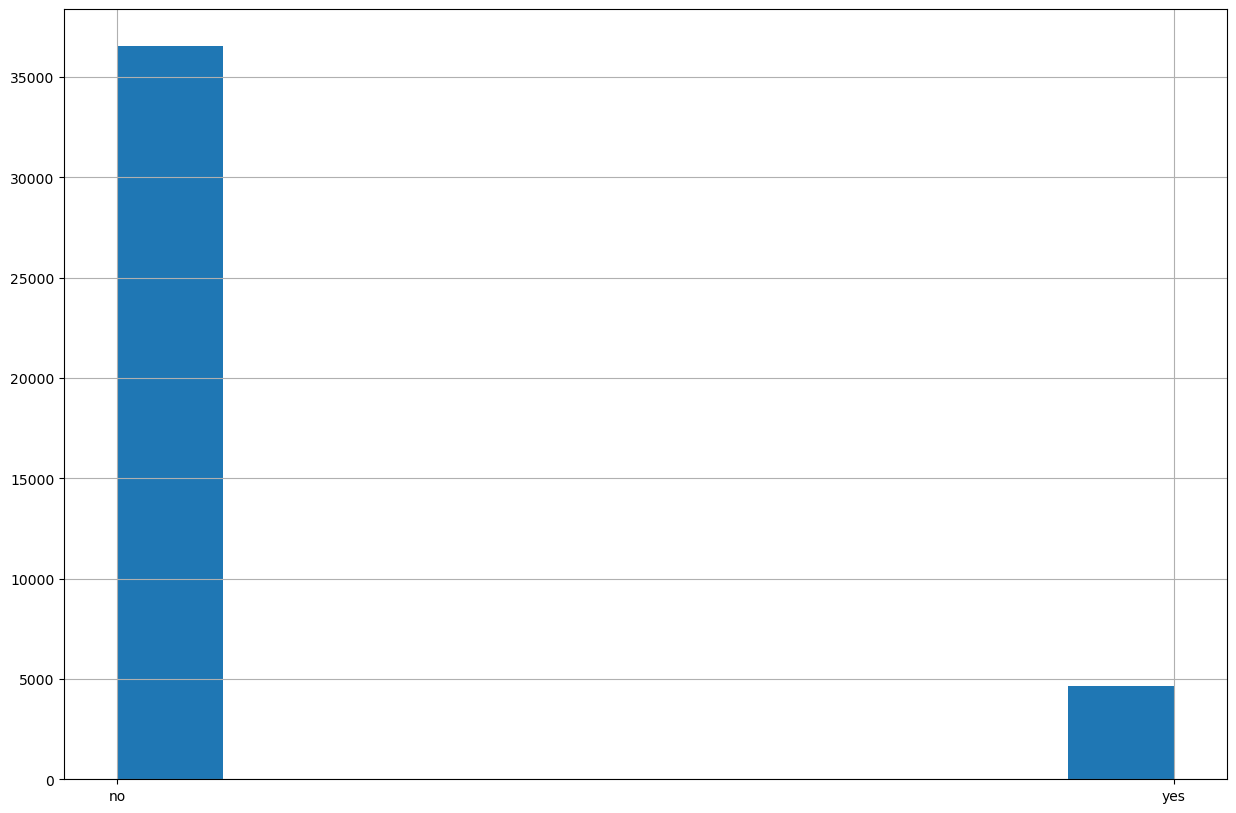

In [54]:
for col in data.columns:
    plt.figure(figsize=(15,10))
    data[col].hist()

In [11]:
Y= data["y"]
X = data.drop("y",axis=1)
print(Y.shape)
print(X.shape)
X.head(5)


(41188,)
(41188, 20)


age  job  marital  education  default  housing  loan  contact  month  \
0   56    3        1          0        0        0     0        1      6   
1   57    7        1          3        1        0     0        1      6   
2   37    7        1          3        0        2     0        1      6   
3   40    0        1          1        0        0     0        1      6   
4   56    7        1          3        0        0     2        1      6   

   day_of_week  duration  campaign  pdays  previous  poutcome  emp.var.rate  \
0            1       261         1    999         0         1           1.1   
1            1       149         1    999         0         1           1.1   
2            1       226         1    999         0         1           1.1   
3            1       151         1    999         0         1           1.1   
4            1       307         1    999         0         1           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
0          93.994          -36.4      4.857       5191.0  
1          93.994          -36.4      4.857       5191.0  
2          93.994          -36.4      4.857       5191.0  
3          93.994          -36.4      4.857       5191.0  
4          93.994          -36.4      4.857       5191.0

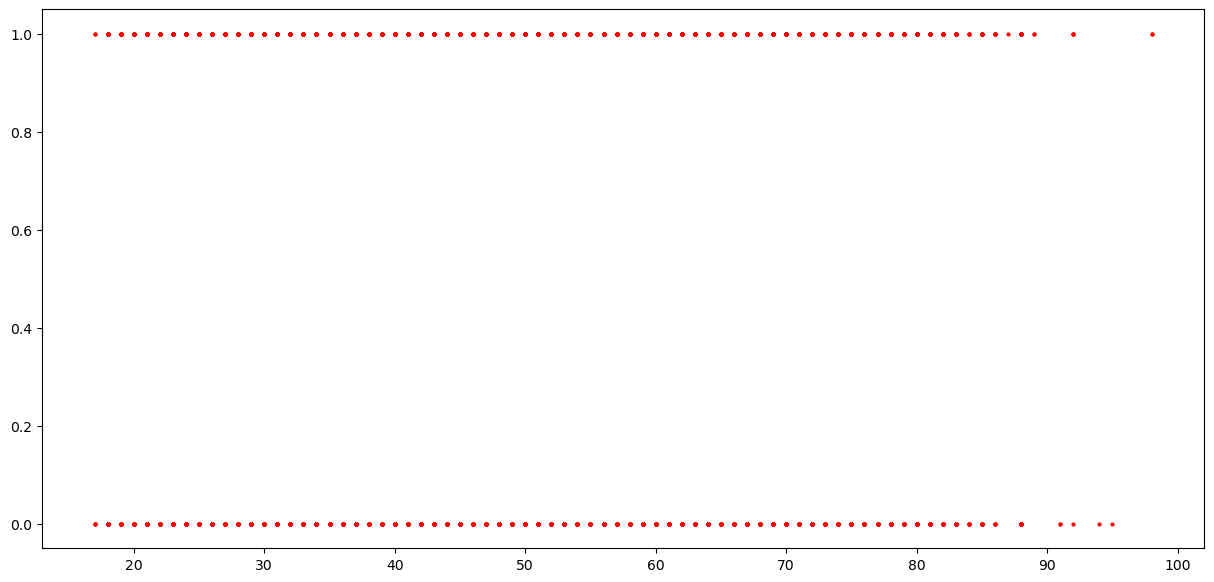

In [12]:
plt.figure(figsize=(15,7))
plt.scatter(X['age'],Y,c='r',s=4)
plt.show()

# Scaling

In [13]:
Scaler = skp.StandardScaler()


scaled = Scaler.fit_transform(X)

X = pd.DataFrame(scaled,columns=X.columns)

X.head(5)

age       job   marital  education   default   housing      loan  \
0  1.533034 -0.201579 -0.283741  -1.753925 -0.513600 -1.087707 -0.452491   
1  1.628993  0.911227 -0.283741  -0.349730  1.945327 -1.087707 -0.452491   
2 -0.290186  0.911227 -0.283741  -0.349730 -0.513600  0.942127 -0.452491   
3 -0.002309 -1.036184 -0.283741  -1.285860 -0.513600 -1.087707 -0.452491   
4  1.533034  0.911227 -0.283741  -0.349730 -0.513600 -1.087707  2.311440   

   contact     month  day_of_week  duration  campaign     pdays  previous  \
0  1.31827  0.762558    -0.718834  0.010471 -0.565922  0.195414 -0.349494   
1  1.31827  0.762558    -0.718834 -0.421501 -0.565922  0.195414 -0.349494   
2  1.31827  0.762558    -0.718834 -0.124520 -0.565922  0.195414 -0.349494   
3  1.31827  0.762558    -0.718834 -0.413787 -0.565922  0.195414 -0.349494   
4  1.31827  0.762558    -0.718834  0.187888 -0.565922  0.195414 -0.349494   

   poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0  0.192622      0.648092        0.722722       0.886447    0.71246   
1  0.192622      0.648092        0.722722       0.886447    0.71246   
2  0.192622      0.648092        0.722722       0.886447    0.71246   
3  0.192622      0.648092        0.722722       0.886447    0.71246   
4  0.192622      0.648092        0.722722       0.886447    0.71246   

   nr.employed  
0      0.33168  
1      0.33168  
2      0.33168  
3      0.33168  
4      0.33168

# Feature Selection

In [15]:
fe = skf.SelectKBest(score_func=skf.f_classif,k=8)
X = fe.fit_transform(X,Y)
X.shape 

(41188, 8)

# Split Data

In [16]:
xtrain,xtest,ytrain,ytest = skm.train_test_split(X,Y,test_size=0.2,random_state=20)
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)


(32950, 8)
(32950,)
(8238, 8)
(8238,)


# Creating Model

In [19]:
model = tfk.models.Sequential()
model.add(tfk.layers.Flatten(input_shape=(8,) ))
model.add(layer = tfk.layers.Dense(units = 64,activation= tfk.activations.linear))
model.add(layer = tfk.layers.Dense(units = 32, activation= tfk.activations.linear ))
model.add(layer = tfk.layers.Dense(units = 1, activation= tfk.activations.sigmoid,))
model.compile(optimizer='sgd',loss='mean_squared_error',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 8)                 0         
                                                                 
 dense_4 (Dense)             (None, 64)                576       
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2689 (10.50 KB)
Trainable params: 2689 (10.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Training

In [20]:
model.fit(xtrain,ytrain,batch_size=20,epochs = 5,validation_data=(xtest,ytest))

Epoch 1/5
1648/1648 [==============================] - 7s 4ms/step - loss: 0.0784 - accuracy: 0.9015 - val_loss: 0.0645 - val_accuracy: 0.9097
Epoch 2/5
1648/1648 [==============================] - 6s 3ms/step - loss: 0.0657 - accuracy: 0.9088 - val_loss: 0.0642 - val_accuracy: 0.9098
Epoch 3/5
1648/1648 [==============================] - 5s 3ms/step - loss: 0.0655 - accuracy: 0.9091 - val_loss: 0.0638 - val_accuracy: 0.9131
Epoch 4/5
1648/1648 [==============================] - 6s 4ms/step - loss: 0.0654 - accuracy: 0.9092 - val_loss: 0.0638 - val_accuracy: 0.9101
Epoch 5/5
1648/1648 [==============================] - 5s 3ms/step - loss: 0.0654 - accuracy: 0.9091 - val_loss: 0.0636 - val_accuracy: 0.9134


# Prediction

In [234]:
ypredict = model.predict(xtest)

258/258 [==============================] - 1s 2ms/step


In [235]:
ypredict = np.round(ypredict)
ypredict

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [1.],
       [0.]], dtype=float32)

In [236]:
model.evaluate(xtest,ytest)

258/258 [==============================] - 1s 3ms/step - loss: 0.1855 - accuracy: 0.9147


[0.18548798561096191, 0.9146637320518494]

# Model performance

In [237]:
MSE = met.mean_squared_error(y_true=ytest,y_pred=ypredict)
MSE

0.08533624666181112

In [238]:
classification_report = met.classification_report(ytest,ypredict,output_dict=True)

In [239]:
classification_reportDF = pd.DataFrame(classification_report).transpose()
classification_reportDF

precision    recall  f1-score      support
0              0.942907  0.962336  0.952522  7328.000000
1              0.636364  0.530769  0.578790   910.000000
accuracy       0.914664  0.914664  0.914664     0.914664
macro avg      0.789635  0.746553  0.765656  8238.000000
weighted avg   0.909045  0.914664  0.911239  8238.000000